In [1]:
"""
From a Re-exposure forgetting experiment dump, make a plot.
"""
import os
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [2]:
# CSV contents
"""
"Name","TRAIN.INNER_LOOP_ITERS","adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/PRETRAIN_abs/mean","adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG/mean","finished_run","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/num_samples_keep/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/num_samples_keep/mean","adhoc_users_aggregate/pred_action_batch/loss/avg_history_AG/SE","adhoc_users_aggregate/pred_action_batch/loss/avg_history_AG/mean","adhoc_users_aggregate/pred_noun_batch/loss/avg_history_AG/SE","adhoc_users_aggregate/pred_noun_batch/loss/avg_history_AG/mean","adhoc_users_aggregate/pred_verb_batch/loss/avg_history_AG/SE","adhoc_users_aggregate/pred_verb_batch/loss/avg_history_AG/mean","adhoc_users_aggregate/train_action_batch/AG_cumul/SE","adhoc_users_aggregate/train_action_batch/AG_cumul/mean","adhoc_users_aggregate/train_noun_batch/AG_cumul/SE","adhoc_users_aggregate/train_noun_batch/AG_cumul/mean","adhoc_users_aggregate/train_verb_batch/AG_cumul/SE","adhoc_users_aggregate/train_verb_batch/AG_cumul/mean","adhoc_users_aggregate/user_aggregate_count","adhoc_users_aggregate_history/pred_action_batch/loss/avg_history_AG/SE","adhoc_users_aggregate_history/pred_action_batch/loss/avg_history_AG/mean","adhoc_users_aggregate_history/pred_noun_batch/loss/avg_history_AG/SE","adhoc_users_aggregate_history/pred_noun_batch/loss/avg_history_AG/mean","adhoc_users_aggregate_history/pred_verb_batch/loss/avg_history_AG/SE","adhoc_users_aggregate_history/pred_verb_batch/loss/avg_history_AG/mean","adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/SE","adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/mean","adhoc_users_aggregate/train_noun_batch/top1_acc_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/top1_acc_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/top1_acc_running_avg/SE","adhoc_users_aggregate/train_noun_batch/top1_acc_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/top1_acc_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/top1_acc_running_avg/mean","adhoc_users_aggregate/train_noun_batch/top5_acc_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/top5_acc_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/top5_acc_running_avg/SE","adhoc_users_aggregate/train_noun_batch/top5_acc_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/top5_acc_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/top5_acc_running_avg/mean","adhoc_users_aggregate/train_verb_batch/top1_acc_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/top1_acc_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/top1_acc_running_avg/SE","adhoc_users_aggregate/train_verb_batch/top1_acc_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/top1_acc_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/top1_acc_running_avg/mean","adhoc_users_aggregate/train_verb_batch/top5_acc_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/top5_acc_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/top5_acc_running_avg/SE","adhoc_users_aggregate/train_verb_batch/top5_acc_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/top5_acc_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/top5_acc_running_avg/mean","train_action_batch/top1_acc_running_avg","train_noun_batch/top1_acc_running_avg","train_noun_batch/top5_acc_running_avg","train_verb_batch/top1_acc_running_avg","train_verb_batch/top5_acc_running_avg","train_action_batch/AG_running_avg","train_action_batch/loss_running_avg","adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/top1_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/top5_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/top5_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/top1_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/top5_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/top5_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/train_action_batch/loss_running_avg/SE","adhoc_users_aggregate/train_noun_batch/loss_running_avg/SE","adhoc_users_aggregate/train_verb_batch/loss_running_avg/SE","adhoc_users_aggregate/train_verb_batch/loss_running_avg/mean","adhoc_users_aggregate/train_noun_batch/loss_running_avg/mean","adhoc_users_aggregate/test_verb_batch/loss/mean","adhoc_users_aggregate/test_verb_batch/loss/SE","adhoc_users_aggregate/test_noun_batch/loss/mean","adhoc_users_aggregate/test_noun_batch/loss/SE","adhoc_users_aggregate/test_action_batch/top1_acc/mean","adhoc_users_aggregate/test_action_batch/top1_acc/SE","adhoc_users_aggregate/test_verb_batch/top1_acc/SE","adhoc_users_aggregate/test_noun_batch/top1_acc/SE","adhoc_users_aggregate/test_noun_batch/top1_acc/mean","adhoc_users_aggregate/test_verb_batch/top1_acc/mean","train_noun_batch/balanced_LL","train_verb_batch/balanced_LL","adhoc_users_aggregate/train_action_batch/balanced_LL/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/balanced_LL/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/balanced_LL/SE","adhoc_users_aggregate/train_action_batch/balanced_LL/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/balanced_LL/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/balanced_LL/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/balanced_LL/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/balanced_LL/SE","adhoc_users_aggregate/train_noun_batch/balanced_LL/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/balanced_LL/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/balanced_LL/mean","adhoc_users_aggregate/train_verb_batch/balanced_LL/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/balanced_LL/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/balanced_LL/SE","adhoc_users_aggregate/train_verb_batch/balanced_LL/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/balanced_LL/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/balanced_LL/mean","adhoc_users_aggregate/train_action_batch/balanced_loss/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/balanced_loss/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/balanced_loss/SE","adhoc_users_aggregate/train_action_batch/balanced_loss/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/balanced_loss/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_loss/mean","adhoc_users_aggregate/train_noun_batch/balanced_loss/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/balanced_loss/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/balanced_loss/SE","adhoc_users_aggregate/train_noun_batch/balanced_loss/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/balanced_loss/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/balanced_loss/mean","adhoc_users_aggregate/train_verb_batch/balanced_loss/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/balanced_loss/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/balanced_loss/SE","adhoc_users_aggregate/train_verb_batch/balanced_loss/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/balanced_loss/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/balanced_loss/mean","train_action_batch/balanced_loss","train_noun_batch/balanced_loss","train_verb_batch/balanced_loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_action_batch/loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_action_batch/top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/top5_acc","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/top5_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_action_batch/loss","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_action_batch/top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/loss","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/top5_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/loss","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/top5_acc","adhoc_users_aggregate/TRANSFER_MATRIX/USERS_IN_ORDER","adhoc_users_aggregate/test_action_batch/loss/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_action_batch/loss/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/loss/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/loss/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/top5_acc/SE","adhoc_users_aggregate/test_noun_batch/top5_acc/mean","adhoc_users_aggregate/test_verb_batch/loss/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/loss/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/top5_acc/SE","adhoc_users_aggregate/test_verb_batch/top5_acc/mean","adhoc_users_aggregate/train_action_batch/LL/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/LL/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/LL/SE","adhoc_users_aggregate/train_action_batch/LL/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/LL/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/LL/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/loss_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/loss_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/loss_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/loss_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/LL/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/LL/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/LL/SE","adhoc_users_aggregate/train_noun_batch/LL/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/LL/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/LL/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/mean","adhoc_users_aggregate/train_noun_batch/loss_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/loss_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/loss_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/loss_running_avg/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/LL/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/LL/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/LL/SE","adhoc_users_aggregate/train_verb_batch/LL/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/LL/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/LL/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/mean","adhoc_users_aggregate/train_verb_batch/loss_running_avg/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/loss_running_avg/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/loss_running_avg/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/loss_running_avg/adhoc_AG/mean","adhoc_users_aggregate/user_aggregate_count/OAG","adhoc_users_aggregate/user_aggregate_count/test","CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg","CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count","CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum","CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg","CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count","CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum","CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg","CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count","CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum","CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg","CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count","CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum","CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg","CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count","CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum","CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg","CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count","CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum","CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg","CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count","CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum","CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg","CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count","CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum","CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg","CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count","CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum","CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg","CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count","CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum","CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg","CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count","CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum","CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg","CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count","CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean","adhoc_users_aggregate/test_action_batch/loss/SE","adhoc_users_aggregate/test_action_batch/loss/mean","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_action_batch/LL","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/LL","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_action_batch/LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_action_batch/balanced_LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/balanced_LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/balanced_loss","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/balanced_LL","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/balanced_loss","adhoc_users_aggregate/test_action_batch/LL/SE","adhoc_users_aggregate/test_action_batch/LL/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_action_batch/LL/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_action_batch/LL/mean","adhoc_users_aggregate/test_action_batch/balanced_LL/SE","adhoc_users_aggregate/test_action_batch/balanced_LL/mean","adhoc_users_aggregate/test_action_batch/balanced_loss/SE","adhoc_users_aggregate/test_action_batch/balanced_loss/mean","adhoc_users_aggregate/test_action_batch/balanced_top1_acc/SE","adhoc_users_aggregate/test_action_batch/balanced_top1_acc/mean","adhoc_users_aggregate/test_noun_batch/LL/SE","adhoc_users_aggregate/test_noun_batch/LL/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/LL/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/LL/mean","adhoc_users_aggregate/test_noun_batch/balanced_LL/SE","adhoc_users_aggregate/test_noun_batch/balanced_LL/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/balanced_LL/mean","adhoc_users_aggregate/test_noun_batch/balanced_loss/SE","adhoc_users_aggregate/test_noun_batch/balanced_loss/mean","adhoc_users_aggregate/test_noun_batch/balanced_top1_acc/SE","adhoc_users_aggregate/test_noun_batch/balanced_top1_acc/mean","adhoc_users_aggregate/test_verb_batch/LL/SE","adhoc_users_aggregate/test_verb_batch/LL/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/LL/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/LL/mean","adhoc_users_aggregate/test_verb_batch/balanced_LL/SE","adhoc_users_aggregate/test_verb_batch/balanced_LL/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/balanced_LL/mean","adhoc_users_aggregate/test_verb_batch/balanced_loss/SE","adhoc_users_aggregate/test_verb_batch/balanced_loss/mean","adhoc_users_aggregate/test_verb_batch/balanced_top1_acc/SE","adhoc_users_aggregate/test_verb_batch/balanced_top1_acc/mean","adhoc_users_aggregate/train_action_batch/loss_running_avg/mean","adhoc_users_aggregate/test_action_batch/balanced_LL/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_action_batch/balanced_LL/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_action_batch/balanced_loss/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_action_batch/balanced_loss/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/balanced_LL/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/balanced_loss/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/balanced_loss/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_noun_batch/balanced_top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_noun_batch/balanced_top1_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/balanced_LL/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/balanced_loss/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/balanced_loss/adhoc_hindsight_AG/mean","adhoc_users_aggregate/test_verb_batch/balanced_top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_verb_batch/balanced_top1_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_action_batch/balanced_LL","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_action_batch/balanced_loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_action_batch/balanced_top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/balanced_LL","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/balanced_loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_noun_batch/balanced_top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/balanced_LL","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/balanced_loss","adhoc_users_aggregate/TRANSFER_MATRIX/ABSOLUTE/test_verb_batch/balanced_top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_action_batch/balanced_loss","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_action_batch/balanced_top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_noun_batch/balanced_top1_acc","adhoc_users_aggregate/TRANSFER_MATRIX/AG/test_verb_batch/balanced_top1_acc","adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/num_samples_total/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/num_samples_total/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/percentage_kept/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/percentage_kept/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/num_samples_keep/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/num_samples_keep/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/num_samples_total/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/num_samples_total/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/percentage_kept/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/decorrelated/percentage_kept/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/num_samples_keep/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/num_samples_keep/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/num_samples_total/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/num_samples_total/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/percentage_kept/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/decorrelated/percentage_kept/mean","train_action_batch/balanced_top1_acc/decorrelated","train_action_batch/balanced_top1_acc/decorrelated/num_samples_keep","train_action_batch/balanced_top1_acc/decorrelated/num_samples_total","train_action_batch/balanced_top1_acc/decorrelated/percentage_kept","train_noun_batch/balanced_top1_acc/decorrelated","train_noun_batch/balanced_top1_acc/decorrelated/num_samples_keep","train_noun_batch/balanced_top1_acc/decorrelated/num_samples_total","train_noun_batch/balanced_top1_acc/decorrelated/percentage_kept","train_verb_batch/balanced_top1_acc/decorrelated","train_verb_batch/balanced_top1_acc/decorrelated/num_samples_keep","train_verb_batch/balanced_top1_acc/decorrelated/num_samples_total","train_verb_batch/balanced_top1_acc/decorrelated/percentage_kept","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/PRETRAIN_abs/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/PRETRAIN_abs/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/adhoc_AG/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/num_samples_keep/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/num_samples_total/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/num_samples_total/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/percentage_kept/SE","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/percentage_kept/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/PRETRAIN_abs/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/PRETRAIN_abs/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/adhoc_AG/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/adhoc_AG/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/num_samples_keep/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/num_samples_keep/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/num_samples_total/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/num_samples_total/mean","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/percentage_kept/SE","adhoc_users_aggregate/train_noun_batch/balanced_top1_acc/correlated/percentage_kept/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/PRETRAIN_abs/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/PRETRAIN_abs/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/adhoc_AG/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/adhoc_AG/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/num_samples_keep/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/num_samples_keep/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/num_samples_total/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/num_samples_total/mean","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/percentage_kept/SE","adhoc_users_aggregate/train_verb_batch/balanced_top1_acc/correlated/percentage_kept/mean","train_action_batch/balanced_top1_acc/correlated","train_action_batch/balanced_top1_acc/correlated/num_samples_keep","train_action_batch/balanced_top1_acc/correlated/num_samples_total","train_action_batch/balanced_top1_acc/correlated/percentage_kept","train_noun_batch/balanced_top1_acc/correlated","train_noun_batch/balanced_top1_acc/correlated/num_samples_keep","train_noun_batch/balanced_top1_acc/correlated/num_samples_total","train_noun_batch/balanced_top1_acc/correlated/percentage_kept","train_verb_batch/balanced_top1_acc/correlated","train_verb_batch/balanced_top1_acc/correlated/num_samples_keep","train_verb_batch/balanced_top1_acc/correlated/num_samples_total","train_verb_batch/balanced_top1_acc/correlated/percentage_kept","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/num_samples_keep/SE"
"Finetuning_2022-09-14_19-06-02_UID2c4355e2-c42c-46d9-ba37-8cb8abe8d1d0_MATT","1","10.913230443000794","6.0107758072639665","4.884739782968443","1.1260360242955254","0.7970801927819016","2.6152131761145356","true","3.9631707511135135","7.5811920207378","95.2","300.8","","","","","","","0.4018999017984656","1.947415103850088","0.2729001495728158","1.5843568519443505","0.17250310493681262","0.3630582411523467","10","0.3949658539649176","1.371943596742956","0.2248876064798105","1.166061711822691","0.2414561970543562","0.2058818893504013","0.3646139657138892","1.6218303978443145","4.364555989265989","4.611503883672338","17.326945656538008","18.948776054382325","0.6839546419908452","6.16213595867157","5.255974077857602","5.280237151276073","34.49315903186798","40.65529499053955","2.2541881747668793","18.42083282470703","4.095381770617987","4.397494637483724","50.238656234741214","68.65948905944825","3.0088262292546246","24.79912061691284","3.304491164650881","4.505512522367452","11.075688648223878","35.87480926513672","5.635242873341468","62.61110572814941","2.152482692931729","5.254296785992499","16.10198631286621","78.71309204101563","18.948776054382325","40.65529499053955","68.65948905944825","35.87480926513672","78.71309204101563","1.9474150866270066","5.214387321472168","4.260361431293243","5.598801440474373","20.349810814857484","4.260256379121047","53.326028442382814","5.588991631461501","5.273788833618165","5.2659780268812355","20.85186882019043","0.31292575061490496","0.23535053173473008","0.10596490281610668","2.3568910002708434","2.8574963212013245","2.514092230796814","0.16178884759890425","3.275778388977051","0.23815749504936823","12.535060840845109","4.042792098491574","4.466820682194795","5.563856844683261","26.511946773529058","30.072909450531007","8.765689377817935","8.320906842568021","0.015706691661511826","0.16224163076225398","0.5872091901758707","0.5941323726048185","2.822801269388767","0.14964733640783456","1.2377225162121086","1.459362144529389","1.3609948387321325","7.527966861605826","8.765689377817935","0.28371114116702445","4.225411350368657","0.8960236175074812","0.8837652607799289","4.0954954921993645","8.320906842568021","0.1319693968145323","8.019940598423934","0.11245684121740684","0.16313693484199676","0.7702684238242065","7.249672174599729","0.1366382734579042","5.4061453657341945","0.15633092356058295","0.11777688573170934","0.3108736781371492","5.095271687597046","0.10509631871167673","4.2406427659704855","0.13531889566779007","0.11664766369065974","-0.1654491529318108","4.406091918902296","7.24967217459973","5.095271687597046","4.406091918902296","[[4.845173358917236,10.330790519714355,9.72148895263672,9.691673278808594,9.363645553588867,10.118063926696776,8.921257019042969,11.006476402282717,10.45514678955078,9.455033302307127],[16.34772491455078,4.388136386871338,15.339144706726074,14.913677215576172,15.437260627746582,15.795562744140623,14.78081512451172,22.90047264099121,15.789107322692873,16.051029205322266],[7.524299144744873,11.985337257385254,5.65326738357544,9.779007911682127,10.347333908081056,7.580355167388916,9.704874992370604,17.504175186157227,9.39962100982666,11.923553466796877],[11.032085418701172,10.115264892578123,10.83847999572754,5.499497413635254,9.19088649749756,10.199335098266602,9.359295845031738,14.851479530334473,9.948580741882324,12.081949234008787],[10.026175498962402,10.113874435424805,13.849322319030762,11.39765167236328,6.906866073608398,13.09046745300293,13.071529388427734,14.385469436645508,12.38592529296875,14.5560302734375],[13.112372398376465,10.047940254211426,6.817382335662842,10.047948837280272,11.626977920532228,6.956939220428467,12.594802856445312,16.172449111938477,9.76241683959961,11.923141479492188],[9.919840812683104,12.847227096557615,10.503107070922852,9.551857948303224,11.58122444152832,11.16933250427246,7.159225463867188,10.994791984558104,11.64434814453125,10.389642715454102],[13.82100772857666,17.859176635742188,15.442140579223633,12.791397094726562,14.787243843078612,15.747232437133787,12.75176239013672,4.9258222579956055,16.229677200317383,11.24962043762207],[8.091218948364258,11.337615966796877,8.406134605407715,8.377063751220703,9.747453689575195,7.797706604003906,9.0828218460083,9.778882026672363,5.403320789337158,8.388916969299316],[11.181857109069824,10.135374069213867,11.134621620178224,8.766880989074707,9.62314796447754,10.898767471313477,9.128689765930176,10.860926628112791,10.928366661071776,6.16045618057251]]","[[12.523719787597656,0,0,0,0,0,4.779411792755127,0,0,2.816901445388794],[0,25.590551376342773,0,0,0,0,0,0,0,0],[0.1897533237934112,0,0.8695651888847351,0,0,0,0,0,0,0],[0,0,0,1.5384615659713743,0.1623376607894897,0,0.3676470518112182,0,0,0],[0.759013295173645,0,0.5797101855278015,0,8.116883277893066,0,0,0,0,0],[0,0,9.56521701812744,0,0,6.601731300354004,0,0,3.373493909835815,0],[1.51802659034729,0,0.5797101855278015,0,0,0,7.352941513061523,0,0,0.7042253613471985],[0,0,0,0.5128205418586731,0,0,0,42.22222137451172,0,0],[0.5692600011825562,0,0,0,0,0.2164502143859863,0,0,4.33734941482544,0],[0.759013295173645,0,0,0,0,0,1.8382353782653809,3.70370364189148,0,16.19718360900879]]","[[2.021395444869995,6.95966911315918,6.2779741287231445,6.313468933105469,6.470874309539795,6.681528091430664,5.5133442878723145,5.641593456268311,6.5942206382751465,5.517442226409912],[9.29601764678955,2.284414768218994,10.046031951904297,10.467686653137209,11.205822944641112,11.223905563354492,9.212839126586914,14.119861602783203,10.399563789367676,10.557218551635742],[3.7820303440094,8.899386405944824,3.231448173522949,7.397101402282715,7.614688873291016,4.914541244506836,6.281010627746582,10.284831047058104,5.896236896514893,8.146750450134277],[6.226133823394775,7.449173927307129,7.180837631225586,3.3901493549346924,6.573760509490967,7.448280334472656,6.064968109130859,7.639719009399414,6.782557010650635,7.633909225463867],[4.467258453369141,7.674185752868652,8.315579414367676,7.465338230133057,4.298907279968262,9.324734687805176,7.494546890258789,7.912295818328857,7.563625812530518,8.909868240356445],[7.528773784637451,7.400717258453369,3.633269309997559,7.164051055908203,8.745637893676758,4.434217929840088,7.866558074951172,8.928362846374512,5.986154556274414,7.843269348144531],[4.201164245605469,7.205837249755859,5.861760139465332,5.319451808929443,6.942289352416992,6.507096767425537,3.4565744400024414,5.130684852600098,6.40976095199585,4.6236572265625],[8.16475772857666,12.993599891662598,10.543679237365724,9.07666301727295,11.166540145874023,11.862821578979492,8.497715950012207,3.056748628616333,11.708125114440918,7.570938110351562],[3.800281286239624,8.172286033630371,4.831772327423096,5.324747085571289,6.619624137878418,4.915680408477783,5.580165863037109,5.801878929138184,3.1138839721679688,5.161160469055176],[5.856980323791504,6.898021221160889,6.622203350067139,5.462150573730469,6.541291236877441,6.956964492797852,5.470188140869141,5.482973575592041,6.616067886352539,3.470043897628784]]","[[47.81783676147461,0.3937007784843445,0,0,0,0,6.617647171020508,0,0,6.3380279541015625],[0,51.18110275268555,0,0,0,0,0,0,0,0],[12.713472366333008,0,4.057971000671387,0,2.7597403526306152,3.1385281085968018,3.308823585510254,0,0.2409638613462448,0],[0,0,0,9.230769157409668,0.4870129823684692,0,0.3676470518112182,0.3703703582286834,0.7228915691375732,0],[4.554080009460449,0,2.6086955070495605,0.5128205418586731,11.36363697052002,1.1904761791229248,0,0,0.9638554453849792,0],[0,0,32.463768005371094,0,0.649350643157959,18.18181800842285,0,0,7.951807022094727,0],[8.538899421691895,0.3937007784843445,2.6086955070495605,5.128205299377441,0.1623376607894897,2.2727272510528564,26.47058868408203,8.148147583007812,2.650602340698242,34.507041931152344],[0,0,0,0.5128205418586731,0,0,0,50.74074172973633,0,0],[12.713472366333008,0.3937007784843445,0.5797101855278015,4.615384578704834,1.4610389471054075,2.2727272510528564,3.308823585510254,1.481481432914734,20.72289085388184,16.19718360900879],[5.123339653015137,0,0,0.5128205418586731,0,0,6.617647171020508,6.2962965965271,0.2409638613462448,25.35211181640625]]","[[88.61480712890625,5.511810779571533,4.34782600402832,8.717948913574219,12.17532444000244,0.7575757503509521,24.63235282897949,11.111111640930176,3.855421781539917,27.46478843688965],[9.29791259765625,83.85826873779297,2.898550748825073,8.717948913574219,13.474026679992676,3.0303030014038086,12.867647171020508,2.222222328186035,9.879518508911133,8.450703620910645],[60.53131103515625,0.787401556968689,66.9565200805664,2.0512821674346924,7.954545497894287,40.04329299926758,16.91176414489746,2.962962865829468,23.85542106628418,3.5211269855499268],[9.67741870880127,8.267716407775879,6.08695650100708,73.84615325927734,16.396102905273438,8.982684135437012,23.16176414489746,10.370369911193848,11.08433723449707,14.788731575012209],[59.013282775878906,1.9685039520263672,14.78260898590088,5.128205299377441,75.48701477050781,9.740259170532228,20.22058868408203,0,8.433734893798828,1.408450722694397],[4.364326000213623,7.480315208435059,55.9420280456543,20,12.17532444000244,50.5411262512207,11.764705657958984,0.3703703582286834,28.433734893798828,0.7042253613471985],[59.203033447265625,8.267716407775879,6.6666669845581055,18.461538314819336,15.09740161895752,6.9264068603515625,55.88235092163086,17.77777862548828,9.879518508911133,36.61971664428711],[40.98671722412109,3.9370079040527344,0.5797101855278015,8.20512866973877,6.49350643157959,1.7316017150878906,25.367647171020508,80,4.57831335067749,56.33803176879883],[53.320682525634766,6.692913055419922,20.579710006713867,14.871795654296877,21.10389709472656,20.99567031860352,18.014705657958984,10.740740776062012,55.66265106201172,26.76056289672852],[15.749526023864746,3.9370079040527344,2.898550748825073,11.28205108642578,12.33766269683838,4.2207794189453125,22.05882453918457,24.074073791503903,6.265060424804688,86.61972045898438]]","[[2.8237783908843994,3.37112045288086,3.4435129165649414,3.378203153610229,2.8927721977233887,3.436535358428955,3.4079132080078125,5.36488151550293,3.860926866531372,3.937591075897217],[7.051707744598389,2.103721857070923,5.293112277984619,4.445989608764648,4.231437206268311,4.571655750274658,5.567975521087647,8.780611038208008,5.389542102813721,5.49381160736084],[3.7422685623168954,3.085951805114746,2.4218192100524902,2.3819057941436768,2.732645034790039,2.665813446044922,3.423864364624023,7.219346046447754,3.503382682800293,3.7768030166625977],[4.805952548980713,2.666090726852417,3.657641887664795,2.10934853553772,2.6171257495880127,2.751054525375366,3.2943272590637207,7.211760520935059,3.1660256385803223,4.448040008544922],[5.55891752243042,2.4396891593933105,5.533741474151611,3.932312250137329,2.6079583168029785,3.765732526779175,5.576981067657471,6.473174095153809,4.822298049926758,5.646162509918213],[5.583598613739014,2.647223472595215,3.184112787246704,2.8838977813720703,2.881338596343994,2.522721767425537,4.728244781494141,7.244083881378174,3.7762622833251953,4.07987117767334],[5.718677520751953,5.641388893127441,4.64134693145752,4.2324066162109375,4.638935089111328,4.662234306335449,3.702651500701904,5.86410665512085,5.234588146209717,5.765985012054443],[5.656251430511475,4.8655781745910645,4.898462772369385,3.714734554290772,3.620704174041748,3.884408473968506,4.254046440124512,1.869073867797852,4.521552562713623,3.678680896759033],[4.290937900543213,3.1653285026550293,3.5743625164031982,3.052316427230835,3.1278305053710938,2.882026195526123,3.5026559829711914,3.977003335952759,2.289437055587769,3.227756977081299],[5.324877262115479,3.2373526096343994,4.512417316436768,3.3047304153442383,3.081857442855835,3.9418017864227295,3.658501148223877,5.377952575683594,4.312297344207764,2.6904118061065674]]","[[20.113853454589844,0,7.82608699798584,5.128205299377441,5.194805145263672,5.0865797996521,6.985293865203857,0.3703703582286834,5.301204681396484,8.450703620910645],[15.939278602600098,37.00787353515625,31.014493942260746,37.43589782714844,33.11688232421875,31.38528251647949,16.544116973876953,12.222222328186035,23.132530212402344,23.943662643432617],[9.487666130065918,5.118110179901123,9.855072021484377,21.0256404876709,0.9740259647369384,8.116883277893066,1.8382353782653809,0.3703703582286834,4.096385478973389,7.746479034423828],[16.129032135009766,37.7952766418457,19.71014404296875,27.69230842590332,37.98701095581055,35.389610290527344,29.411766052246097,7.037036895751953,26.024097442626957,21.12676048278809],[15.180265426635742,40.551177978515625,19.71014404296875,26.666667938232425,46.42856979370117,31.38528251647949,28.67647171020508,7.407407283782959,23.37349319458008,21.83098602294922],[16.129032135009766,29.92126083374023,31.30434799194336,37.43589782714844,33.6038932800293,33.22510528564453,16.544116973876953,11.851851463317873,23.614458084106445,26.056337356567383],[7.969639301300049,2.7559053897857666,2.6086955070495605,0,10.227272987365724,3.0303030014038086,13.970587730407717,0,2.891566276550293,4.225351810455322],[0.5692600011825562,0.787401556968689,0.2898550927639007,5.128205299377441,0.3246753215789795,0.2164502143859863,2.2058823108673096,54.81481552124024,1.9277108907699585,18.309858322143555],[5.5028462409973145,8.661417961120605,12.17391300201416,5.641025543212891,4.058441638946533,13.636363983154297,4.0441179275512695,8.518518447875977,22.409639358520508,2.112675905227661],[15.939278602600098,42.913387298583984,19.71014404296875,26.666667938232425,37.82467651367188,35.389610290527344,29.411766052246097,17.037036895751953,26.024097442626957,35.21126937866211]]","[[67.93168640136719,74.4094467163086,63.18840408325195,67.17948913574219,75,69.80519104003906,59.19117736816406,21.851852416992188,52.28915786743164,42.95774841308594],[40.796966552734375,82.2834701538086,55.36231994628906,61.5384635925293,78.57142639160156,66.45021057128906,54.77941131591797,21.481481552124023,51.32530212402344,38.028167724609375],[44.97153854370117,77.95275115966797,77.39130401611328,82.05128479003906,81.81818389892578,77.48918151855469,58.08823776245117,18.88888931274414,53.49397659301758,56.33803176879883],[47.24857711791992,81.10235595703125,57.97101211547852,92.8205108642578,74.18830871582031,73.16017150878906,65.07353210449219,27.77777862548828,67.9518051147461,69.71830749511719],[49.14611053466797,77.55905151367188,58.55072784423828,66.66667175292969,91.07142639160156,75.10822296142578,63.235294342041016,28.518518447875977,62.40963745117188,50.7042236328125],[41.55597686767578,79.13385772705078,62.60869598388672,82.56410217285156,75.16233825683594,83.87445831298828,51.10294342041016,28.14814758300781,61.68674850463867,52.81690216064453],[51.992408752441406,52.36220550537109,54.78261184692383,68.71794891357422,83.7662353515625,68.39826965332031,81.98529815673828,21.11111068725586,65.06024169921875,64.78873443603516],[37.191650390625,74.0157470703125,52.75362014770508,64.61538696289062,73.86363983154297,71.53679656982422,49.26470565795898,85.9259262084961,60.00000381469727,71.12676239013672],[38.14041519165039,71.6535415649414,49.27536392211914,62.56410598754883,67.2077865600586,73.16017150878906,54.04411697387695,25.925926208496097,81.20481872558594,43.66197204589844],[48.76660537719727,66.92913055419922,62.02898788452149,81.02564239501953,72.2402572631836,65.36796569824219,66.17646789550781,27.40740776062012,58.7951774597168,90.1408462524414]]","[[3.014047622680664,-2.4674954414367676,-1.4870309829711932,-2.8624520301818848,-1.5327043533325195,-2.284596443176268,-1.2878060340881348,-1.9496526718139664,-2.4625139236450178,-1.5926771163940412],[-8.48850393295288,3.47515869140625,-7.104686737060547,-8.084455966949463,-7.606319427490234,-7.962095260620115,-7.1473641395568865,-13.84364891052246,-7.796474456787111,-8.18867301940918],[0.33492183685302734,-4.122042179107666,2.581190586090087,-2.949786663055418,-2.516392707824709,0.2531123161315918,-2.0714240074157697,-8.447351455688477,-1.4069881439208984,-4.061197280883791],[-3.1728644371032715,-2.2519698143005353,-2.6040220260620135,1.329723834991455,-1.3599452972412127,-2.3658676147460938,-1.7258448600769043,-5.794655799865723,-1.9559478759765625,-4.219593048095701],[-2.166954517364502,-2.250579357147217,-5.614864349365234,-4.5684304237365705,0.9240751266479492,-5.256999969482422,-5.4380784034729,-5.328645706176758,-4.393292427062988,-6.693674087524414],[-5.2531514167785645,-2.184645175933838,1.4170756340026855,-3.2187275886535627,-3.7960367202758807,0.876528263092041,-4.9613518714904785,-7.115625381469727,-1.7697839736938477,-4.060785293579102],[-2.0606198310852033,-4.9839320182800275,-2.268649101257324,-2.722636699676515,-3.7502832412719727,-3.3358650207519513,0.4742255210876456,-1.9379682540893537,-3.651715278625488,-2.5272865295410156],[-5.96178674697876,-9.9958815574646,-7.2076826095581055,-5.9621758460998535,-6.956302642822264,-7.91376495361328,-5.1183114051818865,4.1310014724731445,-8.237044334411621,-3.3872642517089844],[-0.23199796676635745,-3.474320888519289,-0.1716766357421875,-1.547842502593994,-1.9165124893188477,0.03576087951660156,-1.4493708610534668,-0.7220582962036133,2.5893120765686035,-0.5265607833862305],[-3.322636127471924,-2.2720789909362793,-2.900163650512697,-1.937659740447998,-1.7922067642211932,-3.0652999877929688,-1.4952387809753418,-1.8041028976440412,-2.935733795166014,1.7019000053405762]]","[[10.626186609268188,0,-1.7391303777694702,-3.076923131942749,-1.298701286315918,-1.5151515007019043,2.5735294818878174,0,-0.9638554453849792,-0.7042253017425537],[-1.897533178329468,25.590551376342773,-1.7391303777694702,-3.076923131942749,-1.298701286315918,-1.5151515007019043,-2.2058823108673096,0,-0.9638554453849792,-3.5211267471313477],[-1.7077798545360567,0,-0.8695651888847351,-3.076923131942749,-1.298701286315918,-1.5151515007019043,-2.2058823108673096,0,-0.9638554453849792,-3.5211267471313477],[-1.897533178329468,0,-1.7391303777694702,-1.5384615659713747,-1.1363636255264282,-1.5151515007019043,-1.8382352590560913,0,-0.9638554453849792,-3.5211267471313477],[-1.138519883155823,0,-1.1594201922416687,-3.076923131942749,6.818181991577148,-1.5151515007019043,-2.2058823108673096,0,-0.9638554453849792,-3.5211267471313477],[-1.897533178329468,0,7.826086640357969,-3.076923131942749,-1.298701286315918,5.0865797996521,-2.2058823108673096,0,2.409638464450836,-3.5211267471313477],[-0.3795065879821779,0,-1.1594201922416687,-3.076923131942749,-1.298701286315918,-1.5151515007019043,5.147059202194214,0,-0.9638554453849792,-2.816901385784149],[-1.897533178329468,0,-1.7391303777694702,-2.564102590084076,-1.298701286315918,-1.5151515007019043,-2.2058823108673096,42.22222137451172,-0.9638554453849792,-3.5211267471313477],[-1.3282731771469118,0,-1.7391303777694702,-3.076923131942749,-1.298701286315918,-1.298701286315918,-2.2058823108673096,0,3.373493969440461,-3.5211267471313477],[-1.138519883155823,0,-1.7391303777694702,-3.076923131942749,-1.298701286315918,-1.5151515007019043,-0.3676469326019287,3.70370364189148,-0.9638554453849792,12.67605686187744]]","[[2.334965467453003,-1.5173492431640625,-1.0551624298095703,-1.8262596130371096,-0.9078998565673828,-1.3098993301391602,-0.7392230033874512,-0.4589414596557626,-1.3321647644042969,-0.5200028419494629],[-4.939656734466553,3.157905101776123,-4.823220252990723,-5.980477333068849,-5.642848491668699,-5.852276802062988,-4.438717842102051,-8.937209606170654,-5.137507915496826,-5.559779167175293],[0.5743305683135982,-3.457066535949707,1.991363525390625,-2.9098920822143555,-2.0517144203186035,0.457087516784668,-1.5068893432617188,-5.102179050445555,-0.634181022644043,-3.149311065673828],[-1.8697729110717771,-2.0068540573120117,-1.9580259323120115,1.097059965133667,-1.010786056518555,-2.0766515731811523,-1.290846824645996,-2.4570670127868652,-1.5205011367797852,-2.636469841003418],[-0.11089754104614258,-2.231865882873535,-3.0927677154541016,-2.9781289100646973,1.2640671730041504,-3.953105926513672,-2.720425605773926,-2.7296438217163086,-2.301569938659668,-3.912428855895996],[-3.172412872314453,-1.958397388458252,1.5895423889160152,-2.676841735839844,-3.1826634407043457,0.937410831451416,-3.0924367904663086,-3.745710849761963,-0.7240986824035645,-2.845829963684082],[0.1551966667175293,-1.7635173797607422,-0.6389484405517578,-0.832242488861084,-1.37931489944458,-1.1354680061340332,1.317546844482422,0.05196714401245117,-1.147705078125,0.3737821578979492],[-3.808396816253662,-7.55128002166748,-5.32086753845215,-4.58945369720459,-5.603565692901611,-6.491192817687988,-3.723594665527344,2.125903367996216,-6.446069240570068,-2.5734987258911124],[0.556079626083374,-2.729966163635254,0.3910393714904785,-0.8375377655029297,-1.056649684906006,0.4559483528137207,-0.8060445785522461,-0.6192269325256348,2.148171901702881,-0.16372108459472656],[-1.500619411468506,-1.4557013511657717,-1.3993916511535645,-0.9749412536621094,-0.9783167839050292,-1.5853357315063477,-0.6960668563842773,-0.3003215789794922,-1.3540120124816897,1.527395486831665]]","[[38.89943027496338,-5.118110477924347,-4.34782600402832,-7.692307949066162,-6.00649356842041,-4.329004287719727,-2.2058820724487305,-2.962962865829468,-4.57831335067749,-2.1126766204833984],[-8.91840648651123,45.669291496276855,-4.34782600402832,-7.692307949066162,-6.00649356842041,-4.329004287719727,-8.823529243469238,-2.962962865829468,-4.57831335067749,-8.450704574584961],[3.795065879821778,-5.511811256408691,-0.2898550033569336,-7.692307949066162,-3.246753215789795,-1.1904761791229248,-5.514705657958984,-2.962962865829468,-4.337349489331245,-8.450704574584961],[-8.91840648651123,-5.511811256408691,-4.34782600402832,1.538461208343506,-5.519480586051941,-4.329004287719727,-8.45588219165802,-2.5925925076007847,-3.855421781539917,-8.450704574584961],[-4.364326477050781,-5.511811256408691,-1.7391304969787598,-7.179487407207489,5.357143402099609,-3.1385281085968018,-8.823529243469238,-2.962962865829468,-3.614457905292511,-8.450704574584961],[-8.91840648651123,-5.511811256408691,28.115942001342773,-7.692307949066162,-5.357142925262451,13.852813720703123,-8.823529243469238,-2.962962865829468,3.3734936714172363,-8.450704574584961],[-0.37950706481933594,-5.118110477924347,-1.7391304969787598,-2.5641026496887207,-5.84415590763092,-2.05627703666687,17.647059440612793,5.185184717178345,-1.927711009979248,26.056337356567383],[-8.91840648651123,-5.511811256408691,-4.34782600402832,-7.179487407207489,-6.00649356842041,-4.329004287719727,-8.823529243469238,47.77777886390686,-4.57831335067749,-8.450704574584961],[3.795065879821778,-5.118110477924347,-3.768115818500519,-3.076923370361328,-4.545454621315002,-2.05627703666687,-5.514705657958984,-1.481481432914734,16.14457750320435,7.746479034423828],[-3.7950668334960938,-5.511811256408691,-4.34782600402832,-7.179487407207489,-6.00649356842041,-4.329004287719727,-2.2058820724487305,3.3333337306976314,-4.337349489331245,16.90140724182129]]","[[53.889949798583984,-5.905512332916258,-9.56521701812744,-13.333333969116213,-6.006493568420412,-11.68831181526184,-3.552713678800501e-15,-2.9629621505737305,-10.602409601211548,9.154930114746094],[-25.426944732666016,72.44094562530518,-11.014492273330688,-13.333333969116213,-4.707791328430176,-9.415584564208984,-11.764705657958984,-11.851851463317873,-4.578312873840332,-9.85915470123291],[25.806453704833984,-10.629921555519102,53.043477058410645,-20.000000715255737,-10.227272510528564,27.597405433654785,-7.720588684082031,-11.111110925674438,9.397589683532717,-14.788731336593628],[-25.047438621520996,-3.1496067047119123,-7.826086521148682,51.794870376586914,-1.785715103149414,-3.4632034301757795,-1.4705886840820312,-3.7037038803100586,-3.3734941482543945,-3.521126747131346],[24.28842544555664,-9.448819160461424,0.869565963745119,-16.92307758331299,57.30519676208496,-2.705628395080563,-4.411764144897461,-14.074073791503906,-6.024096488952637,-16.901407599449158],[-30.360531330108643,-3.9370079040527326,42.028985023498535,-2.0512828826904297,-6.006493568420412,38.09523868560791,-12.867647171020508,-13.703703433275225,13.975903511047363,-17.605632960796356],[24.47817611694336,-3.1496067047119123,-7.246376037597656,-3.5897445678710938,-3.084416389465332,-5.519480705261229,31.249998092651367,3.703704833984375,-4.578312873840332,18.309858322143555],[6.261859893798821,-7.480315208435057,-13.33333283662796,-13.84615421295166,-11.688311576843262,-10.7142858505249,0.7352943420410156,65.9259262084961,-9.879518032073976,38.02817344665527],[18.5958251953125,-4.724410057067869,6.6666669845581055,-7.179487228393553,2.9220790863037074,8.549782752990728,-6.617647171020508,-3.3333330154418945,41.204819679260254,8.450704574584964],[-18.97533130645752,-7.480315208435057,-11.014492273330688,-10.76923179626465,-5.844155311584471,-8.225108146667479,-2.573528289794922,9.999999999999996,-8.192770957946777,68.30986213684082]]","[[0.679081916809082,-0.9501454830169682,-0.4318671226501465,-1.0361914634704583,-0.6248056888580322,-0.974696397781372,-0.5485832691192627,-1.4907100200653076,-1.13034987449646,-1.07267427444458],[-3.5488474369049072,0.31725311279296875,-2.281466484069824,-2.103977918624878,-1.963470697402955,-2.109816789627075,-2.7086455821990976,-4.906439542770386,-2.6589651107788086,-2.628894805908203],[-0.23940825462341395,-0.6649768352508545,0.5898265838623047,-0.03989410400390625,-0.4646785259246826,-0.20397448539733887,-0.5645344257354736,-3.345174551010132,-0.7728056907653809,-0.9118862152099608],[-1.3030922412872314,-0.2451157569885254,-0.64599609375,0.2326631546020503,-0.34915924072265625,-0.2892155647277832,-0.4349973201751709,-3.3375890254974365,-0.43544864654541016,-1.5831232070922852],[-2.0560572147369385,-0.018714189529418945,-2.5220956802368164,-1.5903005599975586,-0.33999180793762207,-1.3038935661315918,-2.717651128768921,-2.5990025997161865,-2.0917210578918457,-2.781245708465576],[-2.080738306045532,-0.22624850273132324,-0.17246699333190918,-0.5418860912322998,-0.6133720874786377,-0.0608828067779541,-1.8689148426055908,-3.369912385940552,-1.0456852912902832,-1.2149543762207031],[-2.2158172130584717,-3.22041392326355,-1.6297011375427255,-1.890394926071167,-2.3709685802459717,-2.200395345687866,-0.843321561813354,-1.9899351596832275,-2.5040111541748047,-2.901068210601806],[-2.153391122817993,-2.444603204727173,-1.8868169784545896,-1.3727228641510014,-1.3527376651763916,-1.4225695133209229,-1.394716501235962,2.00509762763977,-1.790975570678711,-0.8137640953063965],[-0.7880775928497314,-0.7443535327911377,-0.5627167224884033,-0.7103047370910645,-0.8598639965057373,-0.42018723487854,-0.6433260440826416,-0.10283184051513672,0.4411399364471431,-0.3628401756286621],[-1.822016954421998,-0.8163776397705078,-1.5007715225219729,-0.9627187252044678,-0.8138909339904785,-1.4799628257751465,-0.7991712093353271,-1.5037810802459717,-1.5817203521728516,0.17450499534606934]]","[[7.210627555847168,-32.28346633911133,-16.52173900604248,-26.666666984558105,-30.519481658935547,-29.870131015777588,-19.117647647857662,-6.66666653752327,-17.83132553100586,-11.267605781555176],[3.036052703857422,4.724407196044922,6.666667938232425,5.641025543212891,-2.5974044799804688,-3.571428298950199,-9.55882453918457,5.185185432434082,0,4.225353240966797],[-3.415559768676758,-27.165356159210205,-14.492753982543944,-10.769231796264648,-34.74026083946228,-26.83982753753662,-24.264706134796143,-6.66666653752327,-19.036144733428955,-11.971830368041992],[3.22580623626709,5.511810302734375,-4.63768196105957,-4.102563858032227,2.272724151611328,0.43289947509765625,3.3088245391845703,0,2.891567230224613,1.4084510803222692],[2.2770395278930664,8.267711639404297,-4.63768196105957,-5.1282043457031214,10.714282989501951,-3.571428298950199,2.5735301971435582,0.37037038803100586,0.24096298217773793,2.1126766204833984],[3.22580623626709,-2.3622055053710938,6.956521987915039,5.641025543212891,-2.110393524169922,-1.7316055297851562,-9.55882453918457,4.81481456756592,0.4819278717041016,6.3380279541015625],[-4.933586597442627,-29.52756094932556,-21.73913049697876,-31.794872283935547,-25.487013816833496,-31.92640781402588,-12.132353782653809,-7.037036895751953,-20.24096393585205,-15.492957592010498],[-12.33396589756012,-31.49606478214264,-24.05797091126442,-26.666666984558105,-35.38961148262024,-34.7402606010437,-23.897059202194217,47.77777862548829,-21.204819321632385,-1.4084510803222656],[-7.400379657745361,-23.622048377990723,-12.17391300201416,-26.153846740722656,-31.65584516525269,-21.32034683227539,-22.058823585510257,1.4814815521240234,-0.7228908538818359,-17.60563349723816],[3.036052703857422,10.629920959472656,-4.63768196105957,-5.1282043457031214,2.1103897094726634,0.43289947509765625,3.3088245391845703,10,2.891567230224613,15.492959976196287]]","[[23.719161987304688,-3.5433120727539062,1.1594200134277344,-14.358970642089844,-2.7597427368164062,-8.549789428710938,1.1029434204101562,-4.07407379150391,-13.734935760498049,-11.26760482788086],[-3.415557861328125,4.330711364746094,-6.666664123535156,-19.999996185302734,0.8116836547851562,-11.904769897460938,-3.3088226318359375,-4.444444656372074,-14.69879150390625,-16.197185516357422],[0.7590141296386719,-0.00000762939453125,15.362319946289062,0.5128250122070312,4.058441162109375,-0.8657989501953125,0.000003814697265625,-7.037036895751957,-12.53011703491211,2.1126785278320312],[3.036052703857422,3.14959716796875,-4.057971954345696,11.282051086425769,-3.5714340209960938,-5.1948089599609375,6.985298156738281,1.851852416992184,1.9277114868164065,15.49295425415039],[4.933586120605469,-0.393707275390625,-3.4782562255859375,-14.871788024902344,13.311683654785156,-3.2467575073242188,5.147060394287109,2.5925922393798793,-3.6144561767578054,-3.521129608154297],[-2.6565475463867188,1.1810989379882812,0.5797119140625,1.0256423950195312,-2.5974044799804688,5.519477844238281,-6.985290527343743,2.2222213745117116,-4.337345123291016,-1.4084510803222656],[7.779884338378906,-25.590553283691413,-7.246372222900391,-12.820510864257812,6.006492614746094,-9.956710815429688,23.897064208984375,-4.814815521240238,-0.9638519287109376,10.56338119506836],[-7.0208740234375,-3.93701171875,-9.27536392211914,-16.923072814941406,-3.8961029052734375,-6.818183898925781,-8.823528289794929,60,-6.024089813232415,16.901409149169922],[-6.072109222412109,-6.299217224121094,-12.753620147705078,-18.974353790283203,-10.551956176757812,-5.1948089599609375,-4.044116973876953,-3.552713678800501e-15,15.18072509765625,-10.56338119506836],[4.554080963134773,-11.02362823486328,0.000003814697272730427,-0.5128173828125,-5.5194854736328125,-12.987014770507812,8.088233947753906,1.4814815521240234,-7.228916168212891,35.91549301147461]]","[""104"",""108"",""24"",""265"",""27"",""29"",""30"",""324"",""421"",""68""]","0.38867541606968264","2.1097163200378417","0.21668383255854384","1.7901789665222168","4.374091493951914","71.74686126708984","0.2361439058933174","0.3195371150970458","2.3167063930197833","83.46297454833984","0.022917763619540683","0.1937389515340328","3.558365901813444","3.574584449592828","11.938098845630885","12.131837797164916","0.32027435494973605","1.0048956560371851","1.239808863476212","0.17288148987971974","7.899586772918701","0.40369465848000574","2.6851994514465334","0.1586280610701607","1.5638727068901062","5.354831739965115","5.3337576203618795","28.57710143327713","30.14097414016724","0.9456772792974848","4.5922041167762355","1.8055678298021005","1.4633230432100526","8.869033596931633","13.461237713707868","0.12854418628200442","5.065957355499267","0.267432172583309","2.208461034297943","1.203939487894267","12.961795806884766","3.0850412720221208","3.4187274065459716","14.340485191345214","27.302280998229985","0.5477426241786136","5.444827115202502","1.535709040835788","1.566093084200268","5.473395980940708","10.91822309614321","0.1648137400969962","2.83362934589386","0.1784044319797237","0.4767383456230164","","10","10.065865362221544","68.3","3302.5522090792656","2.06597225330184","327.7","846.4505389992231","0.17616767685911278","68.3","71.13970221579658","5.038219632203327","327.7","2000.068439310789","27.472568108017583","155.3","10218.686341428756","2.6684067407697123","240.7","1113.7764072450227","0.2263516344553516","155.3","91.59306349851212","2.6311446737207618","240.7","1053.7293730437755","21.9563862662763","138.5","8182.827041721343","5.345895117603434","257.5","2278.2518936409615","0.21349633999516965","138.5","86.36111799572828","2.1433946607636782","257.5","839.5245865464211","3.5223518846125796","15.144525963748968","68.3","1007.9860063476312","3302.5522090792656","0.276264257568392","2.06597225330184","69.78809990885901","327.7","204.54910327873776","846.4505389992231","0.01728295685796825","0.17616767685911278","15.144525963748968","68.3","14.168964900400132","71.13970221579658","0.3223217982986715","5.038219632203327","69.78809990885901","327.7","415.96863707157183","2000.068439310789","5.529369726510086","27.472568108017583","31.437433454756164","155.3","2592.625192644577","10218.686341428756","0.3005931231054956","2.6684067407697127","58.495973270720846","240.7","275.6675851402215","1113.7764072450227","0.011719112207952695","0.2263516344553516","31.437433454756164","155.3","19.317506931650477","91.59306349851212","0.22764908523080568","2.631144673720762","58.495973270720846","240.7","248.49342903095317","1053.7293730437757","3.332797489339084","21.956386266276304","27.34197018017051","138.5","1650.9965745537888","8182.827041721344","0.4030660618484619","5.345895117603434","50.94425057517939","257.5","569.8879297681012","2278.2518936409615","0.006206876393483133","0.2134963399951696","27.34197018017051","138.5","17.910846074768255","86.36111799572828","0.1038797159458258","2.1433946607636782","50.94425057517939","257.5","150.86858329382272","839.524586546421","0.3069289362138194","5.7898704528808596","[[5.468843460083008,0.0256781578063964,0.0520434565842151,0.0479443483054637,0.1056575030088424,0.0293896477669477,3.176238775253296,0.0457375422120094,0.0327581204473972,1.95586359500885],[0.2618312835693359,15.35904312133789,0.014504749327898,0.0115560311824083,0.0296617057174444,0.0529922246932983,0.0279821287840604,0.0079223439097404,0.1111800298094749,0.0208495948463678],[1.3067113161087036,0.0243683252483606,1.7843067646026611,0.0402285121381282,0.1985807865858078,0.6641325354576111,0.3735019564628601,0.007110274862498,0.294630616903305,0.0109257353469729],[0.1367382407188415,0.0606794878840446,0.0369219332933425,2.8273608684539795,0.4320530593395233,0.104243017733097,0.4838569760322571,0.0146055398508906,0.2108485549688339,0.1330426484346389],[1.2059874534606934,0.0622007921338081,0.435585618019104,0.0522731393575668,8.636795997619629,0.0972161740064621,0.2688519954681396,0.0046924748457968,0.2064806520938873,0.0247746612876653],[0.0160662606358528,0.0319077558815479,5.518879413604736,0.2657989859580993,0.1493720412254333,5.890987873077393,0.063088834285736,0.0040344689041376,2.6622328758239746,0.023531250655651],[1.546170711517334,0.0082567380741238,0.1680599749088287,0.098634086549282,0.4082849025726318,0.0432225503027439,6.790940284729004,0.0295399259775877,0.0286632291972637,0.8628090620040894],[0.0681465566158294,0.0001355572167085,0.0009299825178459,0.2042368799448013,0.0057130753993988,0.0107543859630823,0.1314720660448074,33.13412857055664,0.0101199550554156,0.110195480287075],[0.7549374103546143,0.0174584407359361,0.1708115339279174,0.1415630429983139,0.1202575862407684,0.3747067153453827,0.2451083213090896,0.1046993061900138,2.769273042678833,0.7050784230232239],[0.706911027431488,0.1342066973447799,0.0483548156917095,0.2541111409664154,0.2540094554424286,0.0980594083666801,1.0816106796264648,2.2084593772888184,0.097083494067192,14.079190254211426]]","[[23.82308959960937,0.6504184603691101,0.5324884653091431,0.6159250736236572,1.2542097568511963,0.3216727972030639,5.778720378875732,1.3119786977767944,0.4552920162677765,6.85879373550415],[0.623249888420105,42.24845886230469,0.0653603672981262,0.2065401524305343,0.2336767315864563,0.1220433562994003,0.1915195435285568,0.0166027471423149,0.2693017125129699,0.0722203850746154],[15.878070831298828,0.0739985555410385,9.476075172424316,0.270591527223587,2.201993703842163,5.374923229217529,4.3861236572265625,0.2074244767427444,2.342036247253418,0.0980736166238784],[0.8034935593605042,0.4573635160923004,0.3347354233264923,12.20193099975586,2.091289520263672,0.3894518911838531,1.8445580005645752,0.7725316286087036,1.023037075996399,0.3902179300785064],[7.155372142791748,0.2001461386680603,2.5014970302581787,0.4297194182872772,12.642610549926758,1.26826012134552,1.03108549118042,0.1329034864902496,1.01122784614563,0.0691522657871246],[0.1124706268310546,0.4013543725013733,23.97680282592773,0.5552613735198975,0.8078339695930481,17.206510543823242,0.484625369310379,0.0386837869882583,7.304365158081055,0.0983384326100349],[9.516339302062988,0.8159713745117188,1.3618388175964355,4.571813106536865,2.171454906463623,1.2081077098846436,19.772783279418945,4.468343734741211,2.323292255401612,25.65667724609375],[0.7990670204162598,0.0218171421438455,0.0261408574879169,1.0805745124816897,0.0825914144515991,0.0632552951574325,0.8425319790840149,48.48962020874024,0.0575949363410472,0.4654313325881958],[10.658321380615234,0.9765378832817078,2.358468770980835,3.2585525512695312,2.730808734893799,3.064077377319336,2.981119394302368,1.3561041355133057,13.6295747756958,7.791491031646728],[4.107040882110596,0.4271974563598633,0.3568717241287231,1.6606260538101196,0.9834723472595216,0.3516692221164703,4.895231246948242,5.314008712768555,0.6352670788764954,23.415882110595703]]","[[16.11416244506836,6.567770957946777,9.878866195678713,10.041281700134276,11.80140781402588,8.388788223266602,11.267643928527832,2.960487127304077,6.8749213218688965,9.237554550170898],[14.642807006835938,28.840877532958984,27.781740188598636,33.28937149047852,29.182106018066406,28.281309127807617,15.429510116577148,9.69403076171875,20.86545181274414,19.108264923095703],[9.63886260986328,12.127467155456545,14.63161277770996,20.155506134033203,12.733282089233398,13.246614456176758,9.54397201538086,2.3292396068573,9.38894271850586,10.945569038391112],[14.369461059570312,35.428096771240234,19.2981014251709,29.570222854614254,31.72456741333008,29.72103309631348,23.34050178527832,6.911632061004639,22.62202262878418,21.7197208404541],[15.292186737060549,36.2105827331543,21.375612258911133,27.819711685180664,44.79590606689453,31.30762481689453,26.405481338500977,8.00490951538086,23.43756675720215,20.392656326293945],[15.522208213806152,29.180099487304688,25.822044372558597,32.925636291503906,32.237117767333984,32.81220245361328,18.04940223693848,9.871907234191896,22.809038162231445,23.444730758666992],[8.984150886535645,3.415826797485352,4.758890628814697,4.125962257385254,11.064759254455566,5.239664554595947,16.783817291259766,1.1466010808944702,4.1713547706604,5.410923004150391],[4.761636734008789,3.972419023513794,7.077520847320557,10.262799263000488,10.219151496887209,9.195355415344238,8.04084300994873,45.7368049621582,7.919272422790527,20.55623817443848],[6.852560043334961,10.725720405578612,9.122995376586914,8.581456184387207,8.244725227355957,12.136741638183594,7.392965793609619,4.818941116333008,16.42593002319336,7.308301448822021],[14.920049667358398,34.361331939697266,17.948976516723633,24.16563034057617,32.085941314697266,31.970813751220703,25.72065162658692,13.493322372436523,23.42827606201172,35.69358444213867]]","[[5.275104508548975,-0.1680607937276364,-0.1416954949498177,-0.1457946032285691,-0.08808144852519041,-0.16434930376708512,2.9824998237192633,-0.1480014093220234,-0.1609808310866356,1.7621246434748172],[0.06809233203530307,15.165304169803855,-0.1792342022061348,-0.1821829203516245,-0.16407724581658842,-0.14074672684073453,-0.16575682274997242,-0.1858166076242924,-0.08255892172455791,-0.172889356687665],[1.1129723645746707,-0.1693706262856722,1.5905678130686285,-0.1535104393959046,0.00484183505177499,0.4703935839235783,0.1797630049288273,-0.1866286766715348,0.1008916653692722,-0.18281321618705992],[-0.05700071081519131,-0.13305946364998822,-0.1568170182406903,2.633621916919947,0.2383141078054905,-0.08949593380093582,0.29011802449822427,-0.1791334116831422,0.017109603434801085,-0.06069630309939392],[1.0122485019266605,-0.1315381594002247,0.2418466664850712,-0.141465812176466,8.443057046085595,-0.09652277752757071,0.07511304393410678,-0.189046476688236,0.01274170055985449,-0.1689642902463675],[-0.17767269089818,-0.1618311956524849,5.325140462070704,0.0720600344240665,-0.04436691030859952,5.69724892154336,-0.1306501172482968,-0.1897044826298952,2.468493924289942,-0.1702077008783818],[1.3524317599833011,-0.185482213459909,-0.025678976625204103,-0.0951048649847508,0.21454595103859897,-0.1505164012312889,6.597201333194971,-0.1641990255564451,-0.16507572233676912,0.6690701104700565],[-0.1255923949182034,-0.19360339431732432,-0.1928089690161869,0.010497928410768492,-0.188025876134634,-0.1829845655709505,-0.06226688548922541,32.94038961902261,-0.1836189964786172,-0.08354347124695781],[0.5611984588205814,-0.1762805107980967,-0.022927417606115413,-0.05217590853571891,-0.0734813652932644,0.18096776381134988,0.051369369775056795,-0.08903964534401901,2.5755340911448004,0.511339471489191],[0.5131720758974552,-0.0595322541892529,-0.14538413584232332,0.060372189432382595,0.06027050390839578,-0.0956795431673527,0.887871728092432,2.0147204257547857,-0.09665545746684082,13.885451302677392]]","[[2.8068898389643087,-0.019281723111306492,-0.09672484597507598,-0.09939652731958508,-0.07182560166660427,-0.13791561363581298,0.7553417752092733,-0.05651278844419598,-0.12805552831236008,1.29457361200508],[-0.12242661467138408,3.2651768396204366,-0.14789706612322218,-0.1457039961064208,-0.14399286596420888,-0.10377641445342188,-0.09302411279026158,-0.14407578347567207,-0.07859471490923048,-0.1452333205783713],[0.1783993611639392,-0.14154438911322237,1.7611071536844622,-0.11830014413539058,0.07846219041999691,0.09529874423202392,0.006626329809988729,-0.13751077143791798,0.08474013903793212,-0.15143872475567938],[-0.06008828481975678,-0.06277875652853138,-0.11506488597336888,2.792835778982009,0.05797354081329223,-0.06327614238802078,0.09003428319152709,-0.1199155566686738,0.09649906256851074,-0.01732886633220798],[0.3686006734674824,-0.09318184158149838,0.9668434331720722,-0.08705909600797777,3.0765617559259786,0.04496618309673192,-0.03349684974495057,-0.1535776635104764,0.056657619268263515,-0.14034563353601578],[-0.14465267820600158,-0.09303042343202708,1.0980771253412616,-0.03303983113113529,0.57698727348503,0.6807553837602985,-0.08095122179332857,-0.15524203660282967,0.74850005605873,-0.14194466037992118],[0.7990489075487507,-0.14030355638209469,0.11955974200424072,-0.04238051226678968,0.10749972561057922,-0.12306303954068308,2.9651554296320333,-0.09636114588323716,-0.13161397589686988,0.5198436448877705],[-0.14979882216397408,-0.16193742853323667,-0.1615576159496765,0.1315651903456104,-0.14977287551704527,-0.14767461506966237,-0.11334011381808398,2.857798404485549,-0.14890542583856467,-0.10196480950657008],[0.06415825286563753,-0.11270659467521787,-0.009508841245805089,-0.0023072441512691777,-0.007672526448403577,0.17696312764343144,0.05311290124114873,0.022127724677885707,1.706053085119094,0.09867600300964233],[0.1797859738176715,0.491909570485915,-0.11973982354942447,0.2731152544325244,-0.0011466225082027717,-0.08298319628778578,0.6927810976808918,2.6483247945612325,-0.06156195750776408,7.416632480413283]]","[[22.259216892719262,-0.913454246520996,-1.031384241580963,-0.9479476332664488,-0.30966295003890987,-1.2421999096870422,4.214847671985626,-0.2518940091133117,-1.1085806906223297,5.294921028614044],[-0.9406228184700012,40.68458615541458,-1.49851233959198,-1.3573325544595718,-1.33019597530365,-1.4418293505907058,-1.372353163361549,-1.5472699597477912,-1.2945709943771362,-1.491652321815491],[14.314198124408724,-1.4898741513490676,7.91220246553421,-1.2932811796665191,0.6381209969520569,3.811050522327423,2.822250950336456,-1.3564482301473617,0.7781635403633118,-1.4657990902662277],[-0.760379147529602,-1.1065091907978055,-1.2291372835636138,10.638058292865754,0.5274168133735657,-1.174420815706253,0.28068529367446904,-0.7913410782814025,-0.5408356308937072,-1.1736547768115997],[5.591499435901642,-1.363726568222046,0.9376243233680726,-1.134153288602829,11.078737843036652,-0.29561258554458614,-0.5327872157096862,-1.4309692203998563,-0.552644860744476,-1.4947204411029815],[-1.4514020800590517,-1.1625183343887329,22.412930119037625,-1.0086113333702087,-0.7560387372970581,15.642637836933137,-1.0792473375797271,-1.5251889199018478,5.740492451190948,-1.4655342742800712],[7.952466595172882,-0.7479013323783874,-0.2020338892936706,3.007940399646759,0.6075821995735169,-0.3557649970054626,18.20891057252884,2.904471027851105,0.7594195485115056,24.092804539203645],[-0.7648056864738464,-1.5420555647462606,-1.5377318494021892,-0.4832981944084165,-1.481281292438507,-1.5006174117326736,-0.7213407278060913,46.92574750185013,-1.5062777705490589,-1.0984413743019104],[9.094448673725129,-0.5873348236083984,0.7945960640907288,1.694679844379425,1.166936028003693,1.5002046704292298,1.417246687412262,-0.2077685713768005,12.065702068805695,6.227618324756621],[2.5431681752204893,-1.1366752505302429,-1.207000982761383,0.09675334692001349,-0.5804003596305846,-1.2122034847736358,3.331358540058136,3.750136005878448,-0.9286056280136108,21.8520094037056]]","[[10.284044146385549,0.4944099186328621,-0.8237899841400413,-0.612343728694561,-0.4821922780605583,-0.923519939336422,1.8908179996875496,0.07490742191350175,-0.8191025258632927,2.306591391411182],[-1.1508378239008217,7.856450915184376,-1.1887856723400383,-0.8933199645611076,-1.1668620707126884,-1.0563349576326635,-1.0345017315479546,-1.1675640420647888,-0.9982485325666696,-1.1886154750021725],[-0.032979011687877646,-1.1044537277551918,3.624791502800343,-0.9947891981931952,0.30282795414006425,0.2032111881641121,-0.28264111295664596,-0.8991006018253593,0.3729453085330696,-1.1101567746731071],[-0.7111398579212456,-0.43562787786448287,-0.5152879954906731,7.3850353954700205,-0.010833978805187217,-0.950047642144802,-0.03397023693049239,-0.1868078710171015,1.160699963417408,0.013739347305652627],[0.22906017288243508,-0.9528287948700218,2.823104739036915,1.0733984707263684,5.85873210414922,-0.3204537631603508,-0.9320352377029686,-1.0982355625959663,2.134508728828785,-1.1298712717028885],[-1.0688635410400658,-0.6451680661770134,2.1213845013049815,-0.9287469686599998,2.340171217766163,0.7708448170093269,-0.9353122414680748,-1.1893602909179954,1.5492075680164077,-1.11680140361512],[2.962023138847707,1.4978276489642834,0.2891597746280403,2.3836716411975596,-0.21184015289271163,-0.33258491769755183,10.9329670666126,3.238225817528126,1.096953272667286,10.083485483970994],[-1.1637073607775,-1.0963044615122108,-1.1085184814068108,-0.5205947162243156,-1.1833180600436954,-1.1460144968363075,-0.896968186053875,7.04623210414922,-1.0992569328876762,-1.1088133604856758],[0.6505454777148933,0.07689750179326249,0.7081615923312874,1.0391689537433355,1.0215076206592293,0.3150725363162725,1.6196709869769783,0.7712553738025398,6.826403498497364,2.395466208305714],[0.9935439823535652,-0.2956284286114006,-1.0327496083112984,1.1959046123889656,-0.6675862075420647,-0.9963174016805916,2.9113601444629404,8.566546320762988,-0.7243093253704338,11.796649813499805]]","[[1.5334368066979396,-1.1889593286322606,-1.4756419343756688,-0.9137379808234228,-1.9778406305121432,-1.8832509202765475,-0.9301554841803564,-0.8053376359747899,-1.526968209247495,-1.1150672120856298],[-5.247194020252134,0.24812391569146983,-5.028443066577817,-3.975007740955257,-7.820997921924497,-6.511007992725278,-4.380843846301938,-8.372546879749205,-5.326743809680846,-5.14228889177313],[-1.5644237680243505,-2.983782498340513,0.6604931669426906,-1.7496578378485692,-2.984215466480161,-1.5494367761420262,-1.9596430940436376,-4.327330319385433,-1.3760921640204442,-2.460797039966489],[-1.424638001422788,-1.9137270135687832,-2.2958438081549657,0.9333598928643214,-1.8341238183783544,-3.0953995866583837,-1.2898566407965673,-2.7653567476080907,-1.7396680993842135,-2.3449742479132665],[-1.882584778766538,-1.6907312555121434,-3.6057822389410967,-1.8555638475226417,-0.4623658342169774,-5.741592137317563,-3.0278174562262548,-3.1191184205817235,-2.7147280854987157,-3.4104344529913915],[-2.2395693940924657,-1.4532606286810887,-0.4963223619269383,-2.1268226785468114,-3.554163662891294,-1.2760307473944676,-2.604360310535337,-3.6966187639044774,-1.8605858964728368,-2.9279801530646337],[-1.349492279987242,-1.0825483484076512,-0.9248525781439794,-0.041329113941098505,-2.1231825036810887,-1.8760192079352391,1.156545908947085,-0.23200914094915517,-1.3245350999640475,-0.9593927545355808],[-4.789734570484067,-7.168616024951841,-5.717961041431333,-3.5356433076666844,-6.212782589893245,-7.324065892200376,-4.17301913927069,-0.7480642480658544,-6.528623311023618,-4.188751904468442],[-0.8779527826117528,-1.8103382272528643,-0.2671415490912459,-0.26664420793523913,-0.8975627107428563,-1.3118679208563817,-0.6785604638861669,-0.1997134370612157,1.2275779562188136,-0.6783744973944676],[-1.1242634935187352,-1.3578450364874852,-1.8250071687506688,-0.07995244691839343,-1.6291448755072606,-2.5641920251654637,-0.495537487964536,-0.30565044115057116,-1.6560899896430028,1.706700118084048]]","[[3.1523666381835938,-6.394024848937988,-3.082929611206053,-2.92051410675049,-1.160387992858885,-4.573007583618164,-1.6941518783569336,-10.001308679580688,-6.086874485015869,-3.724241256713867],[1.681011199951172,15.87908172607422,14.81994438171387,20.327575683593757,16.22031021118164,15.319513320922852,2.467714309692383,-3.2677650451660156,7.903656005859375,6.1464691162109375],[-3.322933197021486,-0.8343286514282209,1.6698169708251935,7.1937103271484375,-0.2285137176513672,0.2848186492919922,-3.4178237915039062,-10.632556200027466,-3.5728530883789062,-2.016226768493654],[1.4076652526855469,22.46630096435547,6.336305618286133,16.60842704772949,18.762771606445316,16.759237289428714,10.378705978393556,-6.050163745880127,9.660226821899414,8.757925033569336],[2.330390930175783,23.24878692626953,8.413816452026367,14.857915878295898,31.83411026000977,18.34582901000977,13.443685531616213,-4.956886291503906,10.475770950317385,7.43086051940918],[2.5604124069213867,16.218303680419922,12.860248565673832,19.96384048461914,19.27532196044922,19.850406646728516,5.0876064300537145,-3.0898885726928693,9.84724235534668,10.482934951782228],[-3.977644920349121,-9.545969009399414,-8.202905178070068,-8.835833549499512,-1.8970365524291992,-7.722131252288818,3.822021484375,-11.815194725990295,-8.790441036224365,-7.550872802734375],[-8.200159072875977,-8.989376783370972,-5.884274959564209,-2.6989965438842773,-2.742644309997557,-3.7664403915405273,-4.920952796936035,32.77500915527344,-5.042523384094238,7.594442367553715],[-6.109235763549805,-2.236075401306154,-3.838800430297851,-4.380339622497559,-4.717070579528809,-0.8250541687011719,-5.5688300132751465,-8.142854690551758,3.4641342163085938,-5.653494358062745],[1.9582538604736328,21.3995361328125,4.987180709838867,11.203834533691404,19.1241455078125,19.009017944335938,12.758855819702152,0.5315265655517578,10.466480255126951,22.731788635253903]]","[[5.843911235690913,-1.478045398830571,-0.06993382656494607,0.1384812048681594,0.9827852896459914,-0.9382390328637742,0.16126877582152854,-1.743022377132573,-0.5011262246362351,4.8076573065527315],[0.14445120608886342,5.213582103610835,0.8317351988561965,1.7567554167517043,0.7563024214514114,-0.07104914867798318,0.1092739752539016,2.738768642307124,0.10523087298949728,2.5267053297766067],[0.25531107699950706,1.0190497092016555,3.579647128940425,1.6490593603857375,0.17740875995238792,-0.3402263470880169,-0.6165570565454148,-2.534340316890874,-0.8742257901422166,3.010538642764888],[0.28686816012938987,1.3450666121252397,0.8812537840612746,4.628470485568843,0.25187546527465443,-0.35530179226318825,0.211447780490718,1.833449905277095,0.01054531848510276,5.110714977145991],[0.2383509329565383,1.7544933012731887,0.8927589110143996,1.984918182254634,1.7449589422949172,-0.4150621243707322,-0.07805913174072732,1.9228788069494585,-0.2597195454827932,3.505978649020991],[0.26546961581786643,1.3148675612219192,1.1331716231115676,2.1821685484655715,0.16393000400146018,0.29185635364135276,0.15214163577636342,1.710854118228755,0.013930385471186746,3.9259453467138625],[2.774656837344966,1.3214722327001909,1.2202106169470168,-2.5162134715310716,3.1151314429052688,0.1145396879919387,4.893501346469724,-2.9090925999871873,-0.30947201931396906,6.2522650412329055],[0.09158427035888206,-0.7696551629296922,-2.523184353946843,-1.8105897256127972,0.5057855299719192,-2.895996625065007,-0.3487133332482961,10.681003635288082,-0.25439899647156183,2.0931277922399856],[0.003094737888178934,-1.655481273769536,0.6056495360143996,1.9313722304113723,-1.6154138394586228,-0.15271132671753396,1.2469344786413528,-0.4453658410302781,2.20469624316772,0.7049236944921828],[0.4432936362036086,1.4317622832067831,1.136200492740474,2.4576483420141555,0.8362804106481887,-0.33350151264587957,0.2013750723608352,4.841713016391597,-0.13002436840454568,10.302555148959954]]","[[0.3610596456244166,-1.1739638052270245,-0.8453757963464099,-1.4993927679345438,-2.006621619252903,-1.584131022481663,-1.1276896200463602,-1.2012932501122782,-1.3724863729760477,-0.7930195532128641],[-4.697806139974339,0.6074240007116964,-3.835492869405491,-4.810201426534399,-4.596963664083225,-4.514399310140354,-3.8118446073815657,-5.111559649495823,-3.860605021505101,-3.2265370092675516],[-0.6533663473412821,-1.2646491728112528,0.7456826963141134,-1.1026447019860577,-1.4887178144738504,-0.41199709990475863,-0.867160578756077,-2.5760519705102274,-1.0798819265649149,-0.1561167440697977],[-1.7541601858422586,-2.439316054372532,-1.4308140478417704,0.17381832978274137,-1.994393130330784,-2.0590379438683817,-1.2446716032311749,-3.146670599965794,-1.5465567312524149,-1.1974251470849344],[-3.032477160482151,-2.044955988912327,-4.6553228102013895,-4.125104685811741,-2.541780253438694,-5.432731410054905,-4.896393557576878,-2.778445979146703,-4.625825663594944,-3.52413155653928],[-2.816022654561741,-1.8883035383508036,-1.0080011091515848,-2.7942340574548075,-3.5463416776940653,-1.7108323774621317,-3.300289889363987,-3.331720610646946,-2.678777953176243,-1.7551720342919657],[-2.423313399343235,-2.443257113485081,-1.5540845594689676,-1.9140136442467997,-3.489775916127903,-2.650369425801975,-0.4152033529565165,-1.802785178212864,-3.302770873098118,-3.121215125112278],[-2.073032637624485,-3.2050383291528055,-2.800512572316868,-2.4092896185204813,-3.017219801931126,-3.314628382711155,-1.6230304441735577,0.45453331849123746,-3.041467448262913,-1.970652838735325],[-0.46552588561032504,-1.1890189848229715,-0.2086856565759012,-0.07393910506222934,-1.082175513295872,-0.905126830129368,-0.4532563886926004,-0.5273931227013895,0.44982741257693126,0.5129740037634543],[-2.2979057035729715,-1.5127728185937237,-1.8122637472436256,-1.597464819936497,-2.348892470388157,-2.986432333974583,-1.7600715360925028,-1.5685446462914774,-2.5694868765160868,0.7162585057928732]]","2.981953829626286","2.981953829626287","9.480348072201014","9.674087023735046","0.5600346017368735","3.095138245820999","0.41318298703699674","7.328401756286621","0.7970801927819013","3.7412492004100617","4.156116360515339","4.156116360515338","20.72678090333939","22.29065361022949","1.059897759775556","1.059897759775556","8.475937652587891","0.3231717142669967","4.908167672157288","1.6863251060763405","9.347988172532451","3.744283413071219","3.7442834130712184","15.178716278076172","28.14051208496094","1.0742086709821996","1.0742086709821996","9.163829612731934","0.35641994281096323","4.356563973426819","1.198939563925774","9.022209852891198","5.214387321472168","0.5600346017368735","2.9328966150587457","0.4131829870369967","0.6915388421373134","7.238215136375783","0.3231717142669968","0.49797769357690685","1.6863251060763405","4.755784055756216","4.938418262363276","0.35641994281096323","-0.11592120745633323","1.198939563925774","3.5773827376886964","[[2.9691314697265625,0.1429599076509475,0.065516784787178,0.0628451034426689,0.0904160290956497,0.024326017126441,0.9175834059715272,0.105728842318058,0.0341861024498939,1.456815242767334],[0.0398150160908699,3.4274184703826904,0.0143445646390318,0.0165376346558332,0.0182487647980451,0.0584652163088321,0.0692175179719924,0.0181658472865819,0.0836469158530235,0.0170083101838827],[0.3406409919261932,0.0206972416490316,1.9233487844467163,0.0439414866268634,0.2407038211822509,0.2575403749942779,0.1688679605722427,0.024730859324336,0.2469817698001861,0.0108029060065746],[0.1021533459424972,0.0994628742337226,0.0471767447888851,2.9550774097442627,0.2202151715755462,0.0989654883742332,0.2522759139537811,0.0423260740935802,0.2587406933307647,0.144912764430046],[0.5308423042297363,0.0690597891807556,1.1290850639343262,0.0751825347542762,3.2388033866882324,0.2072078138589859,0.1287447810173034,0.0086639672517776,0.2188992500305175,0.0218959972262382],[0.0175889525562524,0.0692112073302269,1.2603187561035156,0.1292017996311187,0.7392289042472839,0.8429970145225525,0.0812904089689254,0.0069995941594243,0.910741686820984,0.0202969703823328],[0.9612905383110046,0.0219380743801593,0.2818013727664947,0.1198611184954643,0.2697413563728332,0.0391785912215709,3.127397060394287,0.0658804848790168,0.0306276548653841,0.6820852756500244],[0.0124428085982799,0.0003042022290173,0.0006840148125775,0.2938068211078644,0.0124687552452087,0.0145670156925916,0.04890151694417,3.0200400352478027,0.0133362049236893,0.0602768212556839],[0.2263998836278915,0.0495350360870361,0.1527327895164489,0.1599343866109848,0.1545691043138504,0.3392047584056854,0.2153545320034027,0.1843693554401397,1.868294715881348,0.2609176337718963],[0.3420276045799255,0.654151201248169,0.0425018072128295,0.4353568851947784,0.1610950082540512,0.0792584344744682,0.8550227284431458,2.8105664253234863,0.1006796732544899,7.578874111175537]]","[[6.162991046905518,10.48186492919922,9.56945514678955,9.619112968444824,10.366707801818848,10.694592475891112,9.791284561157228,9.948259353637695,10.832762718200684,9.98015022277832],[17.200319290161133,6.956796646118164,16.194339752197266,14.900246620178224,16.40590476989746,16.66786003112793,15.02085018157959,20.6810245513916,15.865386962890623,15.624091148376465],[9.27814483642578,12.563526153564451,6.563761234283447,9.983810424804688,10.841205596923828,9.196280479431152,10.025217056274414,14.65196418762207,10.040103912353516,11.09538745880127],[11.000130653381348,11.461026191711426,10.917985916137695,6.101535320281982,10.29087257385254,11.368678092956545,9.906325340270996,13.206405639648438,10.45516300201416,11.781699180603027],[11.570241928100586,11.0465726852417,14.27733039855957,11.441100120544434,9.71136474609375,15.778867721557615,13.9920072555542,13.34262752532959,13.54011344909668,14.370460510253906],[12.898240089416504,10.896272659301758,8.61910629272461,10.758695602416992,13.02999496459961,9.12118148803711,12.872078895568848,14.242677688598633,11.01457691192627,12.251383781433104],[11.413056373596191,11.90030002593994,10.341632843017578,9.362715721130373,11.755433082580566,11.710413932800291,7.509690284729004,10.174532890319824,12.264392852783203,11.61643123626709],[15.186429977416992,17.777719497680664,15.644951820373535,12.603167533874512,15.59256076812744,16.914478302001953,13.493406295776367,8.359965324401855,16.803062438964844,13.57921028137207],[9.262739181518556,11.01221752166748,8.653058052062988,8.306354522705078,9.24722385406494,8.933944702148438,9.26885986328125,8.96458911895752,6.226358890533447,8.949602127075195],[11.373587608337402,10.70358943939209,10.913739204406738,9.02631664276123,10.52895164489746,11.849268913269045,9.686249732971191,10.15489387512207,11.565080642700195,6.570372581481934]]","[[5.498426808771637,0,0,0,0,0,1.2987012987012987,0,0,2.150537634408602],[0,5.712895659346325,0,0,0,0,0,0,0,0],[0.026525198938992,0,1.4925373134328357,0,0,0,0,0,0,0],[0,0,0,2.272727272727273,0.0614250614250614,0,0.12453300124533,0,0,0],[0.3908523908523909,0,1.4925373134328357,0,2.8964953964953963,0,0,0,0,0],[0,0,1.4925373134328357,0,0,0.7441959834781371,0,0,1.0101010101010102,0],[0.979020979020979,0,0.7462686567164178,0,0,0,3.710045662100457,0,0,0.5376344086021505],[0,0,0,0.7575757575757575,0,0,0,2.702702702702702,0,0],[0.1812555260831122,0,0,0,0,0.238095238095238,0,0,3.0122655122655124,0],[0.1663201663201663,0,0,0,0,0,1.6189290161892904,5.01930501930502,0,9.370199692780336]]","[[11.521766662597656,1.7321324348449707,0.4139325320720672,0.6253787875175476,0.7555302381515503,0.3142025768756866,3.128540515899658,1.3126299381256104,0.4186199903488159,3.544313907623291],[0.0868846923112869,9.094173431396484,0.0489368438720703,0.344402551651001,0.0708604454994201,0.1813875585794448,0.203220784664154,0.0701584741473198,0.2394739836454391,0.0491070412099361],[1.204743504524231,0.1332687884569168,4.862514019012451,0.2429333180189132,1.5405504703521729,1.4409337043762207,0.9550814032554626,0.3386219143867492,1.6106678247451782,0.1275657415390014],[0.526582658290863,0.8020946383476257,0.7224345207214355,8.622757911682129,1.2268885374069214,0.2876748740673065,1.2037522792816162,1.050914645195007,2.3984224796295166,1.2514618635177612],[1.4667826890945437,0.2848937213420868,4.060827255249023,2.311120986938477,7.096454620361328,0.9172687530517578,0.30568727850914,0.1394869536161422,3.3722312450408936,0.1078512445092201],[0.1688589751720428,0.5925544500350952,3.35910701751709,0.3089755475521087,3.5778937339782715,2.0085673332214355,0.3024102747440338,0.0483622252941131,2.786930084228516,0.1209211125969886],[4.199745655059815,2.735550165176392,1.526882290840149,3.621394157409668,1.025882363319397,0.9051375985145568,12.170689582824709,4.475948333740234,2.3346757888793945,11.321208000183104],[0.0740151554346084,0.1414180546998977,0.1292040348052978,0.717127799987793,0.0544044561684131,0.091708019375801,0.3407543301582336,8.283954620361328,0.1384655833244323,0.1289091557264328],[1.888267993927002,1.314620018005371,1.945884108543396,2.2768914699554443,2.259230136871338,1.5527950525283811,2.857393503189087,2.0089778900146484,8.064126014709473,3.6331887245178223],[2.231266498565674,0.942094087600708,0.2049729079008102,2.433627128601074,0.570136308670044,0.241405114531517,4.149082660675049,9.804268836975098,0.5134131908416748,13.034372329711914]]","[[3.872708559036255,6.595104694366455,6.881787300109863,6.319883346557617,7.383985996246338,7.289396286010742,6.336300849914551,6.211483001708984,6.9331135749816895,6.521212577819824],[10.653339385986328,5.158021450042725,10.434588432312012,9.381153106689451,13.227143287658691,11.917153358459473,9.786989212036133,13.778692245483398,10.73288917541504,10.548434257507324],[6.970569133758545,8.389927864074707,4.745652198791504,7.155803203582764,8.390360832214355,6.955582141876221,7.365788459777832,9.733475685119627,6.782237529754639,7.866942405700684],[6.830783367156982,7.319872379302978,7.70198917388916,4.472785472869873,7.240269184112549,8.501544952392578,6.696002006530762,8.171502113342285,7.145813465118408,7.751119613647461],[7.288730144500732,7.096876621246338,9.011927604675291,7.261709213256836,5.868511199951172,11.147737503051758,8.43396282196045,8.525263786315918,8.12087345123291,8.816579818725586],[7.64571475982666,6.859405994415283,5.902467727661133,7.532968044281006,8.960309028625488,6.682176113128662,8.010505676269531,9.102764129638672,7.266731262207031,8.334125518798828],[6.755637645721436,6.488693714141846,6.330997943878174,5.447474479675293,7.529327869415283,7.282164573669434,4.249599456787109,5.63815450668335,6.730680465698242,6.365538120269775],[10.195879936218262,12.574761390686035,11.124106407165527,8.941788673400879,11.61892795562744,12.73021125793457,9.579164505004885,6.154209613800049,11.934768676757812,9.594897270202637],[6.284098148345947,7.216483592987059,5.67328691482544,5.672789573669434,6.303708076477051,6.718013286590576,6.084705829620361,5.60585880279541,4.178567409515381,6.084519863128662],[6.53040885925293,6.76399040222168,7.231152534484863,5.486097812652588,7.035290241241455,7.970337390899658,5.9016828536987305,5.711795806884766,7.062235355377197,3.6994452476501465]]","[[16.56821378340366,1.3888888888888888,0,0,0,0,3.0775075987841944,0,0,3.643724696356275],[0,8.333333333333332,0,0,0,0,0,0,0,0],[0.7852789498359118,0,3.7037037037037033,0,1.7241379310344829,1.7631362889983575,0.598404255319149,0,0.2941176470588235,0],[0,0,0,6.024531024531024,0.1261564339781328,0,0.1302083333333333,0.5347593582887701,2.941176470588235,0],[0.8016877637130801,0,5.144032921810699,4.545454545454546,6.584067273722445,0.90311986863711,0,0,4.411764705882353,0],[0,0,3.7037037037037033,0,3.4482758620689653,1.7241379310344829,0,0,2.941176470588235,0],[4.228466095554703,2.7777777777777777,2.794022092267706,3.766233766233766,0.101419878296146,1.8244514106583072,17.43295656028369,6.298701298701298,2.8240740740740744,14.658762290341237],[0,0,0,0.3246753246753247,0,0,0,7.4866310160427805,0,0],[1.7782826643586138,0.4629629629629629,2.046783625730994,2.803030303030303,2.7240444818241287,1.8686371100164203,4.043762088974854,6.512605042016808,12.00894677538276,8.157894736842106],[1.6163747176405403,0,0,0.303030303030303,0,0,5.846314589665653,11.76470588235294,0.1089324618736383,13.61336032388664]]","[[10.06932258605957,2.747365951538086,4.155477523803711,4.363892555236816,5.208196640014648,3.287172317504883,4.3866801261901855,2.482388973236084,3.724285125732422,9.033068656921388],[4.36986255645752,9.438993453979492,5.0571465492248535,5.982166767120361,4.981713771820068,4.154362201690674,4.334685325622559,6.964179992675781,4.330642223358154,6.752116680145264],[4.480722427368164,5.2444610595703125,7.805058479309082,5.8744707107543945,4.402820110321045,3.88518500328064,3.608854293823242,1.6910710334777832,3.3511855602264404,7.235949993133545],[4.512279510498047,5.5704779624938965,5.106665134429932,8.8538818359375,4.477286815643311,3.8701095581054688,4.436859130859375,6.058861255645752,4.23595666885376,9.336126327514648],[4.463762283325195,5.979904651641846,5.118170261383057,6.210329532623291,5.970370292663574,3.810349225997925,4.14735221862793,6.148290157318115,3.965691804885864,7.731389999389648],[4.490880966186523,5.540278911590576,5.358582973480225,6.4075798988342285,4.389341354370117,4.51726770401001,4.37755298614502,5.936265468597412,4.239341735839844,8.15135669708252],[7.000068187713623,5.546883583068848,5.445621967315674,1.7091978788375854,7.340542793273926,4.339951038360596,9.11891269683838,1.3163187503814695,3.915939331054688,10.477676391601562],[4.316995620727539,3.455756187438965,1.702226996421814,2.41482162475586,4.731196880340576,1.32941472530365,3.876698017120361,14.906414985656738,3.971012353897095,6.318539142608643],[4.228506088256836,2.569930076599121,4.831060886383057,6.156783580780029,2.609997510910034,4.072700023651123,5.47234582901001,3.780045509338379,6.430107593536377,4.93033504486084],[4.668704986572266,5.65717363357544,5.361611843109131,6.6830596923828125,5.061691761016846,3.8919098377227774,4.426786422729492,9.067124366760254,4.095386981964111,14.527966499328612]]","[[3.879583120346069,5.41460657119751,5.086018562316895,5.740035533905029,6.247264385223389,5.824773788452148,5.368332386016846,5.441936016082764,5.613129138946533,5.03366231918335],[8.938448905944824,3.633218765258789,8.076135635375977,9.050844192504885,8.837606430053711,8.75504207611084,8.05248737335205,9.352202415466309,8.101247787475586,7.467179775238037],[4.894009113311768,5.505291938781738,3.494960069656372,5.343287467956543,5.729360580444336,4.652639865875244,5.1078033447265625,6.816694736480713,5.3205246925354,4.396759510040283],[5.994802951812744,6.679958820343018,5.671456813812256,4.066824436187744,6.2350358963012695,6.299680709838867,5.48531436920166,7.387313365936279,5.7871994972229,5.43806791305542],[7.273119926452637,6.2855987548828125,8.895965576171875,8.365747451782227,6.78242301940918,9.67337417602539,9.137036323547363,7.019088745117188,8.86646842956543,7.764774322509766],[7.056665420532227,6.128946304321289,5.24864387512207,7.034876823425293,7.786984443664551,5.951475143432617,7.540932655334473,7.572363376617432,6.9194207191467285,5.995814800262451],[6.663956165313721,6.683899879455566,5.794727325439453,6.154656410217285,7.730418682098389,6.891012191772461,4.655846118927002,6.04342794418335,7.5434136390686035,7.361857891082764],[6.313675403594971,7.445681095123291,7.0411553382873535,6.649932384490967,7.257862567901611,7.555271148681641,5.863673210144043,3.786109447479248,7.282110214233398,6.2112956047058105],[4.7061686515808105,5.429661750793457,4.449328422546387,4.314581871032715,5.322818279266357,5.1457695960998535,4.693899154663086,4.768035888671875,3.7908153533935542,3.7276687622070312],[6.538548469543457,5.753415584564209,6.052906513214111,5.838107585906982,6.589535236358643,7.227075099945068,6.000714302062988,5.809187412261963,6.810129642486572,3.5243842601776123]]","[[11.749214837450127,0,4.409491292828002,5.248799906334153,5.057932263814617,3.600682593856655,3.768115942028986,0.3289473684210526,9.157986111111112,9.722222222222223],[4.491978609625669,10.998497199678784,5.263157894736842,6.666666666666667,5.280748663101605,3.9590443686006815,4.3478260869565215,7.840401785714285,4.166666666666666,7.87037037037037],[5.221967574908751,6.037151702786378,8.664183824046097,7.12695067489588,4.565047021943574,3.960375806886124,3.5748792270531404,0.1953125,4.3788580246913575,8.796296296296296],[4.598930481283422,5.321384951856166,5.263157894736842,6.8124341412012654,4.598085315630954,4.001419461230965,4.3478260869565215,6.25,4.166666666666666,8.333333333333332],[4.321364909600203,6.402135938875792,4.924626023552559,6.334738321039692,5.832027168234066,3.7219943430295057,4.323671497584541,6.4453125,3.780864197530864,8.333333333333332],[4.545454545454546,5.88235294117647,5.340557275541795,6.666666666666667,4.590786157723277,4.166995438937074,4.3478260869565215,6.25,4.243827160493828,8.611111111111112],[6.503772906934962,5.88235294117647,5.263157894736842,0,7.497387669801463,4,7.217391304347825,0,4.166666666666666,9.953703703703704],[4.545454545454546,5.88235294117647,0.0491883915395966,0.91324200913242,4.545454545454546,0.0273037542662116,4.830917874396135,17.109375,4.210069444444445,5.341011743450768],[5.129870129870129,1.6793535376487632,11.293654697491393,7.653670530382859,4.246243952126305,4.303102787744426,5.217391304347826,6.538318452380952,6.540543300653595,0.6944444444444444],[4.545454545454546,5.88235294117647,5.263157894736842,6.666666666666667,5.05050505050505,4,4.3478260869565215,10.98889802631579,4.166666666666666,11.131436314363146]]","[[1.856949551518417,-2.461924330775286,-1.5495145483656163,-1.5991723700208895,-2.346767203394913,-2.674651877467177,-1.771343962733294,-1.9283187552137608,-2.812822119776749,-1.9602096243543856],[-9.180378691737198,1.0631439523057704,-8.174399153773331,-6.88030602175429,-8.385964171473526,-8.647919432703995,-7.000909583155655,-12.661083952967669,-7.845446364466689,-7.60415054995253],[-1.258204238001845,-4.543585555140517,1.4561793641404872,-1.963869826380753,-2.8212649984998937,-1.176339881007218,-2.0052764578504796,-6.632023589198136,-2.020163313929581,-3.075446860377335],[-2.980190054957413,-3.4410855932874913,-2.898045317713761,1.918405278141952,-2.2709319754286064,-3.3487374945326103,-1.8863847418470616,-5.186465041224503,-2.4352224035902257,-3.761758582179093],[-3.5503013296766515,-3.0266320868177647,-6.257389800135636,-3.421159522120499,-1.6914241476698155,-7.758927123133681,-5.972066657130265,-5.322686926905655,-5.520172850672745,-6.350519911829972],[-4.878299490992569,-2.8763320608778233,-0.5991656943006749,-2.7387550039930577,-5.010054366175675,-1.101240889613175,-4.852138297144913,-6.222737090174698,-2.994636313502335,-4.231443183009169],[-3.393115775172257,-3.880359427516005,-2.3216922445936437,-1.3427751227064384,-3.735492484156632,-3.6904733343763567,0.5102503136949306,-2.1545922918958897,-4.244452254359269,-3.5964906378431554],[-7.166489378993058,-9.75777889925673,-7.625011221949601,-4.583226935450577,-7.572620169703505,-8.894537703578019,-5.473465697352433,-0.340024725977921,-8.78312184054091,-5.559269682948136],[-1.242798583094622,-2.992276923243546,-0.6331174536390538,-0.28641392428114365,-1.2272832556410052,-0.914004103724503,-1.2489192648573155,-0.9446485205335852,1.7935817078904872,-0.9296615286512608],[-3.353647009913468,-2.6836488409681554,-2.893798605982804,-1.006376044337296,-2.5090110464735247,-3.8293283148451103,-1.666309134547257,-2.134953276698136,-3.545140044276261,1.4495680169420009]]","[[4.372390784476111,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,0.17266527440577328,-1.1260360242955254,-1.1260360242955254,1.0245016101130766],[-1.1260360242955254,4.586859635050799,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-1.099510825356533,-1.1260360242955254,0.3665012891373103,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,1.1466912484317475,-1.064610962870464,-1.1260360242955254,-1.0015030230501951,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-0.7351836334431345,-1.1260360242955254,0.3665012891373103,-1.1260360242955254,1.770459372199871,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-1.1260360242955254,-1.1260360242955254,0.3665012891373103,-1.1260360242955254,-1.1260360242955254,-0.3818400408173883,-1.1260360242955254,-1.1260360242955254,-0.11593501419451524,-1.1260360242955254],[-0.14701504527454645,-1.1260360242955254,-0.3797673675791075,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,2.5840096378049315,-1.1260360242955254,-1.1260360242955254,-0.5884016156933749],[-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-0.3684602667197679,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,1.5766666784071768,-1.1260360242955254,-1.1260360242955254],[-0.9447804982124132,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-0.8879407862002874,-1.1260360242955254,-1.1260360242955254,1.886229487969987,-1.1260360242955254],[-0.9597158579753592,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,0.492892991893765,3.8932689950094943,-1.1260360242955254,8.244163668484811]]","[[11.976009666627425,-3.2033152278873467,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-1.514696517992041,-4.5922041167762355,-4.5922041167762355,-0.9484794204199604],[-4.5922041167762355,3.7411292165570966,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355],[-3.806925166940323,-4.5922041167762355,-0.8885004130725322,-4.5922041167762355,-2.8680661857417524,-2.829067827777878,-3.993799861457086,-4.5922041167762355,-4.298086469717412,-4.5922041167762355],[-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,1.4323269077547884,-4.466047682798103,-4.5922041167762355,-4.4619957834429025,-4.057444758487465,-1.6510276461880005,-4.5922041167762355],[-3.7905163530631554,-4.5922041167762355,0.5518288050344635,-0.046749571321689665,1.9918631569462093,-3.6890842481391255,-4.5922041167762355,-4.5922041167762355,-0.18043941089388227,-4.5922041167762355],[-4.5922041167762355,-4.5922041167762355,-0.8885004130725322,-4.5922041167762355,-1.1439282547072702,-2.8680661857417524,-4.5922041167762355,-4.5922041167762355,-1.6510276461880005,-4.5922041167762355],[-0.36373802122153265,-1.8144263389984576,-1.7981820245085296,-0.8259703505424696,-4.49078423848009,-2.7677527061179283,12.840752443507451,1.7064971819250625,-1.7681300427021611,10.066558173565],[-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.267528792100911,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,2.894426899266545,-4.5922041167762355,-4.5922041167762355],[-2.8139214524176217,-4.129241153813273,-2.545420491045242,-1.7891738137459323,-1.8681596349521068,-2.723567006759815,-0.5484420278013813,1.920400925240572,7.416742658606525,3.5656906200658707],[-2.975829399135695,-4.5922041167762355,-4.5922041167762355,-4.289173813745933,-4.5922041167762355,-4.5922041167762355,1.2541104728894172,7.172501765576705,-4.483271654902597,9.021156207110405]]","[[6.3043877222476254,-5.444827115202502,-1.0353358223745,-0.19602720886834923,-0.3868948513878845,-1.844144521345847,-1.676711173173516,-5.11587974678145,3.71315899590861,4.277395107019721],[-0.9528485055768332,5.553670084476282,-0.18166922046566025,1.2218395514641651,-0.1640784521008971,-1.4857827466018203,-1.0970010282459803,2.395574670511783,-1.2781604485358358,2.4255432551678684],[-0.22285954029375077,0.5923245875838763,3.219356708843595,1.6821235596933786,-0.8797800932589279,-1.4844513083163775,-1.8699478881493616,-5.249514615202502,-1.0659690905111443,3.351469181093794],[-0.8458966339190797,-0.12344216334633629,-0.18166922046566025,1.3676070259987636,-0.8467417995715483,-1.443407653971537,-1.0970010282459803,0.8051728847974982,-1.2781604485358358,2.8885062181308303],[-1.1234622056022987,0.9573088236732898,-0.5202010916499429,0.8899112058371905,0.387200053031564,-1.722832772172996,-1.1211556176179611,1.0004853847974982,-1.663962917671638,2.8885062181308303],[-0.899372569747956,0.4375258259739683,-0.10426983966070669,1.2218395514641651,-0.8540409574792251,-1.2778316762654276,-1.0970010282459803,0.8051728847974982,-1.2009999547086745,3.16628399590861],[1.0589457917324605,0.4375258259739683,-0.18166922046566025,-5.444827115202502,2.052560554598961,-1.4448271152025018,1.7725641891453234,-5.444827115202502,-1.2781604485358358,4.508876588501202],[-0.899372569747956,0.4375258259739683,-5.3956387236629055,-4.531585106070082,-0.899372569747956,-5.41752336093629,-0.6139092408063664,11.664547884797498,-1.2347576707580572,-0.10381537175173428],[-0.3149569853323726,-3.7654735775537382,5.848827582288891,2.2088434151803575,-1.1985831630761972,-1.1417243274580755,-0.22743581085467568,1.0934913371784498,1.095716185451093,-4.750382670758057],[-0.899372569747956,0.4375258259739683,-0.18166922046566025,1.2218395514641651,-0.3943220646974517,-1.4448271152025018,-1.0970010282459803,5.5440709111132875,-1.2781604485358358,5.686609199160644]]","10.065865362221544","0.5041319333655191","1.1216942508597103","0.7280829373064709","1.0431907861758671","2.8414765002538034","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.7309359285035475","0.9135974551326846","5.005908721109273","9.599506559304723","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","0.8106175602126117","1.2173410946190146","1.2582921160300533","7.294150829171132","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","3.9631707511135135","95.2","396","0.23875101439211652","9.599506559304725","115.4","396","0.28368849996719997","7.294150829171132","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.252930121060556","1.487991799663901","6.299874106146474","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.9314427575555424","1.8029139172562227","11.99984637601404","16.50454518318694","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.4714663143371505","2.4250455477759747","10.042782633476198","16.698240920428404","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","7.581192020737801","300.8","396","0.7612489856078835","16.504545183186938","280.6","396","0.7163115000328001","16.6982409204284","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-09-27_17-57-41_UIDa2c88327-44ec-48b1-8410-1d79ee1ac00d","2","9.145174449682235","7.372697704653801","6.246661680358275","1.1260360242955254","0.5276172502695073","2.5979768142545208","true","3.855536643215842","9.664813207404515","95.2","300.8","","","","","","","0.4203129866058401","1.7954216408005053","0.27712102878146966","1.5947094079742763","0.18460848626951884","0.20071221734719707","10","0.509167274951257","0.3392427812109006","0.3531912969178775","0.5556473692808488","0.31672703842421235","-0.2164045807916636","0.3646139657138892","1.6218303978443145","4.286597892172977","4.544898594083686","19.834481400251388","21.456311798095705","0.6839546419908452","6.16213595867157","5.1775865306803","5.212100222970673","36.94130127429962","43.10343723297119","2.2541881747668793","18.42083282470703","3.5841075770388025","3.8339777844325305","53.58539657592773","72.00622940063477","3.0088262292546246","24.79912061691284","3.480402243882352","4.683359854826902","11.72775945663452","36.52688007354736","5.635242873341468","62.61110572814941","1.9913425985008584","5.204870053556814","16.354582595825196","78.9656883239746","21.456311798095705","43.10343723297119","72.00622940063477","36.52688007354736","78.9656883239746","1.7954216104000806","5.366387677192688","4.063033734828975","5.6078902399603825","17.25182888507843","4.115865946754529","50.44751091003418","6.996481977713494","4.605728435516359","5.483702288987249","20.00650825500488","0.32732625101676655","0.23942025218055327","0.11968684661870892","2.5192387223243715","2.847148966789246","2.9363905072212217","0.24111648001548372","3.8861977100372314","0.3463100186371078","10.76700484752655","3.928590178553848","5.6469631705162335","5.392735220837595","23.41396484375","29.4048490524292","12.52748395370363","10.763905339031975","0.015706691661511826","0.16224163076225398","0.6874141401788666","0.6944349031311894","4.771584865624286","0.14964733640783456","1.2377225162121086","1.6190088714976298","1.5218633737702418","11.28976143749152","12.527483953703628","0.28371114116702445","4.225411350368657","1.0627221135029172","1.049483705269205","6.538493988663319","10.763905339031975","0.1319693968145323","8.019940598423934","0.12214116968511782","0.1816769117152288","0.3888148783336233","7.631125720090313","0.1366382734579042","5.4061453657341945","0.14794943046978346","0.11182808217381492","0.0853956426618181","5.320749723072376","0.10509631871167673","4.2406427659704855","0.1490273345369816","0.13137787654556088","-0.47855940459186674","4.71920217056235","7.631125720090313","5.320749723072377","4.719202170562352","[[5.601285934448242,null,null,null,null,null,null,null,null,null],[null,5.875725746154785,null,null,null,null,null,null,null,null],[null,null,7.720546245574951,null,null,null,null,null,null,null],[null,null,null,6.613035678863525,null,null,null,null,null,null],[null,null,null,null,7.665741920471191,null,null,null,null,null],[null,null,null,null,null,7.858862400054932,null,null,null,null],[null,null,null,null,null,null,8.206467628479004,null,null,null],[null,null,null,null,null,null,null,5.18804407119751,null,null],[null,null,null,null,null,null,null,null,5.251384258270264,null],[null,null,null,null,null,null,null,null,null,8.244789123535156]]","[[9.867172241210938,null,null,null,null,null,null,null,null,null],[null,1.1811023950576782,null,null,null,null,null,null,null,null],[null,null,1.4492753744125366,null,null,null,null,null,null,null],[null,null,null,2.0512821674346924,null,null,null,null,null,null],[null,null,null,null,10.227272987365724,null,null,null,null,null],[null,null,null,null,null,8.874459266662598,null,null,null,null],[null,null,null,null,null,null,7.352941513061523,null,null,null],[null,null,null,null,null,null,null,43.703704833984375,null,null],[null,null,null,null,null,null,null,null,7.469879627227783,null],[null,null,null,null,null,null,null,null,null,15.492958068847656]]","[[2.134568452835083,null,null,null,null,null,null,null,null,null],[null,2.217326164245605,null,null,null,null,null,null,null,null],[null,null,4.796365261077881,null,null,null,null,null,null,null],[null,null,null,4.394263744354248,null,null,null,null,null,null],[null,null,null,null,4.84215784072876,null,null,null,null,null],[null,null,null,null,null,5.057915210723877,null,null,null,null],[null,null,null,null,null,null,4.0605998039245605,null,null,null],[null,null,null,null,null,null,null,3.4664626121521,null,null],[null,null,null,null,null,null,null,null,3.1235663890838623,null],[null,null,null,null,null,null,null,null,null,4.768751621246338]]","[[35.48387145996094,null,null,null,null,null,null,null,null,null],[null,51.18110275268555,null,null,null,null,null,null,null,null],[null,null,4.057971000671387,null,null,null,null,null,null,null],[null,null,null,6.6666669845581055,null,null,null,null,null,null],[null,null,null,null,12.01298713684082,null,null,null,null,null],[null,null,null,null,null,18.939393997192383,null,null,null,null],[null,null,null,null,null,null,14.33823585510254,null,null,null],[null,null,null,null,null,null,null,51.48147964477539,null,null],[null,null,null,null,null,null,null,null,20.963855743408203,null],[null,null,null,null,null,null,null,null,null,19.014083862304688]]","[[88.23529815673828,null,null,null,null,null,null,null,null,null],[null,83.46456909179688,null,null,null,null,null,null,null,null],[null,null,67.82608795166016,null,null,null,null,null,null,null],[null,null,null,61.5384635925293,null,null,null,null,null,null],[null,null,null,null,66.2337646484375,null,null,null,null,null],[null,null,null,null,null,46.42856979370117,null,null,null,null],[null,null,null,null,null,null,60.66176223754883,null,null,null],[null,null,null,null,null,null,null,80,null,null],[null,null,null,null,null,null,null,null,55.42168426513672,null],[null,null,null,null,null,null,null,null,null,78.87323760986328]]","[[3.46671724319458,null,null,null,null,null,null,null,null,null],[null,3.6583988666534415,null,null,null,null,null,null,null,null],[null,null,2.924180269241333,null,null,null,null,null,null,null],[null,null,null,2.2187721729278564,null,null,null,null,null,null],[null,null,null,null,2.8235843181610107,null,null,null,null,null],[null,null,null,null,null,2.800947427749634,null,null,null,null],[null,null,null,null,null,null,4.145867824554443,null,null,null],[null,null,null,null,null,null,null,1.7215811014175415,null,null],[null,null,null,null,null,null,null,null,2.127817869186402,null],[null,null,null,null,null,null,null,null,null,3.476037979125977]]","[[17.26755142211914,null,null,null,null,null,null,null,null,null],[null,3.9370079040527344,null,null,null,null,null,null,null,null],[null,null,8.405797004699707,null,null,null,null,null,null,null],[null,null,null,28.20512962341309,null,null,null,null,null,null],[null,null,null,null,45.29220581054688,null,null,null,null,null],[null,null,null,null,null,40.36796569824219,null,null,null,null],[null,null,null,null,null,null,13.970587730407717,null,null,null],[null,null,null,null,null,null,null,58.14814758300781,null,null],[null,null,null,null,null,null,null,null,38.31325149536133,null],[null,null,null,null,null,null,null,null,null,40.140846252441406]]","[[66.0341567993164,null,null,null,null,null,null,null,null,null],[null,80.31495666503906,null,null,null,null,null,null,null,null],[null,null,78.840576171875,null,null,null,null,null,null,null],[null,null,null,92.30769348144533,null,null,null,null,null,null],[null,null,null,null,90.90909576416016,null,null,null,null,null],[null,null,null,null,null,84.19913482666016,null,null,null,null],[null,null,null,null,null,null,81.25,null,null,null],[null,null,null,null,null,null,null,89.25926208496094,null,null],[null,null,null,null,null,null,null,null,78.5542221069336,null],[null,null,null,null,null,null,null,null,null,84.50704193115234]]","[[2.257935047149658,null,null,null,null,null,null,null,null,null],[null,1.9875693321228027,null,null,null,null,null,null,null,null],[null,null,0.5139117240905762,null,null,null,null,null,null,null],[null,null,null,0.2161855697631836,null,null,null,null,null,null],[null,null,null,null,0.16519927978515625,null,null,null,null,null],[null,null,null,null,null,-0.025394916534423828,null,null,null,null],[null,null,null,null,null,null,-0.5730166435241699,null,null,null],[null,null,null,null,null,null,null,3.86877965927124,null,null],[null,null,null,null,null,null,null,null,2.741248607635498,null],[null,null,null,null,null,null,null,null,null,-0.3824329376220703]]","[[7.96963906288147,null,null,null,null,null,null,null,null,null],[null,1.1811023950576782,null,null,null,null,null,null,null,null],[null,null,-0.2898550033569336,null,null,null,null,null,null,null],[null,null,null,-1.0256409645080566,null,null,null,null,null,null],[null,null,null,null,8.928571701049806,null,null,null,null,null],[null,null,null,null,null,7.359307765960693,null,null,null,null],[null,null,null,null,null,null,5.147059202194214,null,null,null],[null,null,null,null,null,null,null,43.703704833984375,null,null],[null,null,null,null,null,null,null,null,6.506024181842804,null],[null,null,null,null,null,null,null,null,null,11.971831321716309]]","[[2.221792459487915,null,null,null,null,null,null,null,null,null],[null,3.224993705749512,null,null,null,null,null,null,null,null],[null,null,0.42644643783569336,null,null,null,null,null,null,null],[null,null,null,0.09294557571411131,null,null,null,null,null,null],[null,null,null,null,0.7208166122436523,null,null,null,null,null],[null,null,null,null,null,0.31371355056762695,null,null,null,null],[null,null,null,null,null,null,0.7135214805603027,null,null,null],[null,null,null,null,null,null,null,1.7161893844604488,null,null],[null,null,null,null,null,null,null,null,2.1384894847869873,null],[null,null,null,null,null,null,null,null,null,0.22868776321411133]]","[[26.565464973449707,null,null,null,null,null,null,null,null,null],[null,45.669291496276855,null,null,null,null,null,null,null,null],[null,null,-0.2898550033569336,null,null,null,null,null,null,null],[null,null,null,-1.0256409645080566,null,null,null,null,null,null],[null,null,null,null,6.00649356842041,null,null,null,null,null],[null,null,null,null,null,14.610389709472656,null,null,null,null],[null,null,null,null,null,null,5.514706611633303,null,null,null],[null,null,null,null,null,null,null,48.51851677894592,null,null],[null,null,null,null,null,null,null,null,16.385542392730713,null],[null,null,null,null,null,null,null,null,null,10.563379287719728]]","[[53.510440826416016,null,null,null,null,null,null,null,null,null],[null,72.04724597930908,null,null,null,null,null,null,null,null],[null,null,53.913044929504395,null,null,null,null,null,null,null],[null,null,null,39.48718070983887,null,null,null,null,null,null],[null,null,null,null,48.05194664001465,null,null,null,null,null],[null,null,null,null,null,33.98268222808838,null,null,null,null],[null,null,null,null,null,null,36.029409408569336,null,null,null],[null,null,null,null,null,null,null,65.9259262084961,null,null],[null,null,null,null,null,null,null,null,40.963852882385254,null],[null,null,null,null,null,null,null,null,null,60.56337928771973]]","[[0.03614306449890137,null,null,null,null,null,null,null,null,null],[null,-1.23742389678955,null,null,null,null,null,null,null,null],[null,null,0.08746552467346191,null,null,null,null,null,null,null],[null,null,null,0.12323951721191406,null,null,null,null,null,null],[null,null,null,null,-0.5556178092956543,null,null,null,null,null],[null,null,null,null,null,-0.3391084671020508,null,null,null,null],[null,null,null,null,null,null,-1.2865378856658936,null,null,null],[null,null,null,null,null,null,null,2.152590394020081,null,null],[null,null,null,null,null,null,null,null,0.6027591228485107,null],[null,null,null,null,null,null,null,null,null,-0.6111211776733403]]","[[4.364325523376465,null,null,null,null,null,null,null,null,null],[null,-28.346458435058594,null,null,null,null,null,null,null,null],[null,null,-15.942028999328612,null,null,null,null,null,null,null],[null,null,null,-3.5897426605224574,null,null,null,null,null,null],[null,null,null,null,9.577919006347663,null,null,null,null,null],[null,null,null,null,null,5.4112548828125,null,null,null,null],[null,null,null,null,null,null,-12.132353782653809,null,null,null],[null,null,null,null,null,null,null,51.11111068725586,null,null],[null,null,null,null,null,null,null,null,15.180721282958984,null],[null,null,null,null,null,null,null,null,null,20.422536849975582]]","[[21.821632385253903,null,null,null,null,null,null,null,null,null],[null,2.3621978759765625,null,null,null,null,null,null,null,null],[null,null,16.81159210205078,null,null,null,null,null,null,null],[null,null,null,10.769233703613295,null,null,null,null,null,null],[null,null,null,null,13.14935302734375,null,null,null,null,null],[null,null,null,null,null,5.844154357910156,null,null,null,null],[null,null,null,null,null,null,23.161766052246097,null,null,null],[null,null,null,null,null,null,null,63.33333587646485,null,null],[null,null,null,null,null,null,null,null,12.530128479003906,null],[null,null,null,null,null,null,null,null,null,30.281688690185547]]","[""104"",""108"",""24"",""265"",""27"",""29"",""30"",""324"",""421"",""68""]","0.4801009801950431","1.0769984722137451","0.3384106713805657","1.179759645462036","4.249965912520931","68.86834373474122","0.31444982548746436","-0.10276116132736202","2.4170454083277577","82.6176139831543","0.022917763619540683","0.1937389515340328","3.842810626417214","3.858889797576551","15.932593474537134","16.126332426071166","0.32027435494973605","0.897101803309482","1.1135371024128633","0.17288148987971974","7.899586772918701","0.4223333489189159","2.533199095726013","0.1586280610701607","1.5638727068901062","5.369784988969005","5.345970294215912","34.933899509906766","36.497772216796875","0.9456772792974848","4.5922041167762355","1.8203112578209304","1.5813378776878166","11.485466026149073","16.077670142925307","0.12854418628200442","5.065957355499267","0.27057206168012304","2.218808388710022","1.203939487894267","12.961795806884766","3.2028196984611466","3.5603590574561537","18.23767166137695","31.19946746826172","0.5477426241786136","5.444827115202502","1.1989974350031745","1.2310725710083483","6.9202620897469505","12.365089204949452","0.1648137400969962","2.83362934589386","0.1895488970405943","0.31439062356948855","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.3958301421639261","6.822588300704956","[[6.44769811630249,null,null,null,null,null,null,null,null,null],[null,3.6769301891326895,null,null,null,null,null,null,null,null],[null,null,1.814160704612732,null,null,null,null,null,null,null],[null,null,null,3.4475886821746826,null,null,null,null,null,null],[null,null,null,null,9.950284004211426,null,null,null,null,null],[null,null,null,null,null,8.190271377563477,null,null,null,null],[null,null,null,null,null,null,7.722125053405762,null,null,null],[null,null,null,null,null,null,null,37.8011589050293,null,null],[null,null,null,null,null,null,null,null,4.275003910064697,null],[null,null,null,null,null,null,null,null,null,16.000396728515625]]","[[23.608444213867188,null,null,null,null,null,null,null,null,null],[null,50.24913787841797,null,null,null,null,null,null,null,null],[null,null,5.613074779510498,null,null,null,null,null,null,null],[null,null,null,9.854323387145996,null,null,null,null,null,null],[null,null,null,null,12.452773094177246,null,null,null,null,null],[null,null,null,null,null,18.96741104125977,null,null,null,null],[null,null,null,null,null,null,15.820039749145508,null,null,null],[null,null,null,null,null,null,null,51.13016128540039,null,null],[null,null,null,null,null,null,null,null,16.435794830322266,null],[null,null,null,null,null,null,null,null,null,20.689922332763672]]","[[18.76573944091797,null,null,null,null,null,null,null,null,null],[null,7.274297714233398,null,null,null,null,null,null,null,null],[null,null,13.433874130249023,null,null,null,null,null,null,null],[null,null,null,32.16130447387695,null,null,null,null,null,null],[null,null,null,null,46.04286956787109,null,null,null,null,null],[null,null,null,null,null,37.7681884765625,null,null,null,null],[null,null,null,null,null,null,17.03649139404297,null,null,null],[null,null,null,null,null,null,null,50.72360229492188,null,null],[null,null,null,null,null,null,null,null,24.54984664916992,null],[null,null,null,null,null,null,null,null,null,40.72420883178711]]","[[6.253959164768458,null,null,null,null,null,null,null,null,null],[null,3.483191237598657,null,null,null,null,null,null,null,null],[null,null,1.620421753078699,null,null,null,null,null,null,null],[null,null,null,3.25384973064065,null,null,null,null,null,null],[null,null,null,null,9.756545052677392,null,null,null,null,null],[null,null,null,null,null,7.996532426029444,null,null,null,null],[null,null,null,null,null,null,7.528386101871729,null,null,null],[null,null,null,null,null,null,null,37.60741995349527,null,null],[null,null,null,null,null,null,null,null,4.081264958530665,null],[null,null,null,null,null,null,null,null,null,15.806657776981591]]","[[3.621971912175978,null,null,null,null,null,null,null,null,null],[null,3.1152411172693624,null,null,null,null,null,null,null,null],[null,null,2.9785419175928487,null,null,null,null,null,null,null],[null,null,null,3.6509581277674097,null,null,null,null,null,null],[null,null,null,null,3.5581191251581563,null,null,null,null,null],[null,null,null,null,null,0.9972203443354024,null,null,null,null],[null,null,null,null,null,null,3.441561527044143,null,null,null],[null,null,null,null,null,null,null,4.071346587926711,null,null],[null,null,null,null,null,null,null,null,2.594305581838454,null],[null,null,null,null,null,null,null,null,null,7.71169597604927]]","[[22.04457150697708,null,null,null,null,null,null,null,null,null],[null,48.68526517152786,null,null,null,null,null,null,null,null],[null,null,4.049202072620392,null,null,null,null,null,null,null],[null,null,null,8.29045068025589,null,null,null,null,null,null],[null,null,null,null,10.88890038728714,null,null,null,null,null],[null,null,null,null,null,17.403538334369664,null,null,null,null],[null,null,null,null,null,null,14.256167042255402,null,null,null],[null,null,null,null,null,null,null,49.56628857851028,null,null],[null,null,null,null,null,null,null,null,14.87192212343216,null],[null,null,null,null,null,null,null,null,null,19.126049625873566]]","[[11.61576926692998,null,null,null,null,null,null,null,null,null],[null,9.123721957054492,null,null,null,null,null,null,null,null],[null,null,3.0317991970447276,null,null,null,null,null,null,null],[null,null,null,7.211611628380177,null,null,null,null,null,null],[null,null,null,null,5.148632883873341,null,null,null,null,null],[null,null,null,null,null,1.001714348640797,null,null,null,null],[null,null,null,null,null,null,10.50312221035039,null,null,null],[null,null,null,null,null,null,null,7.135692477074024,null,null],[null,null,null,null,null,null,null,null,8.876652598228809,null],[null,null,null,null,null,null,null,null,null,10.095031618919728]]","[[1.5402286367608058,null,null,null,null,null,null,null,null,null],[null,0.7849300222588527,null,null,null,null,null,null,null,null],[null,null,-0.5304658098029149,null,null,null,null,null,null,null],[null,null,null,0.4475100355339991,null,null,null,null,null,null],[null,null,null,null,-0.6931497735785497,null,null,null,null,null],[null,null,null,null,null,-1.7555639428900731,null,null,null,null],[null,null,null,null,null,null,0.7303383665276515,null,null,null],[null,null,null,null,null,null,null,-1.2917735261725438,null,null],[null,null,null,null,null,null,null,null,1.3616183119011869,null],[null,null,null,null,null,null,null,null,null,0.31356647779474134]]","[[5.803943634033203,null,null,null,null,null,null,null,null,null],[null,-5.687498092651367,null,null,null,null,null,null,null,null],[null,null,0.4720783233642578,null,null,null,null,null,null,null],[null,null,null,19.199508666992188,null,null,null,null,null,null],[null,null,null,null,33.08107376098632,null,null,null,null,null],[null,null,null,null,null,24.806392669677734,null,null,null,null],[null,null,null,null,null,null,4.074695587158203,null,null,null],[null,null,null,null,null,null,null,37.76180648803712,null,null],[null,null,null,null,null,null,null,null,11.588050842285153,null],[null,null,null,null,null,null,null,null,null,27.762413024902344]]","[[6.730840747714839,null,null,null,null,null,null,null,null,null],[null,5.200478618503413,null,null,null,null,null,null,null,null],[null,null,3.796873157382808,null,null,null,null,null,null,null],[null,null,null,8.941126888156735,null,null,null,null,null,null],[null,null,null,null,1.852408473850093,null,null,null,null,null],[null,null,null,null,null,0.8232064894445754,null,null,null,null],[null,null,null,null,null,null,4.7359028509863235,null,null,null],[null,null,null,null,null,null,null,12.08075243747314,null,null],[null,null,null,null,null,null,null,null,5.777725284458003,null],[null,null,null,null,null,null,null,null,null,16.64688784396728]]","[[-0.2947161398217508,null,null,null,null,null,null,null,null,null],[null,-0.30852725127194613,null,null,null,null,null,null,null,null],[null,null,0.3116373815252951,null,null,null,null,null,null,null],[null,null,null,0.5453433789923365,null,null,null,null,null,null],[null,null,null,null,-2.4995324812218973,null,null,null,null,null],[null,null,null,null,null,-2.3295991621301004,null,null,null,null],[null,null,null,null,null,null,-0.8662364683434793,null,null,null],[null,null,null,null,null,null,null,0.6705679692938493,null,null],[null,null,null,null,null,null,null,null,0.4815742768957785,null],[null,null,null,null,null,null,null,null,null,-0.06079985716794223]]","3.3543466355574445","3.354346635557445","9.738822815567255","9.932561767101287","0.5329010969573841","3.736337852478027","0.4537518960837255","8.277354669570922","0.5276172502695073","3.7240128385500464","4.982309152008641","4.982309152008641","20.918235552310943","22.48210825920105","1.0801423118242597","1.0801423118242597","8.612097334861755","0.35126174284722395","5.315421485900879","1.369761377076009","8.344900746344027","4.676721718391249","4.676721718391249","15.886246490478516","28.84804229736328","1.5140834275822312","1.5140834275822317","10.884031629562378","0.3620066813225106","4.6756716012954715","1.4868561931326107","9.7152062843842","5.366387677192688","0.5329010969573841","3.5740962217157737","0.4537518960837255","-0.2574140711469884","7.374374818649646","0.35126174284722395","0.09072387983331556","1.3697613770760095","3.752696629567792","6.6586202791937215","0.3620066813225105","-0.4350288353249856","1.4868561931326107","4.270379169181698","[[3.784213542938232,null,null,null,null,null,null,null,null,null],[null,3.277482748031616,null,null,null,null,null,null,null,null],[null,null,3.1407835483551025,null,null,null,null,null,null,null],[null,null,null,3.813199758529663,null,null,null,null,null,null],[null,null,null,null,3.72036075592041,null,null,null,null,null],[null,null,null,null,null,1.1594619750976562,null,null,null,null],[null,null,null,null,null,null,3.603803157806397,null,null,null],[null,null,null,null,null,null,null,4.233588218688965,null,null],[null,null,null,null,null,null,null,null,2.756547212600708,null],[null,null,null,null,null,null,null,null,null,7.873937606811523]]","[[6.753121852874756,null,null,null,null,null,null,null,null,null],[null,8.198615074157715,null,null,null,null,null,null,null,null],[null,null,8.284401893615723,null,null,null,null,null,null,null],[null,null,null,6.576206684112549,null,null,null,null,null,null],[null,null,null,null,10.002138137817385,null,null,null,null,null],[null,null,null,null,null,10.277506828308104,null,null,null,null],[null,null,null,null,null,null,8.574508666992188,null,null,null],[null,null,null,null,null,null,null,8.894850730895996,null,null],[null,null,null,null,null,null,null,null,6.031221866607666,null],[null,null,null,null,null,null,null,null,null,9.180974960327148]]","[[5.462081634495427,null,null,null,null,null,null,null,null,null],[null,3.125,null,null,null,null,null,null,null,null],[null,null,3.1982942430703627,null,null,null,null,null,null,null],[null,null,null,2.5974025974025974,null,null,null,null,null,null],[null,null,null,null,3.7498762498762495,null,null,null,null,null],[null,null,null,null,null,1.07341919818775,null,null,null,null],[null,null,null,null,null,null,2.544031311154599,null,null,null],[null,null,null,null,null,null,null,4.391891891891892,null,null],[null,null,null,null,null,null,null,null,4.032079032079032,null],[null,null,null,null,null,null,null,null,null,7.066052227342551]]","[[12.85349178314209,null,null,null,null,null,null,null,null,null],[null,10.361444473266602,null,null,null,null,null,null,null,null],[null,null,4.269521713256836,null,null,null,null,null,null,null],[null,null,null,8.449334144592285,null,null,null,null,null,null],[null,null,null,null,6.386355400085449,null,null,null,null,null],[null,null,null,null,null,2.2394368648529053,null,null,null,null],[null,null,null,null,null,null,11.7408447265625,null,null,null],[null,null,null,null,null,null,null,8.373414993286133,null,null],[null,null,null,null,null,null,null,null,10.114375114440918,null],[null,null,null,null,null,null,null,null,null,11.332754135131836]]","[[3.8659167289733887,null,null,null,null,null,null,null,null,null],[null,4.621215343475342,null,null,null,null,null,null,null,null],[null,null,5.936611175537109,null,null,null,null,null,null,null],[null,null,null,4.958635330200195,null,null,null,null,null,null],[null,null,null,null,6.099295139312744,null,null,null,null,null],[null,null,null,null,null,7.161709308624268,null,null,null,null],[null,null,null,null,null,null,4.675806999206543,null,null,null],[null,null,null,null,null,null,null,6.697918891906738,null,null],[null,null,null,null,null,null,null,null,4.044527053833008,null],[null,null,null,null,null,null,null,null,null,5.092578887939453]]","[[16.808765716407535,null,null,null,null,null,null,null,null,null],[null,8.333333333333332,null,null,null,null,null,null,null,null],[null,null,3.7037037037037033,null,null,null,null,null,null,null],[null,null,null,5.51948051948052,null,null,null,null,null,null],[null,null,null,null,6.075036075036075,null,null,null,null,null],[null,null,null,null,null,1.8934169278996864,null,null,null,null],[null,null,null,null,null,null,10.817977456940223,null,null,null],[null,null,null,null,null,null,null,8.556149732620321,null,null],[null,null,null,null,null,null,null,null,11.872722945387304,null],[null,null,null,null,null,null,null,null,null,9.86842105263158]]","[[10.956252098083496,null,null,null,null,null,null,null,null,null],[null,9.42588996887207,null,null,null,null,null,null,null,null],[null,null,8.022284507751465,null,null,null,null,null,null,null],[null,null,null,13.16653823852539,null,null,null,null,null,null],[null,null,null,null,6.07781982421875,null,null,null,null,null],[null,null,null,null,null,5.048617839813232,null,null,null,null],[null,null,null,null,null,null,8.96131420135498,null,null,null],[null,null,null,null,null,null,null,16.306163787841797,null,null],[null,null,null,null,null,null,null,null,10.00313663482666,null],[null,null,null,null,null,null,null,null,null,20.872299194335938]]","[[4.535358905792236,null,null,null,null,null,null,null,null,null],[null,4.549170017242432,null,null,null,null,null,null,null,null],[null,null,3.9290053844451904,null,null,null,null,null,null,null],[null,null,null,3.695299386978149,null,null,null,null,null,null],[null,null,null,null,6.740175247192383,null,null,null,null,null],[null,null,null,null,null,6.570241928100586,null,null,null,null],[null,null,null,null,null,null,5.106879234313965,null,null,null],[null,null,null,null,null,null,null,3.570074796676636,null,null],[null,null,null,null,null,null,null,null,3.759068489074707,null],[null,null,null,null,null,null,null,null,null,4.301442623138428]]","[[8.949862773392185,null,null,null,null,null,null,null,null,null],[null,9.558823529411764,null,null,null,null,null,null,null,null],[null,null,5.635687624779375,null,null,null,null,null,null,null],[null,null,null,7.801696020874103,null,null,null,null,null,null],[null,null,null,null,5.6249615833794335,null,null,null,null,null],[null,null,null,null,null,4.931751051549405,null,null,null,null],[null,null,null,null,null,null,7.096618357487923,null,null,null],[null,null,null,null,null,null,null,15.970394736842106,null,null],[null,null,null,null,null,null,null,null,12.739674573533115,null],[null,null,null,null,null,null,null,null,null,18.84259259259259]]","[[1.2668187455491786,null,null,null,null,null,null,null,null,null],[null,-0.17867447573378037,null,null,null,null,null,null,null,null],[null,null,-0.2644612951917882,null,null,null,null,null,null,null],[null,null,null,1.4437339143113856,null,null,null,null,null,null],[null,null,null,null,-1.98219753939345,null,null,null,null,null],[null,null,null,null,null,-2.257566229884169,null,null,null,null],[null,null,null,null,null,null,-0.554568068568253,null,null,null],[null,null,null,null,null,null,null,-0.8749101324720616,null,null],[null,null,null,null,null,null,null,null,1.9887187318162685,null],[null,null,null,null,null,null,null,null,null,-1.161034361903214]]","[[4.336045610199902,null,null,null,null,null,null,null,null,null],[null,1.9989639757044744,null,null,null,null,null,null,null,null],[null,null,2.072258218774837,null,null,null,null,null,null,null],[null,null,null,1.471366573107072,null,null,null,null,null,null],[null,null,null,null,2.6238402255807243,null,null,null,null,null],[null,null,null,null,null,-0.05261682610777552,null,null,null,null],[null,null,null,null,null,null,1.4179952868590735,null,null,null],[null,null,null,null,null,null,null,3.2658558675963665,null,null],[null,null,null,null,null,null,null,null,2.9060430077835067,null],[null,null,null,null,null,null,null,null,null,5.940016203047025]]","[[12.2165615996313,null,null,null,null,null,null,null,null,null],[null,3.7411292165570966,null,null,null,null,null,null,null,null],[null,null,-0.8885004130725322,null,null,null,null,null,null,null],[null,null,null,0.927276402704284,null,null,null,null,null,null],[null,null,null,null,1.4828319582598397,null,null,null,null,null],[null,null,null,null,null,-2.6987871888765493,null,null,null,null],[null,null,null,null,null,null,6.225773340163988,null,null,null],[null,null,null,null,null,null,null,3.963945615844086,null,null],[null,null,null,null,null,null,null,null,7.2805188286110685,null],[null,null,null,null,null,null,null,null,null,5.276216935855345]]","[[3.5050356581896835,null,null,null,null,null,null,null,null,null],[null,4.113996414209263,null,null,null,null,null,null,null,null],[null,null,0.19086050957687295,null,null,null,null,null,null,null],[null,null,null,2.3568689056716012,null,null,null,null,null,null],[null,null,null,null,0.18013446817693168,null,null,null,null,null],[null,null,null,null,null,-0.5130760636530969,null,null,null,null],[null,null,null,null,null,null,1.6517912422854213,null,null,null],[null,null,null,null,null,null,null,10.525567621639604,null,null],[null,null,null,null,null,null,null,null,7.294847458330613,null],[null,null,null,null,null,null,null,null,null,13.39776547739009]]","","0.5041319333655191","1.1216942508597103","0.8278066406095925","1.0717660614643956","2.733842392356133","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.995949804807731","1.3101984647151332","4.340642165441604","8.934240003637054","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","0.6725237957740571","0.8835238289492835","2.1852485621962185","8.221107275337296","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","3.8555366432158427","95.2","396","0.23875101439211652","8.934240003637054","115.4","396","0.28368849996719997","8.221107275337296","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.1989066300621032","1.3811063564710804","8.38349529281319","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.849515439240857","1.811001791451338","16.44221430912811","20.94691311630101","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.1245280382540175","2.0440593177033306","12.569749539405173","19.225207826357376","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","9.664813207404515","300.8","396","0.7612489856078835","20.94691311630101","280.6","396","0.7163115000328001","19.225207826357373","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-09-27_17-58-35_UIDc7ced891-2d88-4f84-a85e-6f29b46d4481","3","9.692206972837448","8.69458454124286","7.568548516947335","1.1260360242955254","0.6586332538538712","3.4373964586061057","true","3.962108980104444","11.628162952600848","95.2","300.8","","","","","","","0.44310920734977494","1.6020019292561845","0.2834710063803044","1.5369246981042628","0.1998742695116945","0.06507724324990613","10","0.5906423991873077","-0.3504140442297309","0.4441220067861153","-0.10441147256110328","0.3513838142789482","-0.24600256762207","0.3646139657138892","1.6218303978443145","4.205935785567343","4.460841129973689","20.622692936658854","22.244523334503175","0.6839546419908452","6.16213595867157","5.39793492067825","5.410425187510982","37.650090146064755","43.812226104736325","2.2541881747668793","18.42083282470703","3.58768232331841","3.766422085868816","54.473219299316405","72.89405212402343","3.0088262292546246","24.79912061691284","3.316248773532867","4.664167198302497","11.82140703201294","36.62052764892578","5.635242873341468","62.61110572814941","2.10882772440446","5.280256901681382","16.74641990661621","79.35752563476562","22.244523334503175","43.812226104736325","72.89405212402343","36.62052764892578","79.35752563476562","1.6020018979907036","5.5597995042800905","4.228446707089134","5.535191063776917","15.878110003471374","3.687665187193079","49.744284057617186","6.615844261757648","7.247101211547852","5.745641965720386","20.448722076416015","0.35125851858585044","0.248019961658758","0.13590086713202038","2.6548727631568907","2.9049267888069155","2.965977680683136","0.293145078814777","4.546247839927673","0.4854357291406228","11.314037370681763","4.107916398886429","5.506107962621674","5.295437778769887","22.040245962142944","32.046221828460695","14.560629786397314","12.424216076978963","0.015706691661511826","0.16224163076225398","0.8338002325183593","0.8420801075549428","5.859925131286866","0.14964733640783456","1.2377225162121086","1.7565178965106183","1.6649357987871785","13.322907270185205","14.560629786397314","0.28371114116702445","4.225411350368657","1.3861938138017067","1.3980481951791306","8.198804726610305","12.424216076978963","0.1319693968145323","8.019940598423934","0.14313509491544163","0.20594917605839805","0.09919410219856246","7.920746496225372","0.1366382734579042","5.4061453657341945","0.14707166378182798","0.12842657129619844","-0.025869962420253856","5.432015328154448","0.10509631871167673","4.2406427659704855","0.16330338009470796","0.1502827996801576","-0.6821945071654861","4.922837273135971","7.920746496225373","5.432015328154449","4.922837273135971","[[6.389754295349121,null,null,null,null,null,null,null,null,null],[null,5.504149913787842,null,null,null,null,null,null,null,null],[null,null,8.576496124267578,null,null,null,null,null,null,null],[null,null,null,6.717390537261963,null,null,null,null,null,null],[null,null,null,null,9.952855110168455,null,null,null,null,null],[null,null,null,null,null,8.195143699645996,null,null,null,null],[null,null,null,null,null,null,9.399147987365724,null,null,null],[null,null,null,null,null,null,null,5.892950534820557,null,null],[null,null,null,null,null,null,null,null,5.8386430740356445,null],[null,null,null,null,null,null,null,null,null,8.655721664428711]]","[[5.123339653015137,null,null,null,null,null,null,null,null,null],[null,3.543307304382324,null,null,null,null,null,null,null,null],[null,null,2.318840742111206,null,null,null,null,null,null,null],[null,null,null,5.641025543212891,null,null,null,null,null,null],[null,null,null,null,11.688311576843262,null,null,null,null,null],[null,null,null,null,null,8.982684135437012,null,null,null,null],[null,null,null,null,null,null,8.45588207244873,null,null,null],[null,null,null,null,null,null,null,45.925926208496094,null,null],[null,null,null,null,null,null,null,null,3.855421781539917,null],[null,null,null,null,null,null,null,null,null,17.605634689331055]]","[[2.5697171688079834,null,null,null,null,null,null,null,null,null],[null,2.1853833198547363,null,null,null,null,null,null,null,null],[null,null,5.619624137878418,null,null,null,null,null,null,null],[null,null,null,4.421017169952393,null,null,null,null,null,null],[null,null,null,null,7.497305870056152,null,null,null,null,null],[null,null,null,null,null,5.460581302642822,null,null,null,null],[null,null,null,null,null,null,4.663321971893311,null,null,null],[null,null,null,null,null,null,null,4.288821220397949,null,null],[null,null,null,null,null,null,null,null,3.715393543243408,null],[null,null,null,null,null,null,null,null,null,5.0413126945495605]]","[[23.149904251098636,null,null,null,null,null,null,null,null,null],[null,51.96850204467773,null,null,null,null,null,null,null,null],[null,null,4.057971000671387,null,null,null,null,null,null,null],[null,null,null,7.692307949066162,null,null,null,null,null,null],[null,null,null,null,13.798702239990234,null,null,null,null,null],[null,null,null,null,null,19.15584373474121,null,null,null,null],[null,null,null,null,null,null,13.235294342041016,null,null,null],[null,null,null,null,null,null,null,51.111114501953125,null,null],[null,null,null,null,null,null,null,null,12.289156913757324,null],[null,null,null,null,null,null,null,null,null,23.943662643432617]]","[[83.49146270751953,null,null,null,null,null,null,null,null,null],[null,85.03936767578125,null,null,null,null,null,null,null,null],[null,null,62.3188362121582,null,null,null,null,null,null,null],[null,null,null,68.20513153076172,null,null,null,null,null,null],[null,null,null,null,58.7662353515625,null,null,null,null,null],[null,null,null,null,null,51.19047927856445,null,null,null,null],[null,null,null,null,null,null,63.60294342041016,null,null,null],[null,null,null,null,null,null,null,73.33333587646484,null,null],[null,null,null,null,null,null,null,null,55.42168426513672,null],[null,null,null,null,null,null,null,null,null,80.28169250488281]]","[[3.820036888122559,null,null,null,null,null,null,null,null,null],[null,3.318766832351685,null,null,null,null,null,null,null,null],[null,null,2.95687198638916,null,null,null,null,null,null,null],[null,null,null,2.296373128890991,null,null,null,null,null,null],[null,null,null,null,2.4555506706237797,null,null,null,null,null],[null,null,null,null,null,2.734562873840332,null,null,null,null],[null,null,null,null,null,null,4.735825538635254,null,null,null],[null,null,null,null,null,null,null,1.6041301488876345,null,null],[null,null,null,null,null,null,null,null,2.1232495307922363,null],[null,null,null,null,null,null,null,null,null,3.6144092082977295]]","[[15.180265426635742,null,null,null,null,null,null,null,null,null],[null,8.661417961120605,null,null,null,null,null,null,null,null],[null,null,15.072463035583496,null,null,null,null,null,null,null],[null,null,null,42.0512809753418,null,null,null,null,null,null],[null,null,null,null,47.56493377685547,null,null,null,null,null],[null,null,null,null,null,41.34199142456055,null,null,null,null],[null,null,null,null,null,null,13.970587730407717,null,null,null],[null,null,null,null,null,null,null,59.62963104248047,null,null],[null,null,null,null,null,null,null,null,36.14457702636719,null],[null,null,null,null,null,null,null,null,null,40.84506988525391]]","[[60.91081619262695,null,null,null,null,null,null,null,null,null],[null,84.64566802978516,null,null,null,null,null,null,null,null],[null,null,73.0434799194336,null,null,null,null,null,null,null],[null,null,null,95.8974380493164,null,null,null,null,null,null],[null,null,null,null,89.44805145263672,null,null,null,null,null],[null,null,null,null,null,85.06493377685547,null,null,null,null],[null,null,null,null,null,null,79.77941131591797,null,null,null],[null,null,null,null,null,null,null,89.62963104248047,null,null],[null,null,null,null,null,null,null,null,77.10842895507812,null],[null,null,null,null,null,null,null,null,null,95.07041931152344]]","[[1.4694666862487793,null,null,null,null,null,null,null,null,null],[null,2.359145164489746,null,null,null,null,null,null,null,null],[null,null,-0.3420381546020508,null,null,null,null,null,null,null],[null,null,null,0.1118307113647461,null,null,null,null,null,null],[null,null,null,null,-2.1219139099121076,null,null,null,null,null],[null,null,null,null,null,-0.3616762161254883,null,null,null,null],[null,null,null,null,null,null,-1.7656970024108904,null,null,null],[null,null,null,null,null,null,null,3.163873195648194,null,null],[null,null,null,null,null,null,null,null,2.153989791870117,null],[null,null,null,null,null,null,null,null,null,-0.793365478515625]]","[[3.225806474685669,null,null,null,null,null,null,null,null,null],[null,3.543307304382324,null,null,null,null,null,null,null,null],[null,null,0.5797103643417358,null,null,null,null,null,null,null],[null,null,null,2.5641024112701416,null,null,null,null,null,null],[null,null,null,null,10.389610290527344,null,null,null,null,null],[null,null,null,null,null,7.467532634735107,null,null,null,null],[null,null,null,null,null,null,6.249999761581421,null,null,null],[null,null,null,null,null,null,null,45.925926208496094,null,null],[null,null,null,null,null,null,null,null,2.8915663361549377,null],[null,null,null,null,null,null,null,null,null,14.084507942199709]]","[[1.7866437435150146,null,null,null,null,null,null,null,null,null],[null,3.256936550140381,null,null,null,null,null,null,null,null],[null,null,-0.39681243896484375,null,null,null,null,null,null,null],[null,null,null,0.0661921501159668,null,null,null,null,null,null],[null,null,null,null,-1.93433141708374,null,null,null,null,null],[null,null,null,null,null,-0.08895254135131836,null,null,null,null],[null,null,null,null,null,null,0.11079931259155185,null,null,null],[null,null,null,null,null,null,null,0.8938307762145996,null,null],[null,null,null,null,null,null,null,null,1.5466623306274414,null],[null,null,null,null,null,null,null,null,null,-0.04387331008911133]]","[[14.231497764587406,null,null,null,null,null,null,null,null,null],[null,46.45669078826904,null,null,null,null,null,null,null,null],[null,null,-0.2898550033569336,null,null,null,null,null,null,null],[null,null,null,0,null,null,null,null,null,null],[null,null,null,null,7.792208671569824,null,null,null,null,null],[null,null,null,null,null,14.826839447021484,null,null,null,null],[null,null,null,null,null,null,4.411765098571777,null,null,null],[null,null,null,null,null,null,null,48.14815163612366,null,null],[null,null,null,null,null,null,null,null,7.710843563079834,null],[null,null,null,null,null,null,null,null,null,15.492958068847656]]","[[48.766605377197266,null,null,null,null,null,null,null,null,null],[null,73.62204456329346,null,null,null,null,null,null,null,null],[null,null,48.40579319000244,null,null,null,null,null,null,null],[null,null,null,46.15384864807129,null,null,null,null,null,null],[null,null,null,null,40.58441734313965,null,null,null,null,null],[null,null,null,null,null,38.74459171295166,null,null,null,null],[null,null,null,null,null,null,38.97059059143067,null,null,null],[null,null,null,null,null,null,null,59.25926208496094,null,null],[null,null,null,null,null,null,null,null,40.963852882385254,null],[null,null,null,null,null,null,null,null,null,61.97183418273926]]","[[-0.3171765804290776,null,null,null,null,null,null,null,null,null],[null,-0.8977918624877934,null,null,null,null,null,null,null,null],[null,null,0.054773807525634766,null,null,null,null,null,null,null],[null,null,null,0.0456385612487793,null,null,null,null,null,null],[null,null,null,null,-0.1875841617584233,null,null,null,null,null],[null,null,null,null,null,-0.272723913192749,null,null,null,null],[null,null,null,null,null,null,-1.876495599746704,null,null,null],[null,null,null,null,null,null,null,2.270041346549988,null,null],[null,null,null,null,null,null,null,null,0.6073274612426758,null],[null,null,null,null,null,null,null,null,null,-0.7494924068450928]]","[[2.2770395278930664,null,null,null,null,null,null,null,null,null],[null,-23.622048377990723,null,null,null,null,null,null,null,null],[null,null,-9.275362968444824,null,null,null,null,null,null,null],[null,null,null,10.25640869140625,null,null,null,null,null,null],[null,null,null,null,11.85064697265625,null,null,null,null,null],[null,null,null,null,null,6.385280609130859,null,null,null,null],[null,null,null,null,null,null,-12.132353782653809,null,null,null],[null,null,null,null,null,null,null,52.59259414672851,null,null],[null,null,null,null,null,null,null,null,13.012046813964844,null],[null,null,null,null,null,null,null,null,null,21.126760482788093]]","[[16.698291778564453,null,null,null,null,null,null,null,null,null],[null,6.692909240722656,null,null,null,null,null,null,null,null],[null,null,11.014495849609377,null,null,null,null,null,null,null],[null,null,null,14.358978271484377,null,null,null,null,null,null],[null,null,null,null,11.688308715820312,null,null,null,null,null],[null,null,null,null,null,6.709953308105469,null,null,null,null],[null,null,null,null,null,null,21.691177368164062,null,null,null],[null,null,null,null,null,null,null,63.703704833984375,null,null],[null,null,null,null,null,null,null,null,11.084335327148438,null],[null,null,null,null,null,null,null,null,null,40.84506607055664]]","[""104"",""108"",""24"",""265"",""27"",""29"",""30"",""324"",""421"",""68""]","0.5713931701313546","0.387361478805542","0.44988199720480465","0.5197095155715942","3.7815715498580897","68.16511688232421","0.34076757405001107","-0.13234833478927627","3.3938699988726744","83.05982780456543","0.022917763619540683","0.1937389515340328","3.91308034133643","3.929372515897633","17.315226254612206","17.50896520614624","0.32027435494973605","1.0567479642422184","1.297498410895838","0.17288148987971974","7.899586772918701","0.44742396144129065","2.3397872686386108","0.1586280610701607","1.5638727068901062","5.349826841313807","5.32749973059072","37.21641103029251","38.780283737182614","0.9456772792974848","4.5922041167762355","1.9891286863615771","1.7458367841028897","13.13943165009863","17.731635766874867","0.12854418628200442","5.065957355499267","0.2782157930763189","2.1610305666923524","1.203939487894267","12.961795806884766","3.2574666419731373","3.656491336569323","19.285614204406738","32.24741001129151","0.5477426241786136","5.444827115202502","1.7152133012946515","1.7569962285052425","8.768188279607857","14.21301539481036","0.1648137400969962","2.83362934589386","0.2040134669868432","0.17875658273696907","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.5139258853512176","7.51222529411316","[[4.9640655517578125,null,null,null,null,null,null,null,null,null],[null,6.150023460388184,null,null,null,null,null,null,null,null],[null,null,2.225116014480591,null,null,null,null,null,null,null],[null,null,null,5.824315071105957,null,null,null,null,null,null],[null,null,null,null,10.462456703186035,null,null,null,null,null],[null,null,null,null,null,8.555282592773438,null,null,null,null],[null,null,null,null,null,null,8.290532112121582,null,null,null],[null,null,null,null,null,null,null,38.78529739379883,null,null],[null,null,null,null,null,null,null,null,3.2910714149475098,null],[null,null,null,null,null,null,null,null,null,18.54435539245605]]","[[19.11113166809082,null,null,null,null,null,null,null,null,null],[null,50.38842391967773,null,null,null,null,null,null,null,null],[null,null,5.302096843719482,null,null,null,null,null,null,null],[null,null,null,11.15194606781006,null,null,null,null,null,null],[null,null,null,null,12.644025802612305,null,null,null,null,null],[null,null,null,null,null,18.8244686126709,null,null,null,null],[null,null,null,null,null,null,14.417466163635254,null,null,null],[null,null,null,null,null,null,null,50.99160385131836,null,null],[null,null,null,null,null,null,null,null,12.536784172058104,null],[null,null,null,null,null,null,null,null,null,24.694744110107425]]","[[15.97768211364746,null,null,null,null,null,null,null,null,null],[null,12.51685619354248,null,null,null,null,null,null,null,null],[null,null,16.386587142944336,null,null,null,null,null,null,null],[null,null,null,38.90697479248047,null,null,null,null,null,null],[null,null,null,null,47.14067840576172,null,null,null,null,null],[null,null,null,null,null,39.2514877319336,null,null,null,null],[null,null,null,null,null,null,16.40304183959961,null,null,null],[null,null,null,null,null,null,null,51.29960250854492,null,null],[null,null,null,null,null,null,null,null,24.752849578857425,null],[null,null,null,null,null,null,null,null,null,42.17547607421875]]","[[4.77032660022378,null,null,null,null,null,null,null,null,null],[null,5.956284508854151,null,null,null,null,null,null,null,null],[null,null,2.031377062946558,null,null,null,null,null,null,null],[null,null,null,5.630576119571924,null,null,null,null,null,null],[null,null,null,null,10.268717751652002,null,null,null,null,null],[null,null,null,null,null,8.361543641239404,null,null,null,null],[null,null,null,null,null,null,8.096793160587548,null,null,null],[null,null,null,null,null,null,null,38.5915584422648,null,null],[null,null,null,null,null,null,null,null,3.097332463413477,null],[null,null,null,null,null,null,null,null,null,18.350616440922018]]","[[2.937096900731887,null,null,null,null,null,null,null,null,null],[null,3.8524282644098657,null,null,null,null,null,null,null,null],[null,null,3.855676955968703,null,null,null,null,null,null,null],[null,null,null,5.5660684774225615,null,null,null,null,null,null],[null,null,null,null,4.179966277868117,null,null,null,null,null],[null,null,null,null,null,1.02077788808998,null,null,null,null],[null,null,null,null,null,null,3.784544057638015,null,null,null],[null,null,null,null,null,null,null,5.654265708715285,null,null],[null,null,null,null,null,null,null,null,2.535043782979811,null],[null,null,null,null,null,null,null,null,null,9.281526870519484]]","[[17.547258961200715,null,null,null,null,null,null,null,null,null],[null,48.82455121278762,null,null,null,null,null,null,null,null],[null,null,3.738224136829376,null,null,null,null,null,null,null],[null,null,null,9.588073360919957,null,null,null,null,null,null],[null,null,null,null,11.0801530957222,null,null,null,null,null],[null,null,null,null,null,17.260595905780793,null,null,null,null],[null,null,null,null,null,null,12.853593456745148,null,null,null],[null,null,null,null,null,null,null,49.42773114442825,null,null],[null,null,null,null,null,null,null,null,10.972911465167998,null],[null,null,null,null,null,null,null,null,null,23.13087140321732]]","[[11.411783099022268,null,null,null,null,null,null,null,null,null],[null,10.992129206505174,null,null,null,null,null,null,null,null],[null,null,2.9459465740588877,null,null,null,null,null,null,null],[null,null,null,8.096544146385547,null,null,null,null,null,null],[null,null,null,null,5.350890517082569,null,null,null,null,null],[null,null,null,null,null,0.93969643100774,null,null,null,null],[null,null,null,null,null,null,9.376673579063771,null,null,null],[null,null,null,null,null,null,null,6.803510546532032,null,null],[null,null,null,null,null,null,null,null,6.963402628746388,null],[null,null,null,null,null,null,null,null,null,12.749605059471484]]","[[1.3939240293694484,null,null,null,null,null,null,null,null,null],[null,1.1110890226555812,null,null,null,null,null,null,null,null],[null,null,-1.1876318139838231,null,null,null,null,null,null,null],[null,null,null,0.33877733518609876,null,null,null,null,null,null],[null,null,null,null,-2.347796170215513,null,null,null,null,null],[null,null,null,null,null,-2.083071438770199,null,null,null,null],[null,null,null,null,null,null,0.18078974058160657,null,null,null],[null,null,null,null,null,null,null,-2.7869651002692235,null,null],[null,null,null,null,null,null,null,null,0.9317190962029444,null],[null,null,null,null,null,null,null,null,null,0.8303091840935695]]","[[3.0158863067626935,null,null,null,null,null,null,null,null,null],[null,-0.4449396133422851,null,null,null,null,null,null,null,null],[null,null,3.4247913360595703,null,null,null,null,null,null,null],[null,null,null,25.945178985595703,null,null,null,null,null,null],[null,null,null,null,34.17888259887695,null,null,null,null,null],[null,null,null,null,null,26.289691925048835,null,null,null,null],[null,null,null,null,null,null,3.441246032714844,null,null,null],[null,null,null,null,null,null,null,38.33780670166016,null,null],[null,null,null,null,null,null,null,null,11.79105377197266,null],[null,null,null,null,null,null,null,null,null,29.213680267333984]]","[[5.875069682956538,null,null,null,null,null,null,null,null,null],[null,6.846342151523433,null,null,null,null,null,null,null,null],[null,null,6.2421866110571225,null,null,null,null,null,null,null],[null,null,null,15.75245005405029,null,null,null,null,null,null],[null,null,null,null,2.14368492877563,null,null,null,null,null],[null,null,null,null,null,1.1165681532629348,null,null,null,null],[null,null,null,null,null,null,5.138062541843257,null,null,null],[null,null,null,null,null,null,null,15.519366329074703,null,null],[null,null,null,null,null,null,null,null,9.009681766391598,null],[null,null,null,null,null,null,null,null,null,17.986531322360833]]","[[-0.698452254323704,null,null,null,null,null,null,null,null,null],[null,-0.19528176405881137,null,null,null,null,null,null,null,null],[null,null,0.3632371225073503,null,null,null,null,null,null,null],[null,null,null,0.8610152997687033,null,null,null,null,null,null],[null,null,null,null,-2.722720881490452,null,null,null,null,null],[null,null,null,null,null,-2.4410870275780985,null,null,null,null],[null,null,null,null,null,null,-1.0850455961510963,null,null,null],[null,null,null,null,null,null,null,1.0035798349096945,null,null],[null,null,null,null,null,null,null,null,0.8552105226233175,null],[null,null,null,null,null,null,null,null,null,0.19688961884524137]]","3.439751566870503","3.4397515668705037","10.515512619167566","10.7092515707016","0.7043139426171877","4.428981149196625","0.5336444288146823","8.757533407211303","0.6586332538538712","4.563432482901631","5.058752908953966","5.058752908953966","20.442396414279937","22.006269121170043","1.1928589085440895","1.1928589085440895","8.800740694999694","0.501130689960906","5.768030977249145","1.1878962485883306","8.034987677486228","4.664699765448","4.664699765448","17.51932783126831","30.481123638153075","1.8649602317354863","1.8649602317354863","12.788405704498292","0.4247091877797946","4.626908278465271","2.157246014673062","13.05766706631622","5.5597995042800905","0.7043139426171875","4.266739518434371","0.5336444288146823","-0.7375928087873692","7.563018178787585","0.5011306899609059","-0.36188561151495097","1.1878962485883304","3.4427835607099935","8.562994354129632","0.4247091877797945","-0.3862655124947854","2.157246014673062","7.612839951113718","[[3.0993385314941406,null,null,null,null,null,null,null,null,null],[null,4.014669895172119,null,null,null,null,null,null,null,null],[null,null,4.017918586730957,null,null,null,null,null,null,null],[null,null,null,5.728310108184815,null,null,null,null,null,null],[null,null,null,null,4.342207908630371,null,null,null,null,null],[null,null,null,null,null,1.183019518852234,null,null,null,null],[null,null,null,null,null,null,3.946785688400269,null,null,null],[null,null,null,null,null,null,null,5.816507339477539,null,null],[null,null,null,null,null,null,null,null,2.697285413742065,null],[null,null,null,null,null,null,null,null,null,9.443768501281738]]","[[7.513906478881836,null,null,null,null,null,null,null,null,null],[null,8.025056838989258,null,null,null,null,null,null,null,null],[null,null,8.96469783782959,null,null,null,null,null,null,null],[null,null,null,6.621842861175537,null,null,null,null,null,null],[null,null,null,null,11.492878913879396,null,null,null,null,null],[null,null,null,null,null,10.617331504821776,null,null,null,null],[null,null,null,null,null,null,9.585189819335938,null,null,null],[null,null,null,null,null,null,null,10.171500205993652,null,null],[null,null,null,null,null,null,null,null,6.577792167663574,null],[null,null,null,null,null,null,null,null,null,8.00513744354248]]","[[3.6061639509915375,null,null,null,null,null,null,null,null,null],[null,4.111168032786885,null,null,null,null,null,null,null,null],[null,null,4.6908315565031975,null,null,null,null,null,null,null],[null,null,null,5.735930735930736,null,null,null,null,null,null],[null,null,null,null,4.5131670131670125,null,null,null,null,null],[null,null,null,null,null,1.0983308577668356,null,null,null,null],[null,null,null,null,null,null,3.4246575342465757,null,null,null],[null,null,null,null,null,null,null,7.995495495495495,null,null],[null,null,null,null,null,null,null,null,2.931697931697932,null],[null,null,null,null,null,null,null,null,null,7.526881720430106]]","[[12.649505615234377,null,null,null,null,null,null,null,null,null],[null,12.229851722717283,null,null,null,null,null,null,null,null],[null,null,4.183669090270996,null,null,null,null,null,null,null],[null,null,null,9.334266662597656,null,null,null,null,null,null],[null,null,null,null,6.588613033294678,null,null,null,null,null],[null,null,null,null,null,2.1774189472198486,null,null,null,null],[null,null,null,null,null,null,10.61439609527588,null,null,null],[null,null,null,null,null,null,null,8.04123306274414,null,null],[null,null,null,null,null,null,null,null,8.201125144958496,null],[null,null,null,null,null,null,null,null,null,13.987327575683594]]","[[4.012221336364746,null,null,null,null,null,null,null,null,null],[null,4.295056343078613,null,null,null,null,null,null,null,null],[null,null,6.593777179718018,null,null,null,null,null,null,null],[null,null,null,5.067368030548096,null,null,null,null,null,null],[null,null,null,null,7.753941535949707,null,null,null,null,null],[null,null,null,null,null,7.489216804504394,null,null,null,null],[null,null,null,null,null,null,5.225355625152588,null,null,null],[null,null,null,null,null,null,null,8.193110466003418,null,null],[null,null,null,null,null,null,null,null,4.47442626953125,null],[null,null,null,null,null,null,null,null,null,4.575836181640625]]","[[14.80000309114233,null,null,null,null,null,null,null,null,null],[null,9.000000000000002,null,null,null,null,null,null,null,null],[null,null,3.7037037037037033,null,null,null,null,null,null,null],[null,null,null,6.655844155844156,null,null,null,null,null,null],[null,null,null,null,7.036373588097726,null,null,null,null,null],[null,null,null,null,null,1.94376026272578,null,null,null,null],[null,null,null,null,null,null,9.965093085106384,null,null,null],[null,null,null,null,null,null,null,8.02139037433155,null,null],[null,null,null,null,null,null,null,null,7.077959526056412,null],[null,null,null,null,null,null,null,null,null,12.145748987854253]]","[[10.100481033325195,null,null,null,null,null,null,null,null,null],[null,11.07175350189209,null,null,null,null,null,null,null,null],[null,null,10.46759796142578,null,null,null,null,null,null,null],[null,null,null,19.977861404418945,null,null,null,null,null,null],[null,null,null,null,6.369096279144287,null,null,null,null,null],[null,null,null,null,null,5.341979503631592,null,null,null,null],[null,null,null,null,null,null,9.363473892211914,null,null,null],[null,null,null,null,null,null,null,19.74477767944336,null,null],[null,null,null,null,null,null,null,null,13.235093116760254,null],[null,null,null,null,null,null,null,null,null,22.21194267272949]]","[[4.9390950202941895,null,null,null,null,null,null,null,null,null],[null,4.435924530029297,null,null,null,null,null,null,null,null],[null,null,3.877405643463135,null,null,null,null,null,null,null],[null,null,null,3.3796274662017822,null,null,null,null,null,null],[null,null,null,null,6.9633636474609375,null,null,null,null,null],[null,null,null,null,null,6.681729793548584,null,null,null,null],[null,null,null,null,null,null,5.325688362121582,null,null,null],[null,null,null,null,null,null,null,3.237062931060791,null,null],[null,null,null,null,null,null,null,null,3.385432243347168,null],[null,null,null,null,null,null,null,null,null,4.043753147125244]]","[[9.076549811843927,null,null,null,null,null,null,null,null,null],[null,11.051779475672452,null,null,null,null,null,null,null,null],[null,null,10.964519182742034,null,null,null,null,null,null,null],[null,null,null,23.773730075099937,null,null,null,null,null,null],[null,null,null,null,5.966485340217592,null,null,null,null,null],[null,null,null,null,null,5.029067643589984,null,null,null,null],[null,null,null,null,null,null,7.217391304347825,null,null,null],[null,null,null,null,null,null,null,22.290198151629077,null,null],[null,null,null,null,null,null,null,null,16.132875603945283,null],[null,null,null,null,null,null,null,null,null,19.074074074074076]]","[[0.5060341195420985,null,null,null,null,null,null,null,null,null],[null,-0.005116240565323338,null,null,null,null,null,null,null,null],[null,null,-0.9447572394056554,null,null,null,null,null,null,null],[null,null,null,1.3980977372483974,null,null,null,null,null,null],[null,null,null,null,-3.472938315455462,null,null,null,null,null],[null,null,null,null,null,-2.597390906397841,null,null,null,null],[null,null,null,null,null,null,-1.565249220912003,null,null,null],[null,null,null,null,null,null,null,-2.151559607569718,null,null],[null,null,null,null,null,null,null,null,1.4421484307603605,null],[null,null,null,null,null,null,null,null,null,0.014803154881454006]]","[[2.480127926696012,null,null,null,null,null,null,null,null,null],[null,2.9851320084913597,null,null,null,null,null,null,null,null],[null,null,3.564795532207672,null,null,null,null,null,null,null],[null,null,null,4.60989471163521,null,null,null,null,null,null],[null,null,null,null,3.387130988871487,null,null,null,null,null],[null,null,null,null,null,-0.027705166528689817,null,null,null,null],[null,null,null,null,null,null,2.29862150995105,null,null,null],[null,null,null,null,null,null,null,6.86945947119997,null,null],[null,null,null,null,null,null,null,null,1.8056619074024065,null],[null,null,null,null,null,null,null,null,null,6.4008456961345805]]","[[10.207798974366094,null,null,null,null,null,null,null,null,null],[null,4.407795883223766,null,null,null,null,null,null,null,null],[null,null,-0.8885004130725322,null,null,null,null,null,null,null],[null,null,null,2.063640039067921,null,null,null,null,null,null],[null,null,null,null,2.4441694713214908,null,null,null,null,null],[null,null,null,null,null,-2.6484438540504556,null,null,null,null],[null,null,null,null,null,null,5.372888968330148,null,null,null],[null,null,null,null,null,null,null,3.4291862575553154,null,null],[null,null,null,null,null,null,null,null,2.485755409280176,null],[null,null,null,null,null,null,null,null,null,7.553544871078017]]","[[3.6317226966414258,null,null,null,null,null,null,null,null,null],[null,5.6069523604699505,null,null,null,null,null,null,null,null],[null,null,5.519692067539532,null,null,null,null,null,null,null],[null,null,null,18.32890295989743,null,null,null,null,null,null],[null,null,null,null,0.5216582250150905,null,null,null,null,null],[null,null,null,null,null,-0.4157594716125175,null,null,null,null],[null,null,null,null,null,null,1.7725641891453234,null,null,null],[null,null,null,null,null,null,null,16.845371036426577,null,null],[null,null,null,null,null,null,null,null,10.688048488742782,null],[null,null,null,null,null,null,null,null,null,13.629246958871574]]","","0.5041319333655191","1.1216942508597103","0.87497301199506","1.1197085189551443","2.8404147292447335","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.9163040855469404","1.2497095199741584","4.391715150002716","8.985312988198164","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","0.890740617558028","1.1427700141685675","2.669776688973108","8.705635402114186","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","3.962108980104444","95.2","396","0.23875101439211652","8.985312988198165","115.4","396","0.28368849996719997","8.705635402114186","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.3283733298571376","1.537871074367096","10.34684503800952","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","2.0865635730638363","2.032660124364433","19.393690380269305","23.8983891874422","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.566174226124995","2.629774922758102","15.763193495789045","22.418651782741243","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","11.628162952600848","300.8","396","0.7612489856078835","23.898389187442206","280.6","396","0.7163115000328001","22.418651782741243","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-09-27_17-59-18_UID0d10a988-098e-4958-abcc-3623c2fa1154","5","10.206158393621443","9.027600246925775","7.901564222630251","1.1260360242955254","1.0811443536280607","4.32120670382046","true","3.601929809806733","12.684454310994392","95.2","300.8","","","","","","","0.46857972889939703","1.3057760909706797","0.29136242526853856","1.4160222463830363","0.21651141915649424","-0.11024615406036711","10","0.6174268771752542","-1.2125330918369392","0.42511051765711577","-0.6257216242553861","0.4036121516400227","-0.5868114680125635","0.3646139657138892","1.6218303978443145","4.231320523021753","4.496040394098901","20.629493874311446","22.251324272155763","0.6839546419908452","6.16213595867157","5.339365206759007","5.383856121112432","37.699743962287904","43.861879920959474","2.2541881747668793","18.42083282470703","3.5763943780412233","3.781448426283984","56.24343185424805","74.66426467895508","3.0088262292546246","24.79912061691284","3.4932839024951656","4.745058155612235","11.58107042312622","36.380191040039065","5.635242873341468","62.61110572814941","2.215079727834026","5.519820619094135","16.219640731811523","78.83074645996093","22.251324272155763","43.861879920959474","74.66426467895508","36.380191040039065","78.83074645996093","1.3049995593726635","5.856802463531494","4.254356412115244","5.611750952446752","14.367551970481871","3.9236534556591063","47.91702079772949","6.607288583633242","7.467687320709229","6.212872667951465","17.416746139526367","0.3766354461649226","0.2572731811058138","0.15192621360314734","2.829970145225525","3.0268322944641115","3.3067904353141784","0.31877301703141164","5.067579436302185","0.401206203576163","11.82798879146576","4.150209071709084","5.278157636469214","5.299742732183043","20.529687929153443","32.26680793762207","16.631265116714072","13.990332510356538","0.015706691661511826","0.16224163076225398","0.9230885778989693","0.9318390797772697","6.911054048981882","0.14964733640783456","1.2377225162121086","1.785518860430166","1.6942049039420328","15.393542600501965","16.63126511671407","0.28371114116702445","4.225411350368657","1.5814422902419785","1.599672619614298","9.764921159987882","13.990332510356534","0.1319693968145323","8.019940598423934","0.14644812478475985","0.21748844797961764","-0.34740007707734194","8.367340675501278","0.1366382734579042","5.4061453657341945","0.14161864934927448","0.1145526785829747","-0.2675921040631851","5.67373746979738","0.10509631871167673","4.2406427659704855","0.16477326143478016","0.1539132020863451","-0.8809649793507074","5.121607745321192","8.367340675501278","5.673737469797381","5.121607745321192","[[6.650384902954102,null,null,null,null,null,null,null,null,null],[null,7.598489284515381,null,null,null,null,null,null,null,null],[null,null,9.201904296875,null,null,null,null,null,null,null],[null,null,null,8.381807327270508,null,null,null,null,null,null],[null,null,null,null,7.955018520355225,null,null,null,null,null],[null,null,null,null,null,9.882501602172852,null,null,null,null],[null,null,null,null,null,null,10.290752410888672,null,null,null],[null,null,null,null,null,null,null,6.408804416656494,null,null],[null,null,null,null,null,null,null,null,6.796812057495117,null],[null,null,null,null,null,null,null,null,null,10.577224731445312]]","[[4.933586120605469,null,null,null,null,null,null,null,null,null],[null,3.9370079040527344,null,null,null,null,null,null,null,null],[null,null,2.318840742111206,null,null,null,null,null,null,null],[null,null,null,9.743590354919434,null,null,null,null,null,null],[null,null,null,null,11.201298713684082,null,null,null,null,null],[null,null,null,null,null,7.683982849121094,null,null,null,null],[null,null,null,null,null,null,7.720588207244873,null,null,null],[null,null,null,null,null,null,null,46.66666793823242,null,null],[null,null,null,null,null,null,null,null,5.060241222381592,null],[null,null,null,null,null,null,null,null,null,19.014083862304688]]","[[3.0385682582855225,null,null,null,null,null,null,null,null,null],[null,3.187962055206299,null,null,null,null,null,null,null,null],[null,null,6.547218322753906,null,null,null,null,null,null,null],[null,null,null,5.546975612640381,null,null,null,null,null,null],[null,null,null,null,5.379351615905762,null,null,null,null,null],[null,null,null,null,null,6.286890029907227,null,null,null,null],[null,null,null,null,null,null,5.373837947845459,null,null,null],[null,null,null,null,null,null,null,4.778223037719727,null,null],[null,null,null,null,null,null,null,null,4.133506774902344,null],[null,null,null,null,null,null,null,null,null,6.403260707855225]]","[[11.005692481994627,null,null,null,null,null,null,null,null,null],[null,51.18110275268555,null,null,null,null,null,null,null,null],[null,null,4.637681484222412,null,null,null,null,null,null,null],[null,null,null,11.794872283935549,null,null,null,null,null,null],[null,null,null,null,13.311688423156738,null,null,null,null,null],[null,null,null,null,null,19.480518341064453,null,null,null,null],[null,null,null,null,null,null,9.191176414489746,null,null,null],[null,null,null,null,null,null,null,50.3703727722168,null,null],[null,null,null,null,null,null,null,null,11.08433723449707,null],[null,null,null,null,null,null,null,null,null,23.239437103271484]]","[[83.11195373535156,null,null,null,null,null,null,null,null,null],[null,84.64566802978516,null,null,null,null,null,null,null,null],[null,null,65.50724792480469,null,null,null,null,null,null,null],[null,null,null,64.10256958007812,null,null,null,null,null,null],[null,null,null,null,59.25324630737305,null,null,null,null,null],[null,null,null,null,null,40.36796569824219,null,null,null,null],[null,null,null,null,null,null,64.3382339477539,null,null,null],[null,null,null,null,null,null,null,71.48148345947266,null,null],[null,null,null,null,null,null,null,null,56.626502990722656,null],[null,null,null,null,null,null,null,null,null,73.94366455078125]]","[[3.611816883087158,null,null,null,null,null,null,null,null,null],[null,4.410526752471924,null,null,null,null,null,null,null,null],[null,null,2.654685735702514,null,null,null,null,null,null,null],[null,null,null,2.834831953048706,null,null,null,null,null,null],[null,null,null,null,2.5756664276123047,null,null,null,null,null],[null,null,null,null,null,3.595611333847046,null,null,null,null],[null,null,null,null,null,null,4.916914939880371,null,null,null],[null,null,null,null,null,null,null,1.6305814981460571,null,null],[null,null,null,null,null,null,null,null,2.6633048057556152,null],[null,null,null,null,null,null,null,null,null,4.173964023590088]]","[[17.647058486938477,null,null,null,null,null,null,null,null,null],[null,6.692913055419922,null,null,null,null,null,null,null,null],[null,null,27.246376037597656,null,null,null,null,null,null,null],[null,null,null,43.07692337036133,null,null,null,null,null,null],[null,null,null,null,45.61688232421875,null,null,null,null,null],[null,null,null,null,null,38.52813720703125,null,null,null,null],[null,null,null,null,null,null,16.176471710205078,null,null,null],[null,null,null,null,null,null,null,61.11111068725586,null,null],[null,null,null,null,null,null,null,null,23.614458084106445,null],[null,null,null,null,null,null,null,null,null,42.95774841308594]]","[[69.44971466064453,null,null,null,null,null,null,null,null,null],[null,80.70865631103516,null,null,null,null,null,null,null,null],[null,null,68.1159439086914,null,null,null,null,null,null,null],[null,null,null,92.30769348144533,null,null,null,null,null,null],[null,null,null,null,91.2337646484375,null,null,null,null,null],[null,null,null,null,null,80.95238494873047,null,null,null,null],[null,null,null,null,null,null,68.75,null,null,null],[null,null,null,null,null,null,null,89.25926208496094,null,null],[null,null,null,null,null,null,null,null,67.9518051147461,null],[null,null,null,null,null,null,null,null,null,91.5492935180664]]","[[1.2088360786437988,null,null,null,null,null,null,null,null,null],[null,0.26480579376220703,null,null,null,null,null,null,null,null],[null,null,-0.9674463272094728,null,null,null,null,null,null,null],[null,null,null,-1.5525860786437988,null,null,null,null,null,null],[null,null,null,null,-0.12407732009887695,null,null,null,null,null],[null,null,null,null,null,-2.049034118652344,null,null,null,null],[null,null,null,null,null,null,-2.657301425933838,null,null,null],[null,null,null,null,null,null,null,2.648019313812256,null,null],[null,null,null,null,null,null,null,null,1.1958208084106443,null],[null,null,null,null,null,null,null,null,null,-2.7148685455322266]]","[[3.036052942276001,null,null,null,null,null,null,null,null,null],[null,3.9370079040527344,null,null,null,null,null,null,null,null],[null,null,0.5797103643417358,null,null,null,null,null,null,null],[null,null,null,6.666667222976685,null,null,null,null,null,null],[null,null,null,null,9.902597427368164,null,null,null,null,null],[null,null,null,null,null,6.1688313484191895,null,null,null,null],[null,null,null,null,null,null,5.5147058963775635,null,null,null],[null,null,null,null,null,null,null,46.66666793823242,null,null],[null,null,null,null,null,null,null,null,4.0963857769966125,null],[null,null,null,null,null,null,null,null,null,15.49295711517334]]","[[1.3177926540374756,null,null,null,null,null,null,null,null,null],[null,2.2543578147888184,null,null,null,null,null,null,null,null],[null,null,-1.324406623840332,null,null,null,null,null,null,null],[null,null,null,-1.0597662925720217,null,null,null,null,null,null],[null,null,null,null,0.1836228370666504,null,null,null,null,null],[null,null,null,null,null,-0.9152612686157228,null,null,null,null],[null,null,null,null,null,null,-0.5997166633605957,null,null,null],[null,null,null,null,null,null,null,0.40442895889282227,null,null],[null,null,null,null,null,null,null,null,1.128549098968506,null],[null,null,null,null,null,null,null,null,null,-1.4058213233947754]]","[[2.0872859954833967,null,null,null,null,null,null,null,null,null],[null,45.669291496276855,null,null,null,null,null,null,null,null],[null,null,0.2898554801940918,null,null,null,null,null,null,null],[null,null,null,4.1025643348693865,null,null,null,null,null,null],[null,null,null,null,7.305194854736328,null,null,null,null,null],[null,null,null,null,null,15.151514053344728,null,null,null,null],[null,null,null,null,null,null,0.3676471710205078,null,null,null],[null,null,null,null,null,null,null,47.40740990638733,null,null],[null,null,null,null,null,null,null,null,6.50602388381958,null],[null,null,null,null,null,null,null,null,null,14.788732528686523]]","[[48.3870964050293,null,null,null,null,null,null,null,null,null],[null,73.22834491729736,null,null,null,null,null,null,null,null],[null,null,51.594204902648926,null,null,null,null,null,null,null],[null,null,null,42.051286697387695,null,null,null,null,null,null],[null,null,null,null,41.071428298950195,null,null,null,null,null],[null,null,null,null,null,27.922078132629395,null,null,null,null],[null,null,null,null,null,null,39.705881118774414,null,null,null],[null,null,null,null,null,null,null,57.40740966796875,null,null],[null,null,null,null,null,null,null,null,42.16867160797119,null],[null,null,null,null,null,null,null,null,null,55.633806228637695]]","[[-0.10895657539367676,null,null,null,null,null,null,null,null,null],[null,-1.989551782608032,null,null,null,null,null,null,null,null],[null,null,0.3569600582122807,null,null,null,null,null,null,null],[null,null,null,-0.49282026290893555,null,null,null,null,null,null],[null,null,null,null,-0.30769991874694824,null,null,null,null,null],[null,null,null,null,null,-1.133772373199463,null,null,null,null],[null,null,null,null,null,null,-2.0575850009918213,null,null,null],[null,null,null,null,null,null,null,2.243589997291565,null,null],[null,null,null,null,null,null,null,null,0.06727218627929688,null],[null,null,null,null,null,null,null,null,null,-1.3090472221374512]]","[[4.743832588195801,null,null,null,null,null,null,null,null,null],[null,-25.590553283691406,null,null,null,null,null,null,null,null],[null,null,2.898550033569336,null,null,null,null,null,null,null],[null,null,null,11.28205108642578,null,null,null,null,null,null],[null,null,null,null,9.902595520019531,null,null,null,null,null],[null,null,null,null,null,3.5714263916015625,null,null,null,null],[null,null,null,null,null,null,-9.926469802856444,null,null,null],[null,null,null,null,null,null,null,54.074073791503906,null,null],[null,null,null,null,null,null,null,null,0.4819278717041016,null],[null,null,null,null,null,null,null,null,null,23.239439010620117]]","[[25.23719024658203,null,null,null,null,null,null,null,null,null],[null,2.755897521972656,null,null,null,null,null,null,null,null],[null,null,6.0869598388671875,null,null,null,null,null,null,null],[null,null,null,10.769233703613295,null,null,null,null,null,null],[null,null,null,null,13.474021911621094,null,null,null,null,null],[null,null,null,null,null,2.5974044799804688,null,null,null,null],[null,null,null,null,null,null,10.661766052246094,null,null,null],[null,null,null,null,null,null,null,63.33333587646485,null,null],[null,null,null,null,null,null,null,null,1.9277114868164065,null],[null,null,null,null,null,null,null,null,null,37.32394027709961]]","[""104"",""108"",""24"",""265"",""27"",""29"",""30"",""324"",""421"",""68""]","0.5745663464378676","-0.47478318214416504","0.3991718911576713","-0.0016220808029174805","4.122396472474729","66.33785362243653","0.4009331792981594","-0.4731610894203186","3.3705574640188662","80.02785186767578","0.022917763619540683","0.1937389515340328","4.0558389928118075","4.072080565211267","18.60063990131021","18.79437885284424","0.32027435494973605","1.134766104982653","1.390813319683902","0.17288148987971974","7.899586772918701","0.4718335219746435","2.042784309387207","0.1586280610701607","1.5638727068901062","5.2519315570244745","5.231200575591214","39.10300160646439","40.66687431335449","0.9456772792974848","4.5922041167762355","2.1520370267392326","2.0056499601374846","14.19914304140806","18.791347158184298","0.12854418628200442","5.065957355499267","0.2858669668923068","2.0391250610351563","1.203939487894267","12.961795806884766","3.4074951854680284","3.8134853101498383","20.239072227478022","33.20086803436279","0.5477426241786136","5.444827115202502","1.811380244609164","1.809047184224278","10.482988320516217","15.927815435718715","0.1648137400969962","2.83362934589386","0.21879826884960385","0.0036592006683349608","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.4897451497779286","8.374369955062866","[[5.452645301818848,null,null,null,null,null,null,null,null,null],[null,6.8135600090026855,null,null,null,null,null,null,null,null],[null,null,2.4599997997283936,null,null,null,null,null,null,null],[null,null,null,8.273721694946289,null,null,null,null,null,null],[null,null,null,null,10.83493423461914,null,null,null,null,null],[null,null,null,null,null,7.823893070220947,null,null,null,null],[null,null,null,null,null,null,7.984652519226074,null,null,null],[null,null,null,null,null,null,null,39.96866226196289,null,null],[null,null,null,null,null,null,null,null,3.592982769012451,null],[null,null,null,null,null,null,null,null,null,20.18459129333496]]","[[14.592910766601562,null,null,null,null,null,null,null,null,null],[null,50.4188117980957,null,null,null,null,null,null,null,null],[null,null,5.534172534942627,null,null,null,null,null,null,null],[null,null,null,13.410584449768066,null,null,null,null,null,null],[null,null,null,null,13.21152114868164,null,null,null,null,null],[null,null,null,null,null,19.391986846923828,null,null,null,null],[null,null,null,null,null,null,11.066465377807615,null,null,null],[null,null,null,null,null,null,null,50.71660232543945,null,null],[null,null,null,null,null,null,null,null,11.554960250854492,null],[null,null,null,null,null,null,null,null,null,24.951698303222656]]","[[19.280553817749023,null,null,null,null,null,null,null,null,null],[null,10.219951629638672,null,null,null,null,null,null,null,null],[null,null,21.82776641845703,null,null,null,null,null,null,null],[null,null,null,39.65935516357422,null,null,null,null,null,null],[null,null,null,null,45.87347030639648,null,null,null,null,null],[null,null,null,null,null,37.92056274414063,null,null,null,null],[null,null,null,null,null,null,18.81204605102539,null,null,null],[null,null,null,null,null,null,null,51.18974304199219,null,null],[null,null,null,null,null,null,null,null,18.189123153686523,null],[null,null,null,null,null,null,null,null,null,43.91921615600586]]","[[5.258906350284815,null,null,null,null,null,null,null,null,null],[null,6.619821057468653,null,null,null,null,null,null,null,null],[null,null,2.266260848194361,null,null,null,null,null,null,null],[null,null,null,8.079982743412256,null,null,null,null,null,null],[null,null,null,null,10.641195283085109,null,null,null,null,null],[null,null,null,null,null,7.630154118686915,null,null,null,null],[null,null,null,null,null,null,7.790913567692042,null,null,null],[null,null,null,null,null,null,null,39.77492331042886,null,null],[null,null,null,null,null,null,null,null,3.3992438174784185,null],[null,null,null,null,null,null,null,null,null,19.990852341800927]]","[[3.1695178220575704,null,null,null,null,null,null,null,null,null],[null,3.675678319722976,null,null,null,null,null,null,null,null],[null,null,4.464695281774367,null,null,null,null,null,null,null],[null,null,null,9.49004013040718,null,null,null,null,null,null],[null,null,null,null,4.265426463872756,null,null,null,null,null],[null,null,null,null,null,0.9551062057321918,null,null,null,null],[null,null,null,null,null,null,3.5381501386469263,null,null,null],[null,null,null,null,null,null,null,6.527514285833205,null,null],[null,null,null,null,null,null,null,null,4.14016801813301,null],[null,null,null,null,null,null,null,null,null,10.938069648534622]]","[[13.029038059711455,null,null,null,null,null,null,null,null,null],[null,48.854939091205594,null,null,null,null,null,null,null,null],[null,null,3.970299828052521,null,null,null,null,null,null,null],[null,null,null,11.84671174287796,null,null,null,null,null,null],[null,null,null,null,11.647648441791535,null,null,null,null,null],[null,null,null,null,null,17.828114140033723,null,null,null,null],[null,null,null,null,null,null,9.50259267091751,null,null,null],[null,null,null,null,null,null,null,49.152729618549344,null,null],[null,null,null,null,null,null,null,null,9.991087543964388,null],[null,null,null,null,null,null,null,null,null,23.38782559633255]]","[[11.41059863552129,null,null,null,null,null,null,null,null,null],[null,8.561883807030078,null,null,null,null,null,null,null,null],[null,null,2.749148487892506,null,null,null,null,null,null,null],[null,null,null,13.722504496422166,null,null,null,null,null,null],[null,null,null,null,5.8757766483691904,null,null,null,null,null],[null,null,null,null,null,1.0845195053485603,null,null,null,null],[null,null,null,null,null,null,7.340094446983692,null,null,null],[null,null,null,null,null,null,null,6.375028967705128,null,null],[null,null,null,null,null,null,null,null,8.329338908043264,null],[null,null,null,null,null,null,null,null,null,13.265653490867969]]","[[1.364245684642886,null,null,null,null,null,null,null,null,null],[null,-0.9450032396124852,null,null,null,null,null,null,null,null],[null,null,-2.547967164020444,null,null,null,null,null,null,null],[null,null,null,0.3048608617974269,null,null,null,null,null,null],[null,null,null,null,-0.07284995744695788,null,null,null,null,null],[null,null,null,null,null,-2.7323567552374852,null,null,null,null],[null,null,null,null,null,null,-0.3017823381232274,null,null,null],[null,null,null,null,null,null,null,-3.490668980579282,null,null],[null,null,null,null,null,null,null,null,0.9136855917168604,null],[null,null,null,null,null,null,null,null,null,0.20967224409112808]]","[[6.318758010864258,null,null,null,null,null,null,null,null,null],[null,-2.7418441772460938,null,null,null,null,null,null,null,null],[null,null,8.865970611572266,null,null,null,null,null,null,null],[null,null,null,26.697559356689453,null,null,null,null,null,null],[null,null,null,null,32.91167449951171,null,null,null,null,null],[null,null,null,null,null,24.958766937255863,null,null,null,null],[null,null,null,null,null,null,5.850250244140625,null,null,null],[null,null,null,null,null,null,null,38.22794723510742,null,null],[null,null,null,null,null,null,null,null,5.227327346801758,null],[null,null,null,null,null,null,null,null,null,30.957420349121097]]","[[8.008108203769527,null,null,null,null,null,null,null,null,null],[null,4.199497287631831,null,null,null,null,null,null,null,null],[null,null,9.677775447727049,null,null,null,null,null,null,null],[null,null,null,21.289046352268063,null,null,null,null,null,null],[null,null,null,null,2.59157425677856,null,null,null,null,null],[null,null,null,null,null,0.9904366186865188,null,null,null,null],[null,null,null,null,null,null,6.165847843051753,null,null,null],[null,null,null,null,null,null,null,15.003087108493649,null,null],[null,null,null,null,null,null,null,null,11.350954120517574,null],[null,null,null,null,null,null,null,null,null,23.017682140231926]]","[[-0.4770577154443094,null,null,null,null,null,null,null,null,null],[null,-1.339257975606663,null,null,null,null,null,null,null,null],[null,null,0.5301484861090353,null,null,null,null,null,null,null],[null,null,null,0.17048762223269254,null,null,null,null,null,null],[null,null,null,null,-1.6019108495995829,null,null,null,null,null],[null,null,null,null,null,-4.425728579549534,null,null,null,null],[null,null,null,null,null,null,-1.0832026205346414,null,null,null],[null,null,null,null,null,null,null,0.706093291254299,null,null],[null,null,null,null,null,null,null,null,0.5680076875403097,null],[null,null,null,null,null,null,null,null,null,-0.625621100454075]]","3.535731717334633","3.5357317173346337","11.145225343853236","11.338964295387267","0.9590908931812608","5.2786782622337345","0.5743431538443093","9.6300000667572","1.0811443536280607","5.447242728115985","5.110749807515973","5.1107498075159725","19.921098673343657","21.48497138023377","1.313810950611804","1.313810950611804","9.109177255630494","0.5232235686060556","6.1359617710113525","1.1208866415319143","7.992035575693132","4.57482846892129","4.57482846892129","17.727383041381835","30.6891788482666","2.384457417851079","2.384457417851079","14.454812288284302","0.4845131546266611","4.998446941375732","3.0433400190369935","15.07398123644274","5.856802463531494","0.9590908931812604","5.116436631471481","0.5743431538443095","-1.6100594683332674","7.8714547394183825","0.5232235686060556","-0.7298164052771581","1.1208866415319143","3.3998314589168954","10.229400937915644","0.4845131546266611","-0.7578041754052469","3.0433400190369935","9.62915412124024","[[3.331759452819824,null,null,null,null,null,null,null,null,null],[null,3.8379199504852295,null,null,null,null,null,null,null,null],[null,null,4.626936912536621,null,null,null,null,null,null,null],[null,null,null,9.652281761169434,null,null,null,null,null,null],[null,null,null,null,4.42766809463501,null,null,null,null,null],[null,null,null,null,null,1.1173478364944458,null,null,null,null],[null,null,null,null,null,null,3.70039176940918,null,null,null],[null,null,null,null,null,null,null,6.689755916595459,null,null],[null,null,null,null,null,null,null,null,4.302409648895264,null],[null,null,null,null,null,null,null,null,null,11.100311279296877]]","[[7.576289653778076,null,null,null,null,null,null,null,null,null],[null,11.20795440673828,null,null,null,null,null,null,null,null],[null,null,10.211212158203123,null,null,null,null,null,null,null],[null,null,null,7.228939533233643,null,null,null,null,null,null],[null,null,null,null,9.405832290649414,null,null,null,null,null],[null,null,null,null,null,12.699019432067873,null,null,null,null],[null,null,null,null,null,null,10.437880516052246,null,null,null],[null,null,null,null,null,null,null,10.92355728149414,null,null],[null,null,null,null,null,null,null,null,7.418773174285889,null],[null,null,null,null,null,null,null,null,null,9.190542221069336]]","[[3.017978190391984,null,null,null,null,null,null,null,null,null],[null,3.483606557377049,null,null,null,null,null,null,null,null],[null,null,4.6908315565031975,null,null,null,null,null,null,null],[null,null,null,11.58008658008658,null,null,null,null,null,null],[null,null,null,null,4.187456687456688,null,null,null,null,null],[null,null,null,null,null,1.005466593417028,null,null,null,null],[null,null,null,null,null,null,2.681017612524462,null,null,null],[null,null,null,null,null,null,null,8.67117117117117,null,null],[null,null,null,null,null,null,null,null,5.477392977392977,null],[null,null,null,null,null,null,null,null,null,9.67741935483871]]","[[12.648321151733398,null,null,null,null,null,null,null,null,null],[null,9.799606323242188,null,null,null,null,null,null,null,null],[null,null,3.9868710041046143,null,null,null,null,null,null,null],[null,null,null,14.960227012634276,null,null,null,null,null,null],[null,null,null,null,7.113499164581299,null,null,null,null,null],[null,null,null,null,null,2.322242021560669,null,null,null,null],[null,null,null,null,null,null,8.5778169631958,null,null,null],[null,null,null,null,null,null,null,7.612751483917236,null,null],[null,null,null,null,null,null,null,null,9.567061424255373,null],[null,null,null,null,null,null,null,null,null,14.503376007080078]]","[[4.041899681091309,null,null,null,null,null,null,null,null,null],[null,6.35114860534668,null,null,null,null,null,null,null,null],[null,null,7.954112529754639,null,null,null,null,null,null,null],[null,null,null,5.101284503936768,null,null,null,null,null,null],[null,null,null,null,5.478995323181152,null,null,null,null,null],[null,null,null,null,null,8.13850212097168,null,null,null,null],[null,null,null,null,null,null,5.707927703857422,null,null,null],[null,null,null,null,null,null,null,8.896814346313477,null,null],[null,null,null,null,null,null,null,null,4.492459774017334,null],[null,null,null,null,null,null,null,null,null,5.196473121643066]]","[[12.557740916859531,null,null,null,null,null,null,null,null,null],[null,8.333333333333332,null,null,null,null,null,null,null,null],[null,null,3.7698412698412698,null,null,null,null,null,null,null],[null,null,null,12.66233766233766,null,null,null,null,null,null],[null,null,null,null,6.662685973030801,null,null,null,null,null],[null,null,null,null,null,2.0763546798029555,null,null,null,null],[null,null,null,null,null,null,7.235863095238096,null,null,null],[null,null,null,null,null,null,null,6.951871657754011,null,null],[null,null,null,null,null,null,null,null,7.929436480474542,null],[null,null,null,null,null,null,null,null,null,11.740890688259109]]","[[12.233519554138184,null,null,null,null,null,null,null,null,null],[null,8.424908638000488,null,null,null,null,null,null,null,null],[null,null,13.903186798095703,null,null,null,null,null,null,null],[null,null,null,25.51445770263672,null,null,null,null,null,null],[null,null,null,null,6.816985607147217,null,null,null,null,null],[null,null,null,null,null,5.215847969055176,null,null,null,null],[null,null,null,null,null,null,10.39125919342041,null,null,null],[null,null,null,null,null,null,null,19.228498458862305,null,null],[null,null,null,null,null,null,null,null,15.57636547088623,null],[null,null,null,null,null,null,null,null,null,27.243093490600582]]","[[4.717700481414795,null,null,null,null,null,null,null,null,null],[null,5.579900741577148,null,null,null,null,null,null,null,null],[null,null,3.71049427986145,null,null,null,null,null,null,null],[null,null,null,4.070155143737793,null,null,null,null,null,null],[null,null,null,null,5.842553615570068,null,null,null,null,null],[null,null,null,null,null,8.66637134552002,null,null,null,null],[null,null,null,null,null,null,5.323845386505127,null,null,null],[null,null,null,null,null,null,null,3.5345494747161865,null,null],[null,null,null,null,null,null,null,null,3.672635078430176,null],[null,null,null,null,null,null,null,null,null,4.8662638664245605]]","[[10.437215290156466,null,null,null,null,null,null,null,null,null],[null,7.305010367256512,null,null,null,null,null,null,null,null],[null,null,14.443248867165998,null,null,null,null,null,null,null],[null,null,null,32.772509073878936,null,null,null,null,null,null],[null,null,null,null,5.66683569979716,null,null,null,null,null],[null,null,null,null,null,4.698249679055641,null,null,null,null],[null,null,null,null,null,null,8.06280193236715,null,null,null],[null,null,null,null,null,null,null,21.53626253132832,null,null],[null,null,null,null,null,null,null,null,19.151012256754555,null],[null,null,null,null,null,null,null,null,null,26.666666666666668]]","[[0.4436509446458583,null,null,null,null,null,null,null,null,null],[null,-3.188013808314345,null,null,null,null,null,null,null,null],[null,null,-2.1912715597791887,null,null,null,null,null,null,null],[null,null,null,0.7910010651902919,null,null,null,null,null,null],[null,null,null,null,-1.3858916922254796,null,null,null,null,null],[null,null,null,null,null,-4.679078833643938,null,null,null,null],[null,null,null,null,null,null,-2.4179399176283116,null,null,null],[null,null,null,null,null,null,null,-2.903616683070206,null,null],[null,null,null,null,null,null,null,null,0.6011674241380458,null],[null,null,null,null,null,null,null,null,null,-1.1706016226454017]]","[[1.8919421660964584,null,null,null,null,null,null,null,null,null],[null,2.357570533081524,null,null,null,null,null,null,null,null],[null,null,3.564795532207672,null,null,null,null,null,null,null],[null,null,null,10.454050555791056,null,null,null,null,null,null],[null,null,null,null,3.0614206631611625,null,null,null,null,null],[null,null,null,null,null,-0.12056943087849747,null,null,null,null],[null,null,null,null,null,null,1.5549815882289366,null,null,null],[null,null,null,null,null,null,null,7.545135146875645,null,null],[null,null,null,null,null,null,null,null,4.351356953097452,null],[null,null,null,null,null,null,null,null,null,8.551383330543185]]","[[7.965536800083296,null,null,null,null,null,null,null,null,null],[null,3.7411292165570966,null,null,null,null,null,null,null,null],[null,null,-0.8223628469349658,null,null,null,null,null,null,null],[null,null,null,8.070133545561424,null,null,null,null,null,null],[null,null,null,null,2.070481856254565,null,null,null,null,null],[null,null,null,null,null,-2.51584943697328,null,null,null,null],[null,null,null,null,null,null,2.6436589784618603,null,null,null],[null,null,null,null,null,null,null,2.359667540977775,null,null],[null,null,null,null,null,null,null,null,3.3372323636983063,null],[null,null,null,null,null,null,null,null,null,7.148686571482873]]","[[4.992388174953964,null,null,null,null,null,null,null,null,null],[null,1.8601832520540096,null,null,null,null,null,null,null,null],[null,null,8.998421751963496,null,null,null,null,null,null,null],[null,null,null,27.327681958676436,null,null,null,null,null,null],[null,null,null,null,0.22200858459465775,null,null,null,null,null],[null,null,null,null,null,-0.7465774361468611,null,null,null,null],[null,null,null,null,null,null,2.6179748171646473,null,null,null],[null,null,null,null,null,null,null,16.09143541612582,null,null],[null,null,null,null,null,null,null,null,13.706185141552051,null],[null,null,null,null,null,null,null,null,null,21.221839551464164]]","","0.5041319333655191","1.1216942508597103","0.8843110367411336","1.109583593553352","2.4802355589470233","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.9911941708881584","1.360975992987402","4.490278912334557","9.083876750530006","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.2396177962133474","1.4179623670447217","3.177066716685686","9.212925429826765","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","3.6019298098067334","95.2","396","0.23875101439211652","9.083876750530008","115.4","396","0.28368849996719997","9.212925429826765","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.4244508443852273","1.665081472432729","11.403136396403069","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","2.3145312169771093","2.241398969445102","20.921117439422375","25.42581624659528","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.5639921688115153","2.640767264850288","18.40094274158141","25.05640102853361","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","12.684454310994395","300.8","396","0.7612489856078835","25.42581624659528","280.6","396","0.7163115000328001","25.05640102853361","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-09-27_17-59-29_UID67863feb-7342-46a4-8c3c-6c0cab5c2c23","10","10.01660959124565","9.862315897423391","8.736279873127867","1.1260360242955254","1.3046762993317127","4.718730675246327","true","4.120708626419626","13.367568386589426","95.2","300.8","","","","","","","0.49336703726098063","0.8823349393238281","0.3007840422491271","1.223221190424685","0.22858260732631572","-0.3408862915324487","10","0.8861216861243906","-2.4639883257358486","0.5667669011237687","-1.204916465048075","0.4605096583593571","-1.2590718633467373","0.3646139657138892","1.6218303978443145","4.159777617218392","4.416599502995052","21.168953198194504","22.790783596038818","0.6839546419908452","6.16213595867157","5.0330612517251385","5.073573527233438","37.80659916400909","43.96873512268066","2.2541881747668793","18.42083282470703","3.4065054074967547","3.670857715808381","56.81920471191406","75.24003753662109","3.0088262292546246","24.79912061691284","3.5127441979038467","4.794659843670781","11.737207889556885","36.53632850646973","5.635242873341468","62.61110572814941","2.142904080479449","5.38892621174872","15.529386520385742","78.14049224853515","22.790783596038818","43.96873512268066","75.24003753662109","36.53632850646973","78.14049224853515","0.8821199327707291","6.27968316078186","4.191807334840055","5.958066906345418","14.110749459266662","5.539764722973047","45.86181716918945","6.462387560627669","4.564240169525147","6.085940944428079","13.740179061889648","0.4039448521883649","0.2748532970660144","0.1649083863211366","3.0606520891189577","3.2190311431884764","3.979063081741333","0.4038451302166833","5.646773028373718","0.5041078402086141","11.638439989089964","4.1060907421682815","5.4705294101563675","5.6211446082432746","20.27288541793823","29.363360786437987","17.87158998784024","15.188738348188652","0.015706691661511826","0.16224163076225398","0.9226799168363442","0.9316308758163744","7.906233226923339","0.14964733640783456","1.2377225162121086","1.674918134892887","1.5855334572054274","16.63386747162813","17.87158998784024","0.28371114116702445","4.225411350368657","1.662859484966834","1.6672301297000234","10.963326997819994","15.18873834818865","0.1319693968145323","8.019940598423934","0.15695450590126497","0.223464295779058","-0.8564007482108744","8.87634134663481","0.1366382734579042","5.4061453657341945","0.13439638186748662","0.12444461648221047","-0.5308672382128894","5.9370126039470845","0.10509631871167673","4.2406427659704855","0.17343452892218444","0.15710143308217722","-1.1900768952150351","5.430719661185519","8.87634134663481","5.9370126039470845","5.4307196611855195","[[9.405322074890137,null,null,null,null,null,null,null,null,null],[null,6.6895432472229,null,null,null,null,null,null,null,null],[null,null,10.24027156829834,null,null,null,null,null,null,null],[null,null,null,6.655135631561279,null,null,null,null,null,null],[null,null,null,null,10.156124114990234,null,null,null,null,null],[null,null,null,null,null,10.097939491271973,null,null,null,null],[null,null,null,null,null,null,12.714529991149902,null,null,null],[null,null,null,null,null,null,null,8.084589958190918,null,null],[null,null,null,null,null,null,null,null,8.072148323059082,null],[null,null,null,null,null,null,null,null,null,14.142756462097168]]","[[5.313092708587647,null,null,null,null,null,null,null,null,null],[null,4.330708980560303,null,null,null,null,null,null,null,null],[null,null,2.318840742111206,null,null,null,null,null,null,null],[null,null,null,10.769230842590332,null,null,null,null,null,null],[null,null,null,null,10.55194854736328,null,null,null,null,null],[null,null,null,null,null,7.90043306350708,null,null,null,null],[null,null,null,null,null,null,5.514706134796143,null,null,null],[null,null,null,null,null,null,null,45.185184478759766,null,null],[null,null,null,null,null,null,null,null,3.373493909835815,null],[null,null,null,null,null,null,null,null,null,21.12676048278809]]","[[4.334850311279297,null,null,null,null,null,null,null,null,null],[null,2.864695310592652,null,null,null,null,null,null,null,null],[null,null,6.444977760314941,null,null,null,null,null,null,null],[null,null,null,4.349828243255615,null,null,null,null,null,null],[null,null,null,null,6.709352016448975,null,null,null,null,null],[null,null,null,null,null,5.723549842834473,null,null,null,null],[null,null,null,null,null,null,6.840126991271973,null,null,null],[null,null,null,null,null,null,null,5.855400085449219,null,null],[null,null,null,null,null,null,null,null,4.885828018188477,null],[null,null,null,null,null,null,null,null,null,8.459121704101562]]","[[5.313092708587647,null,null,null,null,null,null,null,null,null],[null,52.36220550537109,null,null,null,null,null,null,null,null],[null,null,6.08695650100708,null,null,null,null,null,null,null],[null,null,null,13.84615421295166,null,null,null,null,null,null],[null,null,null,null,12.17532444000244,null,null,null,null,null],[null,null,null,null,null,20.238096237182617,null,null,null,null],[null,null,null,null,null,null,5.882352828979492,null,null,null],[null,null,null,null,null,null,null,51.111114501953125,null,null],[null,null,null,null,null,null,null,null,10.361445426940918,null],[null,null,null,null,null,null,null,null,null,25.35211181640625]]","[[78.55787658691406,null,null,null,null,null,null,null,null,null],[null,83.85826873779297,null,null,null,null,null,null,null,null],[null,null,58.840579986572266,null,null,null,null,null,null,null],[null,null,null,64.10256958007812,null,null,null,null,null,null],[null,null,null,null,46.42856979370117,null,null,null,null,null],[null,null,null,null,null,43.29004287719727,null,null,null,null],[null,null,null,null,null,null,53.67646789550781,null,null,null],[null,null,null,null,null,null,null,78.14814758300781,null,null],[null,null,null,null,null,null,null,null,45.78313064575195,null],[null,null,null,null,null,null,null,null,null,90.1408462524414]]","[[5.070472240447998,null,null,null,null,null,null,null,null,null],[null,3.824848890304565,null,null,null,null,null,null,null,null],[null,null,3.795292377471924,null,null,null,null,null,null,null],[null,null,null,2.305307626724243,null,null,null,null,null,null],[null,null,null,null,3.4467709064483643,null,null,null,null,null],[null,null,null,null,null,4.374389171600342,null,null,null,null],[null,null,null,null,null,null,5.874403953552246,null,null,null],[null,null,null,null,null,null,null,2.2291901111602783,null,null],[null,null,null,null,null,null,null,null,3.186320781707764,null],[null,null,null,null,null,null,null,null,null,5.6836347579956055]]","[[9.108160018920898,null,null,null,null,null,null,null,null,null],[null,6.299212455749512,null,null,null,null,null,null,null,null],[null,null,27.246376037597656,null,null,null,null,null,null,null],[null,null,null,40,null,null,null,null,null,null],[null,null,null,null,43.66883087158203,null,null,null,null,null],[null,null,null,null,null,34.84848403930664,null,null,null,null],[null,null,null,null,null,null,14.705883026123049,null,null,null],[null,null,null,null,null,null,null,50,null,null],[null,null,null,null,null,null,null,null,14.939759254455566,null],[null,null,null,null,null,null,null,null,null,52.81690216064453]]","[[59.5825424194336,null,null,null,null,null,null,null,null,null],[null,81.49606323242188,null,null,null,null,null,null,null,null],[null,null,58.55072784423828,null,null,null,null,null,null,null],[null,null,null,94.35897827148438,null,null,null,null,null,null],[null,null,null,null,88.31169128417969,null,null,null,null,null],[null,null,null,null,null,78.35498046875,null,null,null,null],[null,null,null,null,null,null,63.60294342041016,null,null,null],[null,null,null,null,null,null,null,87.03704071044922,null,null],[null,null,null,null,null,null,null,null,67.7108383178711,null],[null,null,null,null,null,null,null,null,null,84.50704193115234]]","[[-1.5461010932922363,null,null,null,null,null,null,null,null,null],[null,1.1737518310546875,null,null,null,null,null,null,null,null],[null,null,-2.0058135986328125,null,null,null,null,null,null,null],[null,null,null,0.1740856170654297,null,null,null,null,null,null],[null,null,null,null,-2.3251829147338867,null,null,null,null,null],[null,null,null,null,null,-2.264472007751465,null,null,null,null],[null,null,null,null,null,null,-5.081079006195068,null,null,null],[null,null,null,null,null,null,null,0.972233772277832,null,null],[null,null,null,null,null,null,null,null,-0.07951545715332031,null],[null,null,null,null,null,null,null,null,null,-6.280400276184082]]","[[3.4155595302581796,null,null,null,null,null,null,null,null,null],[null,4.330708980560303,null,null,null,null,null,null,null,null],[null,null,0.5797103643417358,null,null,null,null,null,null,null],[null,null,null,7.692307710647583,null,null,null,null,null,null],[null,null,null,null,9.253247261047362,null,null,null,null,null],[null,null,null,null,null,6.385281562805176,null,null,null,null],[null,null,null,null,null,null,3.308823823928833,null,null,null],[null,null,null,null,null,null,null,45.185184478759766,null,null],[null,null,null,null,null,null,null,null,2.409638464450836,null],[null,null,null,null,null,null,null,null,null,17.605633735656742]]","[[0.021510601043701172,null,null,null,null,null,null,null,null,null],[null,2.577624559402466,null,null,null,null,null,null,null,null],[null,null,-1.2221660614013672,null,null,null,null,null,null,null],[null,null,null,0.13738107681274414,null,null,null,null,null,null],[null,null,null,null,-1.1463775634765625,null,null,null,null,null],[null,null,null,null,null,-0.35192108154296875,null,null,null,null],[null,null,null,null,null,null,-2.06600570678711,null,null,null],[null,null,null,null,null,null,null,-0.6727480888366699,null,null],[null,null,null,null,null,null,null,null,0.37622785568237305,null],[null,null,null,null,null,null,null,null,null,-3.4616823196411133]]","[[-3.605313777923583,null,null,null,null,null,null,null,null,null],[null,46.850394248962395,null,null,null,null,null,null,null,null],[null,null,1.7391304969787598,null,null,null,null,null,null,null],[null,null,null,6.153846263885498,null,null,null,null,null,null],[null,null,null,null,6.1688308715820295,null,null,null,null,null],[null,null,null,null,null,15.90909194946289,null,null,null,null],[null,null,null,null,null,null,-2.941176414489746,null,null,null],[null,null,null,null,null,null,null,48.14815163612366,null,null],[null,null,null,null,null,null,null,null,5.783132076263428,null],[null,null,null,null,null,null,null,null,null,16.90140724182129]]","[[43.8330192565918,null,null,null,null,null,null,null,null,null],[null,72.44094562530518,null,null,null,null,null,null,null,null],[null,null,44.927536964416504,null,null,null,null,null,null,null],[null,null,null,42.051286697387695,null,null,null,null,null,null],[null,null,null,null,28.24675178527832,null,null,null,null,null],[null,null,null,null,null,30.84415531158448,null,null,null,null],[null,null,null,null,null,null,29.04411506652832,null,null,null],[null,null,null,null,null,null,null,64.0740737915039,null,null],[null,null,null,null,null,null,null,null,31.32529926300049,null],[null,null,null,null,null,null,null,null,null,71.83098793029785]]","[[-1.5676119327545166,null,null,null,null,null,null,null,null,null],[null,-1.4038739204406734,null,null,null,null,null,null,null,null],[null,null,-0.7836465835571289,null,null,null,null,null,null,null],[null,null,null,0.036704063415527344,null,null,null,null,null,null],[null,null,null,null,-1.1788043975830078,null,null,null,null,null],[null,null,null,null,null,-1.9125502109527588,null,null,null,null],[null,null,null,null,null,null,-3.0150740146636963,null,null,null],[null,null,null,null,null,null,null,1.6449813842773438,null,null],[null,null,null,null,null,null,null,null,-0.455743789672852,null],[null,null,null,null,null,null,null,null,null,-2.8187179565429688]]","[[-3.795065879821778,null,null,null,null,null,null,null,null,null],[null,-25.984253883361816,null,null,null,null,null,null,null,null],[null,null,2.898550033569336,null,null,null,null,null,null,null],[null,null,null,8.205127716064453,null,null,null,null,null,null],[null,null,null,null,7.9545440673828125,null,null,null,null,null],[null,null,null,null,null,-0.10822677612304688,null,null,null,null],[null,null,null,null,null,null,-11.397058486938477,null,null,null],[null,null,null,null,null,null,null,42.96296310424805,null,null],[null,null,null,null,null,null,null,null,-8.192770957946777,null],[null,null,null,null,null,null,null,null,null,33.09859275817871]]","[[15.3700180053711,null,null,null,null,null,null,null,null,null],[null,3.543304443359375,null,null,null,null,null,null,null,null],[null,null,-3.4782562255859375,null,null,null,null,null,null,null],[null,null,null,12.820518493652344,null,null,null,null,null,null],[null,null,null,null,10.55194854736328,null,null,null,null,null],[null,null,null,null,null,0,null,null,null,null],[null,null,null,null,null,null,5.514709472656257,null,null,null],[null,null,null,null,null,null,null,61.111114501953125,null,null],[null,null,null,null,null,null,null,null,1.6867446899414062,null],[null,null,null,null,null,null,null,null,null,30.281688690185547]]","[""104"",""108"",""24"",""265"",""27"",""29"",""30"",""324"",""421"",""68""]","0.7800926640155432","-1.7262493133544925","0.5062662614916726","-0.5808156728744507","5.468815516397572","64.28264999389648","0.43359569475983406","-1.145433735847473","4.101140376561525","76.35128479003906","0.022917763619540683","0.1937389515340328","4.03644995373071","4.05248074755014","19.94760302081704","20.141341972351075","0.32027435494973605","1.09956622715104","1.3332332677794854","0.17288148987971974","7.899586772918701","0.5001078320036205","1.6199036121368409","0.1586280610701607","1.5638727068901062","5.105773108548338","5.083848455959534","40.11676884889603","41.68064155578613","0.9456772792974848","4.5922041167762355","1.9362006536534837","1.765798763825643","15.033254154434593","19.625458271210828","0.12854418628200442","5.065957355499267","0.3006046310087513","1.846926212310791","1.203939487894267","12.961795806884766","3.445429672194802","3.8291308107188895","21.36596622467041","34.327762031555174","0.5477426241786136","5.444827115202502","2.053232519307072","2.083430931150086","11.089748363332768","16.53457547853527","0.1648137400969962","2.83362934589386","0.22899327978313955","-0.2270227432250977","","10","17.8765086634326","82.3","6267.785742378235","2.264834009348878","313.7","935.4215959106399","0.06997669362933635","82.3","28.274850359020274","6.209706537025588","313.7","2463.5758957207204","39.02692035857107","169.3","14837.675229883194","2.6537228204429333","226.7","1070.0628225264595","0.06536833039397699","169.3","27.739861194842433","3.153662814594992","226.7","1258.1335273087025","30.601783429543367","140.7","11608.472688865662","3.725980052558822","255.3","1557.7804215689011","0.07733138063201472","140.7","32.213427577848186","2.9833207071428083","255.3","1173.7639301300048","4.013995317630159","14.96592425775598","82.3","1273.7166778127416","6267.785742378235","0.18613721696544616","2.2648340093488786","67.97761886581985","313.7","209.22232209592576","935.42159591064","0.004041040258904087","0.06997669362933637","14.96592425775598","82.3","5.484448464254762","28.274850359020274","0.4047404145694729","6.209706537025587","67.97761886581985","313.7","513.0800864516146","2463.5758957207204","5.26118993899553","39.02692035857106","32.57267088970275","169.3","2998.8438088177836","14837.675229883194","0.2112007848641532","2.653722820442933","55.383521416071446","226.7","231.76433325043695","1070.0628225264595","0.00466947645400065","0.065368330393977","32.57267088970275","169.3","6.955329968220651","27.739861194842433","0.2716792976796948","3.153662814594992","55.383521416071446","226.7","297.0989034756411","1258.1335273087025","3.6152895251860753","30.60178342954337","26.758612320771295","140.7","2201.000775792038","11608.472688865662","0.25300967241031985","3.725980052558822","51.72900540315848","255.3","379.12101446189155","1557.7804215689011","0.005012775921656167","0.07733138063201472","26.758612320771295","140.7","7.178355266305266","32.213427577848186","0.16293750290170425","2.9833207071428083","51.72900540315848","255.3","217.6762094376713","1173.7639301300048","0.7681804348945455","9.625836086273193","[[4.614538669586182,null,null,null,null,null,null,null,null,null],[null,7.065449237823486,null,null,null,null,null,null,null,null],[null,null,2.567934513092041,null,null,null,null,null,null,null],[null,null,null,9.130091667175291,null,null,null,null,null,null],[null,null,null,null,10.121471405029297,null,null,null,null,null],[null,null,null,null,null,7.375419616699219,null,null,null,null],[null,null,null,null,null,null,5.476430892944336,null,null,null],[null,null,null,null,null,null,null,34.79149627685547,null,null],[null,null,null,null,null,null,null,null,3.348637342453003,null],[null,null,null,null,null,null,null,null,null,20.957687377929688]]","[[7.688669204711914,null,null,null,null,null,null,null,null,null],[null,51.03675079345703,null,null,null,null,null,null,null,null],[null,null,6.92590856552124,null,null,null,null,null,null,null],[null,null,null,14.99399757385254,null,null,null,null,null,null],[null,null,null,null,11.93308925628662,null,null,null,null,null],[null,null,null,null,null,18.98137855529785,null,null,null,null],[null,null,null,null,null,null,6.78583574295044,null,null,null],[null,null,null,null,null,null,null,50.99951553344727,null,null],[null,null,null,null,null,null,null,null,10.882988929748535,null],[null,null,null,null,null,null,null,null,null,25.940460205078125]]","[[11.550622940063477,null,null,null,null,null,null,null,null,null],[null,10.142950057983398,null,null,null,null,null,null,null,null],[null,null,22.48859596252441,null,null,null,null,null,null,null],[null,null,null,36.849517822265625,null,null,null,null,null,null],[null,null,null,null,43.68677520751953,null,null,null,null,null],[null,null,null,null,null,35.14932632446289,null,null,null,null],[null,null,null,null,null,null,15.96255874633789,null,null,null],[null,null,null,null,null,null,null,41.517948150634766,null,null],[null,null,null,null,null,null,null,null,15.04089069366455,null],[null,null,null,null,null,null,null,null,null,49.80695724487305]]","[[4.420799718052149,null,null,null,null,null,null,null,null,null],[null,6.871710286289454,null,null,null,null,null,null,null,null],[null,null,2.3741955615580084,null,null,null,null,null,null,null],[null,null,null,8.936352715641258,null,null,null,null,null,null],[null,null,null,null,9.927732453495263,null,null,null,null,null],[null,null,null,null,null,7.181680665165186,null,null,null,null],[null,null,null,null,null,null,5.282691941410303,null,null,null],[null,null,null,null,null,null,null,34.59775732532144,null,null],[null,null,null,null,null,null,null,null,3.1548983909189703,null],[null,null,null,null,null,null,null,null,null,20.763948426395658]]","[[2.484458274633254,null,null,null,null,null,null,null,null,null],[null,4.242329902440871,null,null,null,null,null,null,null,null],[null,null,4.469713516027297,null,null,null,null,null,null,null],[null,null,null,9.577684707433546,null,null,null,null,null,null],[null,null,null,null,3.834229774267043,null,null,null,null,null],[null,null,null,null,null,1.0504965255564105,null,null,null,null],[null,null,null,null,null,null,2.0236724088495626,null,null,null],[null,null,null,null,null,null,null,6.56613237360176,null,null],[null,null,null,null,null,null,null,null,4.133488006383742,null],[null,null,null,null,null,null,null,null,null,12.03782779672798]]","[[6.124796497821808,null,null,null,null,null,null,null,null,null],[null,49.47287808656692,null,null,null,null,null,null,null,null],[null,null,5.362035858631134,null,null,null,null,null,null,null],[null,null,null,13.430124866962435,null,null,null,null,null,null],[null,null,null,null,10.369216549396514,null,null,null,null,null],[null,null,null,null,null,17.417505848407746,null,null,null,null],[null,null,null,null,null,null,5.221963036060334,null,null,null],[null,null,null,null,null,null,null,49.43564282655717,null,null],[null,null,null,null,null,null,null,null,9.31911622285843,null],[null,null,null,null,null,null,null,null,null,24.37658749818802]]","[[7.269247889366505,null,null,null,null,null,null,null,null,null],[null,9.408613085594531,null,null,null,null,null,null,null,null],[null,null,3.015320658531544,null,null,null,null,null,null,null],[null,null,null,13.57952010616338,null,null,null,null,null,null],[null,null,null,null,4.744885802116749,null,null,null,null,null],[null,null,null,null,null,2.510405182686206,null,null,null,null],[null,null,null,null,null,null,4.4077099560168955,null,null,null],[null,null,null,null,null,null,null,7.050218462791798,null,null],[null,null,null,null,null,null,null,null,7.102484583702442,null],[null,null,null,null,null,null,null,null,null,15.319373965111131]]","[[0.21112993528375412,null,null,null,null,null,null,null,null,null],[null,-0.23875734041204577,null,null,null,null,null,null,null,null],[null,null,-2.6055867357062352,null,null,null,null,null,null,null],[null,null,null,0.8264062719536769,null,null,null,null,null,null],[null,null,null,null,-1.5015914125250829,null,null,null,null,null],[null,null,null,null,null,-1.91025706956854,null,null,null,null],[null,null,null,null,null,null,-1.7787291688727391,null,null,null],[null,null,null,null,null,null,null,-4.939534871082212,null,null],[null,null,null,null,null,null,null,null,0.1267946081353175,null],[null,null,null,null,null,null,null,null,null,-0.6245109720038426]]","[[-1.411172866821289,null,null,null,null,null,null,null,null,null],[null,-2.818845748901367,null,null,null,null,null,null,null,null],[null,null,9.526800155639645,null,null,null,null,null,null,null],[null,null,null,23.88772201538086,null,null,null,null,null,null],[null,null,null,null,30.72497940063477,null,null,null,null,null],[null,null,null,null,null,22.187530517578125,null,null,null,null],[null,null,null,null,null,null,3.000762939453125,null,null,null],[null,null,null,null,null,null,null,28.55615234375,null,null],[null,null,null,null,null,null,null,null,2.079094886779785,null],[null,null,null,null,null,null,null,null,null,36.84516143798828]]","[[5.412837093234859,null,null,null,null,null,null,null,null,null],[null,6.551541393161615,null,null,null,null,null,null,null,null],[null,null,7.4632635763891555,null,null,null,null,null,null,null],[null,null,null,22.463301723361813,null,null,null,null,null,null],[null,null,null,null,1.5693212202795364,null,null,null,null,null],[null,null,null,null,null,0.6253257445104934,null,null,null,null],[null,null,null,null,null,null,4.545288150668941,null,null,null],[null,null,null,null,null,null,null,13.995043819309076,null,null],[null,null,null,null,null,null,null,null,10.550439899326168,null],[null,null,null,null,null,null,null,null,null,27.2712145498999]]","[[-1.9551212988183329,null,null,null,null,null,null,null,null,null],[null,-1.0969245634362528,null,null,null,null,null,null,null,null],[null,null,-0.6275246343896219,null,null,null,null,null,null,null],[null,null,null,1.2391686238959003,null,null,null,null,null,null],[null,null,null,null,-3.359507819204074,null,null,null,null,null],[null,null,null,null,null,-5.321326037435276,null,null,null,null],[null,null,null,null,null,null,-2.2229244909570047,null,null,null],[null,null,null,null,null,null,null,0.2265550889685324,null,null],[null,null,null,null,null,null,null,null,0.09251234910036832,null],[null,null,null,null,null,null,null,null,null,-0.9802973470971414]]","3.1568857176772385","3.1568857176772385","10.351176748424768","10.544915699958802","1.088686925588371","5.2042449593544005","0.7044473201447436","10.804825448989869","1.3046762993317125","5.844766699541853","5.402819464022865","5.402819464022864","19.052986729145054","20.616859436035156","1.3510727878200963","1.3510727878200963","8.678500485420226","0.5373228206793782","6.649609041213989","1.2574079715337472","7.867846056808489","4.673766111327805","4.673766111327805","15.257818508148194","28.21961431503296","2.7847915820011995","2.7847915820011995","14.270169067382811","0.6046582053511157","5.641181778907776","3.4469916469631605","15.233400842624508","6.27968316078186","1.088686925588371","5.042003328592147","0.7044473201447436","-2.784884850565934","7.440777969208118","0.5373228206793782","-1.243463675479795","1.2574079715337472","3.275641940032254","10.044757717014154","0.6046582053511157","-1.400539012937291","3.4469916469631605","9.788573727422005","[[2.646699905395508,null,null,null,null,null,null,null,null,null],[null,4.404571533203125,null,null,null,null,null,null,null,null],[null,null,4.631955146789551,null,null,null,null,null,null,null],[null,null,null,9.7399263381958,null,null,null,null,null,null],[null,null,null,null,3.996471405029297,null,null,null,null,null],[null,null,null,null,null,1.2127381563186646,null,null,null,null],[null,null,null,null,null,null,2.1859140396118164,null,null,null],[null,null,null,null,null,null,null,6.728374004364014,null,null],[null,null,null,null,null,null,null,null,4.295729637145996,null],[null,null,null,null,null,null,null,null,null,12.200069427490234]]","[[10.344125747680664,null,null,null,null,null,null,null,null,null],[null,9.875824928283691,null,null,null,null,null,null,null,null],[null,null,11.629944801330566,null,null,null,null,null,null,null],[null,null,null,6.201554775238037,null,null,null,null,null,null],[null,null,null,null,12.030871391296388,null,null,null,null,null],[null,null,null,null,null,12.778377532958984,null,null,null,null],[null,null,null,null,null,null,13.151158332824709,null,null,null],[null,null,null,null,null,null,null,13.17599105834961,null,null],[null,null,null,null,null,null,null,null,8.590274810791016,null],[null,null,null,null,null,null,null,null,null,10.27013111114502]]","[[2.5071225071225074,null,null,null,null,null,null,null,null,null],[null,4.213627049180328,null,null,null,null,null,null,null,null],[null,null,4.613297150610583,null,null,null,null,null,null,null],[null,null,null,11.525974025974026,null,null,null,null,null,null],[null,null,null,null,5.032917532917533,null,null,null,null,null],[null,null,null,null,null,1.071513351103153,null,null,null,null],[null,null,null,null,null,null,2.054794520547945,null,null,null],[null,null,null,null,null,null,null,9.90398293029872,null,null],[null,null,null,null,null,null,null,null,4.621212121212121,null],[null,null,null,null,null,null,null,null,null,12.903225806451612]]","[[8.506970405578613,null,null,null,null,null,null,null,null,null],[null,10.64633560180664,null,null,null,null,null,null,null,null],[null,null,4.253043174743652,null,null,null,null,null,null,null],[null,null,null,14.817242622375488,null,null,null,null,null,null],[null,null,null,null,5.982608318328857,null,null,null,null,null],[null,null,null,null,null,3.748127698898315,null,null,null,null],[null,null,null,null,null,null,5.645432472229004,null,null,null],[null,null,null,null,null,null,null,8.287940979003906,null,null],[null,null,null,null,null,null,null,null,8.34020709991455,null],[null,null,null,null,null,null,null,null,null,16.557096481323242]]","[[5.19501543045044,null,null,null,null,null,null,null,null,null],[null,5.64490270614624,null,null,null,null,null,null,null,null],[null,null,8.01173210144043,null,null,null,null,null,null,null],[null,null,null,4.579739093780518,null,null,null,null,null,null],[null,null,null,null,6.907736778259277,null,null,null,null,null],[null,null,null,null,null,7.316402435302734,null,null,null,null],[null,null,null,null,null,null,7.184874534606934,null,null,null],[null,null,null,null,null,null,null,10.345680236816406,null,null],[null,null,null,null,null,null,null,null,5.279350757598877,null],[null,null,null,null,null,null,null,null,null,6.030656337738037]]","[[6.035665294924555,null,null,null,null,null,null,null,null,null],[null,9.333333333333334,null,null,null,null,null,null,null,null],[null,null,3.935185185185185,null,null,null,null,null,null,null],[null,null,null,14.215367965367964,null,null,null,null,null,null],[null,null,null,null,5.960591133004926,null,null,null,null,null],[null,null,null,null,null,3.961598746081505,null,null,null,null],[null,null,null,null,null,null,5.078125,null,null,null],[null,null,null,null,null,null,null,8.02139037433155,null,null],[null,null,null,null,null,null,null,null,6.955017301038062,null],[null,null,null,null,null,null,null,null,null,15.182186234817811]]","[[9.638248443603516,null,null,null,null,null,null,null,null,null],[null,10.776952743530272,null,null,null,null,null,null,null,null],[null,null,11.688674926757812,null,null,null,null,null,null,null],[null,null,null,26.68871307373047,null,null,null,null,null,null],[null,null,null,null,5.794732570648193,null,null,null,null,null],[null,null,null,null,null,4.85073709487915,null,null,null,null],[null,null,null,null,null,null,8.770699501037598,null,null,null],[null,null,null,null,null,null,null,18.22045516967773,null,null],[null,null,null,null,null,null,null,null,14.775851249694824,null],[null,null,null,null,null,null,null,null,null,31.496625900268555]]","[[6.195764064788818,null,null,null,null,null,null,null,null,null],[null,5.337567329406738,null,null,null,null,null,null,null,null],[null,null,4.868167400360107,null,null,null,null,null,null,null],[null,null,null,3.001474142074585,null,null,null,null,null,null],[null,null,null,null,7.60015058517456,null,null,null,null,null],[null,null,null,null,null,9.561968803405762,null,null,null,null],[null,null,null,null,null,null,6.46356725692749,null,null,null],[null,null,null,null,null,null,null,4.014087677001953,null,null],[null,null,null,null,null,null,null,null,4.148130416870117,null],[null,null,null,null,null,null,null,null,null,5.220940113067627]]","[[8.621297003649945,null,null,null,null,null,null,null,null,null],[null,9.882622773880197,null,null,null,null,null,null,null,null],[null,null,12.16071189017574,null,null,null,null,null,null,null],[null,null,null,33.763025406861026,null,null,null,null,null,null],[null,null,null,null,5.450165959800848,null,null,null,null,null],[null,null,null,null,null,4.324931375311812,null,null,null,null],[null,null,null,null,null,null,7.753623188405796,null,null,null],[null,null,null,null,null,null,null,21.21005639097744,null,null],[null,null,null,null,null,null,null,null,15.556463326071167,null],[null,null,null,null,null,null,null,null,null,33.61111111111111]]","[[-2.3241851492567296,null,null,null,null,null,null,null,null,null],[null,-1.855884329859757,null,null,null,null,null,null,null,null],[null,null,-3.610004202906632,null,null,null,null,null,null,null],[null,null,null,1.8183858231858976,null,null,null,null,null,null],[null,null,null,null,-4.010930792872454,null,null,null,null,null],[null,null,null,null,null,-4.75843693453505,null,null,null,null],[null,null,null,null,null,null,-5.131217734400774,null,null,null],[null,null,null,null,null,null,null,-5.156050459925675,null,null],[null,null,null,null,null,null,null,null,-0.5703342123670812,null],[null,null,null,null,null,null,null,null,null,-2.250190512721085]]","[[1.381086482826982,null,null,null,null,null,null,null,null,null],[null,3.0875910248848024,null,null,null,null,null,null,null,null],[null,null,3.4872611263150572,null,null,null,null,null,null,null],[null,null,null,10.3999380016785,null,null,null,null,null,null],[null,null,null,null,3.906881508622007,null,null,null,null,null],[null,null,null,null,null,-0.05452267319237247,null,null,null,null],[null,null,null,null,null,null,0.9287584962524196,null,null,null],[null,null,null,null,null,null,null,8.777946906003196,null,null],[null,null,null,null,null,null,null,null,3.4951760969165955,null],[null,null,null,null,null,null,null,null,null,11.777189782156087]]","[[1.443461178148319,null,null,null,null,null,null,null,null,null],[null,4.741129216557098,null,null,null,null,null,null,null,null],[null,null,-0.6570189315910504,null,null,null,null,null,null,null],[null,null,null,9.623163848591728,null,null,null,null,null,null],[null,null,null,null,1.3683870162286906,null,null,null,null,null],[null,null,null,null,null,-0.6306053706947305,null,null,null,null],[null,null,null,null,null,null,0.4859208832237645,null,null,null],[null,null,null,null,null,null,null,3.4291862575553154,null,null],[null,null,null,null,null,null,null,null,2.3628131842618263,null],[null,null,null,null,null,null,null,null,null,10.589982118041576]]","[[3.1764698884474427,null,null,null,null,null,null,null,null,null],[null,4.437795658677695,null,null,null,null,null,null,null,null],[null,null,6.715884774973238,null,null,null,null,null,null,null],[null,null,null,28.31819829165853,null,null,null,null,null,null],[null,null,null,null,0.005338844598345993,null,null,null,null,null],[null,null,null,null,null,-1.1198957398906897,null,null,null,null],[null,null,null,null,null,null,2.308796073203294,null,null,null],[null,null,null,null,null,null,null,15.765229275774937,null,null],[null,null,null,null,null,null,null,null,10.111636210868664,null],[null,null,null,null,null,null,null,null,null,28.166283995908607]]","17.876508663432595","0.5041319333655191","1.1216942508597103","0.8695848108862908","1.100109729281208","2.9990143755599155","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.9427322127783937","1.3778268741211628","4.93116400939716","9.524761847592613","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.4575057735333594","1.563731195188362","3.413166584099284","9.44902529724036","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.120708626419626","95.2","396","0.23875101439211652","9.524761847592611","115.4","396","0.28368849996719997","9.449025297240361","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.3469287440530435","1.5321708949019923","12.0862504719981","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.9371159162704576","1.8227722390371053","22.00729546737443","26.511994274547327","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.755280558520369","2.9103038874444613","18.94747748565511","25.602935772607317","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","13.367568386589426","300.8","396","0.7612489856078835","26.511994274547327","280.6","396","0.7163115000328001","25.60293577260731","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-21_23-13-19_UID6f5186d7-1e29-45d3-a428-40ca657177b5","15","9.92237383723259","10.11508847155304","8.989052447257514","1.1260360242955254","1.1938270163098563","4.412948012579581","true","3.7793311271571337","14.18802258754855","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.220246447516075","4.4704648757047405","21.594737404584883","23.2165678024292","0.6839546419908452","6.16213595867157","5.112614545732042","5.14202309293748","38.55889389514923","44.7210298538208","2.2541881747668793","18.42083282470703","3.4399015617509447","3.694598933046774","56.640811920166016","75.06164474487305","3.0088262292546246","24.79912061691284","3.507960888796297","4.793047274042042","11.837412929534912","36.63653354644775","5.635242873341468","62.61110572814941","2.307916823235149","5.2935995604930515","15.389887619018555","78.00099334716796","23.2165678024292","44.7210298538208","75.06164474487305","36.63653354644775","78.00099334716796","","6.522861814498901","4.32296879969858","5.907934697092088","13.827537512779235","4.922434091431245","40.345621490478514","7.071704777918669","4.266959285736084","6.470778545607574","11.673006820678712","0.4188133378277912","0.28677138198229196","0.16946488856295128","3.187625002861023","3.3352367877960205","4.151608121395111","0.41973718116520253","6.0804544448852536","0.584722277118777","11.544204235076904","4.234926150746071","5.869903478812329","5.61226959170179","19.989673471450807","29.066079902648926","18.525859630902914","15.478136844410125","0.015706691661511826","0.16224163076225398","0.954234550362868","0.963208863601148","8.164928767910771","0.14964733640783456","1.2377225162121086","1.6508466825791666","1.5608831523247284","17.288137114690805","18.52585963090292","0.28371114116702445","4.225411350368657","1.6818492873018216","1.68826526529305","11.252725494041467","15.478136844410123","0.1319693968145323","8.019940598423934","0.161156044524252","0.22983591978721932","-1.2210328433451885","9.240973441769125","0.1366382734579042","5.4061453657341945","0.13466584754119912","0.12234900594085855","-0.7265287720210902","6.132674137755286","0.10509631871167673","4.2406427659704855","0.16040554699046883","0.1588918076896631","-1.4002028779404907","5.640845643910975","9.240973441769125","6.132674137755285","5.640845643910975","","","","","","","","","","","","","","","","","","0.885129335218735","-2.3324756145477297","0.5955769204663331","-1.0144970893859864","4.323309106811169","58.76645431518555","0.46965781060728023","-1.3179787755012513","4.566966259395584","74.28411254882812","0.022917763619540683","0.1937389515340328","4.107361545418892","4.123426898665214","20.443656335026027","20.637395286560057","0.32027435494973605","1.1005585053920397","1.3385448466567214","0.17288148987971974","7.899586772918701","0.5135696005248174","1.3767249584197998","0.1586280610701607","1.5638727068901062","5.169249078125586","5.1490604137236415","40.828213131427766","42.39208583831787","0.9456772792974848","4.5922041167762355","1.8586646207070523","1.6431892462552746","15.57742112571652","20.169625242492756","0.12854418628200442","5.065957355499267","0.30875087059064155","1.7307205677032471","1.203939487894267","12.961795806884766","3.4719873748704133","3.865372288323047","21.623059272766113","34.58485507965088","0.5477426241786136","5.444827115202502","1.935956513281813","1.994028968179224","11.495981404030587","16.940808519233087","0.1648137400969962","2.83362934589386","0.2333576032324462","-0.35399565696716306","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.8355587784959099","10.232062387466431","","","","","","","","","","","","3.382331230849608","3.382331230849609","10.3505105830729","10.544249534606934","1.0186416386325332","4.997320187091828","0.6955584918947206","11.215564680099488","1.1938270163098563","5.538984036875107","5.2566478721548275","5.2566478721548275","18.35601187944412","19.919884586334227","1.1732590097503317","1.1732590097503317","8.218334889411926","0.5428615947668599","6.9027519702911375","1.1461530558115878","7.603857571792564","5.131702488280097","5.131702488280097","15.236037921905517","28.19783372879028","2.5824204227503964","2.5824204227503964","13.311732053756714","0.5186401064821308","5.668444013595581","2.945071920284674","13.763055074646768","6.522861814498901","1.0186416386325332","4.835078556329574","0.6955584918947206","-3.195624081675553","6.980612373199817","0.5428615947668598","-1.4966066045569435","1.1461530558115878","3.0116534550163285","9.086320703388058","0.5186401064821308","-1.427801247625096","2.945071920284674","8.318227959444268","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.9216840390058456","1.1200213584185847","2.6576368762974236","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.8679390024348832","1.3749790387555612","5.292389399445134","9.885987237640585","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.257914729325634","1.6369244064546995","3.5266902887062015","9.56254900184728","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","3.7793311271571337","95.2","396","0.23875101439211652","9.885987237640583","115.4","396","0.28368849996719997","9.56254900184728","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.315349107452763","1.5430799206552568","12.906704672957224","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.9387244816457283","1.7948895141464756","23.33744187185606","27.842140679028955","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.641129016614902","2.7789805021750316","20.206059414785123","26.861517701737323","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","14.188022587548552","300.8","396","0.7612489856078835","27.842140679028958","280.6","396","0.7163115000328001","26.861517701737323","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-21_23-13-36_UIDe70cd9bb-892b-4e37-b6e9-30cc12b80bc6","20","9.111128252744674","10.309856838332935","9.183820814037412","1.1260360242955254","1.1229968000894046","3.963144366331575","true","3.904701256941723","14.66648334193106","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.130304400266573","4.381947437704478","21.349996727705","22.97182712554932","0.6839546419908452","6.16213595867157","4.987318170005611","5.034076032414105","37.95976383686066","44.12189979553223","2.2541881747668793","18.42083282470703","3.5077897340241213","3.8128775467065745","56.5359432220459","74.95677604675294","3.0088262292546246","24.79912061691284","3.5262114833997513","4.864954156494333","11.23652105331421","36.03564167022705","5.635242873341468","62.61110572814941","2.3349948844614534","5.34580913926616","15.459545516967774","78.07065124511719","22.971827125549318","44.12189979553223","74.95677604675294","36.03564167022705","78.07065124511719","","6.771317815780639","4.054833986444078","6.098240739140732","12.91752474308014","5.599967654594309","39.16185874938965","7.1422411894816","3.481227970123291","6.913404593116956","10.383387756347656","0.43010223852911106","0.2940770840471585","0.1725216455505413","3.3125879049301146","3.458729958534241","4.622178053855896","0.5774843298305484","7.177257299423218","0.7728423966033244","10.732958650588987","3.9525793635629496","6.310016674689795","5.7645051693717235","19.07966070175171","28.280348587036137","18.494926224921667","15.648481381283574","0.015706691661511826","0.16224163076225398","0.9872962265021824","0.996161725321504","8.364710041832621","0.14964733640783456","1.2377225162121086","1.698704282625055","1.6070570509808997","17.25720370870956","18.494926224921667","0.28371114116702445","4.225411350368657","1.70832400023679","1.704649845046233","11.423070030914918","15.648481381283574","0.1319693968145323","8.019940598423934","0.16880366251410855","0.2273149974846352","-1.5358339954762772","9.555774593900214","0.1366382734579042","5.4061453657341945","0.1556961725826713","0.1390751599249671","-0.8994377378084077","6.305583103542602","0.10509631871167673","4.2406427659704855","0.1931325320861235","0.16933931003099126","-1.570670526291898","5.8113132922623825","9.555774593900212","6.305583103542603","5.8113132922623825","","","","","","","","","","","","","","","","","","1.1427817390617483","-3.8998483657836913","0.795544627255132","-2.1112999439239504","4.874553333087755","57.58269157409668","0.6092371886135121","-1.788548707962036","4.795958372441436","72.99449348449707","0.022917763619540683","0.1937389515340328","4.130349330274062","4.14637778559728","20.53286894336343","20.726607894897462","0.32027435494973605","1.0237922275382132","1.2748650416403111","0.17288148987971974","7.899586772918701","0.5220520272368139","1.1282689571380615","0.1586280610701607","1.5638727068901062","5.1175466980493365","5.095853860806785","40.682132351398465","42.246005058288574","0.9456772792974848","4.5922041167762355","1.87923029083752","1.6712673470771615","15.447571198762889","20.03977531553912","0.12854418628200442","5.065957355499267","0.31570870526751776","1.6072273969650268","1.203939487894267","12.961795806884766","3.5075308431393455","3.910920489139467","21.66375160217285","34.62554740905762","0.5477426241786136","5.444827115202502","1.8707718511074976","1.8437267408700977","11.269347202805358","16.714174318007856","0.1648137400969962","2.83362934589386","0.23409572775691423","-0.4789585590362549","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","1.0879129276468276","11.799435138702393","","","","","","","","","","","","3.382507698035848","3.3825076980358486","9.95408688560128","10.147825837135317","1.0566353620903477","4.956761807203293","1.247605609119904","13.159765338897705","1.1229968000894046","5.089180390627101","5.562014442846405","5.562014442846405","17.886080896854402","19.449953603744508","1.2546090354863455","1.2546090354863455","7.694613265991211","0.9116876612704676","8.269751691818238","1.0850209463752318","7.081256181679858","5.625485843801989","5.625485843801989","14.609272480010986","27.571068286895752","2.853111296746496","2.853111296746496","13.5434241771698","0.8060514839900963","6.35760645866394","3.096675770481835","13.708737150274215","6.771317815780639","1.0566353620903477","4.794520176441039","1.247605609119904","-5.139824740473769","6.4568907497791015","0.9116876612704676","-2.8636063260840436","1.0850209463752318","2.4890520649036216","9.318012826801144","0.8060514839900961","-2.1169636926934556","3.096675770481835","8.263910035071714","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.8666619831545151","1.135136989716691","2.7830070060820127","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","2.0741715236399116","1.5623223237315902","4.579491623256102","9.173089461451552","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.3207245437924486","1.4865616984897954","2.9120767964786443","8.947935509619722","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","3.9047012569417228","95.2","396","0.23875101439211652","9.173089461451552","115.4","396","0.28368849996719997","8.947935509619722","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.1671016766592763","1.3845720074927026","13.385165427339738","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.730227112919074","1.5750579882689977","23.30412976506886","27.808828572241765","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.234163340767","2.296282459285704","19.908327935459916","26.56378622241212","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","14.666483341931063","300.8","396","0.7612489856078835","27.808828572241765","280.6","396","0.7163115000328001","26.56378622241212","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-26_11-07-26_UID1d977d1e-2dfa-4f8b-8a45-da9337e6fc2f","25","8.961388653516769","10.390795876872351","9.264759852576828","1.1260360242955254","1.1277602817085763","3.94379328384611","true","4.105582297447119","14.458986383284966","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.23325430826842","4.488064921230448","21.454571026563645","23.07640142440796","0.6839546419908452","6.16213595867157","5.0922542561689355","5.127795850795596","38.20183174610138","44.363967704772946","2.2541881747668793","18.42083282470703","3.49949108931926","3.8004864689154374","56.91031265258789","75.33114547729492","3.0088262292546246","24.79912061691284","3.4326284506280733","4.770479890756761","11.644980144500732","36.44410076141357","5.635242873341468","62.61110572814941","2.3683473674375155","5.364445704007767","15.530303573608398","78.14140930175782","23.07640142440796","44.363967704772946","75.33114547729492","36.44410076141357","78.14140930175782","","6.8501677989959715","3.991730753775444","5.920026156414086","13.094463419914243","5.239666689177259","37.75463180541992","6.662597113650511","3.3462249279022216","6.185608048478019","10.55390853881836","0.4281924063438982","0.29404817077413786","0.17254896255237245","3.367512583732605","3.482655167579651","4.9137531280517575","0.5397160949817408","6.947711324691772","0.5224203223516586","10.583219051361084","3.90205427443533","5.904706844967906","5.599995237218644","19.256599378585815","28.145345544815065","18.85437107412761","15.871797876698368","0.015706691661511826","0.16224163076225398","0.9762760166840132","0.9854432480487696","8.579839263360991","0.14964733640783456","1.2377225162121086","1.679602504329432","1.5913774112496055","17.6166485579155","18.85437107412761","0.28371114116702445","4.225411350368657","1.6985697037791951","1.6857411610750332","11.646386526329712","15.871797876698366","0.1319693968145323","8.019940598423934","0.14037584481896467","0.19561311389995537","-1.6327399392527355","9.652680537676671","0.1366382734579042","5.4061453657341945","0.14742363827567428","0.13133063520484595","-0.9501916443786886","6.356337010112883","0.10509631871167673","4.2406427659704855","0.17056272850732893","0.15642431232106332","-1.6488548814250492","5.889497647395534","9.652680537676671","6.356337010112884","5.889497647395534","","","","","","","","","","","","","","","","","","0.8564643183100524","-3.961877250671386","0.5456432616553821","-1.881753969192505","4.457715597174566","56.17546463012695","0.5893142213704504","-2.080123782157898","4.611974998252403","73.16501426696777","0.022917763619540683","0.1937389515340328","4.092559812448285","4.108754597361792","20.77715042605996","20.970889377593995","0.32027435494973605","1.227793691880941","1.4730180416456533","0.17288148987971974","7.899586772918701","0.5192853378917179","1.0494189739227295","0.1586280610701607","1.5638727068901062","5.131660155357902","5.111646644735933","41.17450257539749","42.7383752822876","0.9456772792974848","4.5922041167762355","1.875576569783286","1.5978048419634292","15.696288053896632","20.288492170672868","0.12854418628200442","5.065957355499267","0.31611456578255515","1.5833021879196167","1.203939487894267","12.961795806884766","3.4509205065097506","3.8417407121321703","21.77980785369873","34.74160366058349","0.5477426241786136","5.444827115202502","1.9134850343668564","1.9608184510574729","11.347600168188729","16.792427283391227","0.1648137400969962","2.83362934589386","0.23059334736786513","-0.5338832378387451","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.8001194458466487","11.861464023590088","","","","","","","","","","","","2.890643469398511","2.890643469398511","9.376149521023034","9.569888472557068","1.0322590294573946","4.854956817626953","0.9816861857222188","13.444944858551024","1.1277602817085763","5.069829308141636","5.384204383281301","5.3842043832813005","17.84402161836624","19.407894325256347","1.1872388955324469","1.1872388955324469","7.761939692497253","0.552392307693504","8.109471464157105","1.2006731766129008","7.512894292344154","5.231917103178169","5.231917103178169","14.20706729888916","27.168863105773926","3.174427472159071","3.17442747215907","13.007874298095704","0.7893035176286093","6.9217222929000854","3.2283439810386945","12.972627322893668","6.8501677989959715","1.0322590294573946","4.692715186864699","0.9816861857222188","-5.425004260127091","6.524217176285146","0.552392307693504","-2.7033260984229104","1.2006731766129008","2.9206901755679175","8.782462947727046","0.7893035176286093","-2.6810795269296004","3.2283439810386945","7.527800207691163","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.8778215347288494","1.176743727075522","2.983888046587409","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.9778006934371049","1.4120082430304888","5.570474392598282","10.16407223079373","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.2026619448878062","1.2950842883939615","3.583917280827653","9.619775993968734","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.1055822974471194","95.2","396","0.23875101439211652","10.164072230793732","115.4","396","0.28368849996719997","9.619775993968732","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.5546279635547438","1.7801792168990342","13.17766846869364","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.6878966882957704","1.5797069062184406","23.055863067868408","27.56056187504131","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.737640039492882","2.8864072720675584","19.67153195619915","26.326990243151357","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","14.458986383284964","300.8","396","0.7612489856078835","27.56056187504131","280.6","396","0.7163115000328001","26.32699024315135","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-21_23-13-46_UIDb5739636-1455-4b7b-8193-24ba4c1418dc","30","9.497330087423324","10.390267947277025","9.264231922981498","1.1260360242955254","0.9910461029879876","4.132490765594921","true","4.166839145912139","14.170572488770592","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.152356236592062","4.4136447583741365","21.570809239149092","23.19263963699341","0.6839546419908452","6.16213595867157","4.998587172976403","5.005469912648767","38.261236500740054","44.423372459411624","2.2541881747668793","18.42083282470703","3.3603709604024052","3.613470299175892","57.15598678588867","75.5768196105957","3.0088262292546246","24.79912061691284","3.459615337833898","4.750812695234203","11.79587984085083","36.595000457763675","5.635242873341468","62.61110572814941","2.3338679364977986","5.428208846757097","15.880430221557615","78.49153594970703","23.19263963699341","44.423372459411624","75.5768196105957","36.595000457763675","78.49153594970703","","6.936664581298828","3.942443317827285","5.8275056392718545","12.8079163312912","5.3903238303410275","38.00929183959961","7.491728768973744","5.066791677474976","6.390731913975608","10.697541427612304","0.4340732724588626","0.2948929931640305","0.1785074632556519","3.3968239307403563","3.5398407697677614","4.508745932579041","0.5706365649709829","7.233030605316162","0.5932706003433351","11.119160485267638","3.820883757621144","6.7083997602338075","5.475115040008345","18.97005228996277","29.86591229438782","19.02061546173792","16.071336812472016","0.015706691661511826","0.16224163076225398","0.9457876372570744","0.9551551311201346","8.606556534541653","0.14964733640783456","1.2377225162121086","1.5732465462139646","1.4810435613984378","17.78289294552581","19.02061546173792","0.28371114116702445","4.225411350368657","1.6936261983938925","1.7060827310532882","11.84592546210336","16.07133681247202","0.1319693968145323","8.019940598423934","0.14838940883615648","0.22921790724495303","-1.7632193826216995","9.783159981045635","0.1366382734579042","5.4061453657341945","0.13560653110797274","0.14121940648039968","-1.0695566093230602","6.475701975057255","0.10509631871167673","4.2406427659704855","0.1670872309658117","0.15497757506908358","-1.6372216499747227","5.877864415945209","9.783159981045635","6.475701975057255","5.877864415945208","","","","","","","","","","","","","","","","","","0.8893234505868898","-3.842189979553223","0.6033533606500388","-2.1670732498168945","4.692272354964559","56.43012466430664","0.593741871355662","-1.6751165866851807","4.226385945261271","73.30864715576172","0.022917763619540683","0.1937389515340328","4.066162176577526","4.082285892371299","20.861247811466455","21.05498676300049","0.32027435494973605","1.077800196831819","1.3323453710485855","0.17288148987971974","7.899586772918701","0.526156724872942","0.962922191619873","0.1586280610701607","1.5638727068901062","5.12039362915799","5.098047087956812","41.061343014240265","42.625215721130374","0.9456772792974848","4.5922041167762355","1.5620066588537251","1.375189986240927","16.097029728553117","20.689233845329348","0.12854418628200442","5.065957355499267","0.3156459938092411","1.5261165857315064","1.203939487894267","12.961795806884766","3.458686996827596","3.8428165460156185","21.956844902038576","34.91864070892334","0.5477426241786136","5.444827115202502","1.8797003792546152","1.8994216786080511","11.987585920849218","17.43241303605172","0.1648137400969962","2.83362934589386","0.23703679328068705","-0.5631945848464965","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.8722776958999836","11.741776752471925","","","","","","","","","","","","3.1906489945454473","3.1906489945454477","10.13983582034707","10.333574771881104","1.041737651642621","5.131860685348511","1.1576364695892998","13.604358196258543","0.9910461029879876","5.258526789890446","5.191915795312465","5.191915795312465","17.289685022830962","18.853557729721068","1.1505162720323534","1.1505162720323532","7.742218518257141","0.8178541640327834","8.574151754379272","1.061510098279728","7.395077457010143","6.029960000180879","6.029960000180879","16.210657024383544","29.17245283126831","3.815206435191126","3.815206435191126","14.893389987945556","0.7585821841081779","6.588145852088928","4.0192987934436575","15.094202550225695","6.936664581298828","1.041737651642621","4.969619054586258","1.1576364695892998","-5.58441759783461","6.504496002045032","0.8178541640327832","-3.1680063886450784","1.061510098279728","2.8028733402339077","10.6679786375769","0.7585821841081779","-2.347503086118443","4.0192987934436575","9.6493754350232","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.8441881551000308","1.0773972580537183","3.045144895052428","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","2.094388721258115","1.6951703661614934","4.800508188494551","9.394106026690002","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.2419967345434513","1.3786547492112462","3.2484541644756084","9.284312877616689","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.166839145912138","95.2","396","0.23875101439211652","9.39410602669","115.4","396","0.28368849996719997","9.284312877616687","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.320566466894599","1.536677839835829","12.889254574179263","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.529335394878097","1.5398825412851302","24.267866513650944","28.772565320823844","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.4807518544366864","2.6048647401865344","21.6357437894324","28.291202076384604","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","14.17057248877059","300.8","396","0.7612489856078835","28.772565320823844","280.6","396","0.7163115000328001","28.2912020763846","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-26_11-07-59_UIDcd98d58c-8ae9-4924-ba6a-91ad722520d0","35","9.00226749777794","10.059582646930926","8.9335466226354","1.1260360242955254","1.2160233994121896","4.107582396934012","true","4.1636469577330315","13.942702914027985","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.119886831473572","4.371501097680627","21.365170735120778","22.987001132965087","0.6839546419908452","6.16213595867157","4.991767282436826","5.03738624197074","38.270504879951474","44.43264083862304","2.2541881747668793","18.42083282470703","3.462423844201183","3.678602195954064","56.74421844482422","75.16505126953125","3.0088262292546246","24.79912061691284","3.6587016219014576","4.950970395279604","11.273975467681884","36.07309608459472","5.635242873341468","62.61110572814941","2.1601649060989905","5.292288084875618","15.436664962768557","78.04777069091797","23.1308161128651","47.72089594060724","76.75662994384766","35.184005910700016","77.65314553000711","","6.932731975208629","3.976359874245377","5.89387157338379","13.639692282676696","7.106943068106253","33.089372062683104","6.716154926497178","2.2531233310699483","6.419434411479653","9.228022384643555","0.4460860803415221","0.3083614753369605","0.17881434590446807","3.4920143842697144","3.5930997371673583","5.339588260650634","0.5940602759090113","8.26028618812561","0.8023917187181672","10.624097895622253","3.8952368409808407","5.867659853538426","5.5552033014373","19.801828241348268","27.052243947982788","18.991590418754445","15.821174315332371","0.015706691661511826","0.16224163076225398","0.9928788890015536","1.002016325306691","8.578865164349798","0.14964733640783456","1.2377225162121086","1.6373880726819838","1.5546083494919702","17.753867902542332","18.99159041875445","0.28371114116702445","4.225411350368657","1.7242788526090391","1.7174482856200102","11.595762964963717","15.821174315332373","0.1319693968145323","8.019940598423934","0.15947187889386338","0.2265451048527329","-1.930286063599653","9.950226662023589","0.1366382734579042","5.4061453657341945","0.1563628767663017","0.14526766965944557","-1.139824284948883","6.5459696506830785","0.10509631871167673","4.2406427659704855","0.16533786456463476","0.15670693302810626","-1.788146666174539","6.028789432145024","9.950226662023589","6.5459696506830785","6.028789432145024","","","","","","","","","","","","","","","","","","1.236646001610651","-5.700287580490112","0.8228071350380365","-3.1943288326263426","5.711955844934365","51.51020488739014","0.5956782095834408","-2.505958914756775","4.874070701929046","71.83912811279296","0.022917763619540683","0.1937389515340328","4.093935108356695","4.109897034775569","20.883878502994776","21.07761745452881","0.32027435494973605","1.0755428367445226","1.3022531484619253","0.17288148987971974","7.899586772918701","0.5369055719330993","0.814472770690918","0.1586280610701607","1.5638727068901062","5.1192690168520425","5.097236295930425","41.307620632648465","42.871493339538574","0.9456772792974848","4.5922041167762355","1.7576290077655468","1.607417942079377","15.994560943941176","20.58676506071741","0.12854418628200442","5.065957355499267","0.3280321578748693","1.472857618331909","1.203939487894267","12.961795806884766","3.520290308441968","3.934368643926611","21.810863304138184","34.772659111022946","0.5477426241786136","5.444827115202502","2.009086867013378","1.95836808577574","10.987228723224105","16.432055838426603","0.1648137400969962","2.83362934589386","0.2370039851559902","-0.6583850383758545","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","1.2262819896444617","13.599874353408811","","","","","","","","","","","","3.1343646934629463","3.134364693462947","9.64801910892129","9.841758060455325","1.235570321552565","5.040413832664489","1.3056661790063493","14.911616039276122","1.2160233994121896","5.2336184212295365","5.155129537445605","5.155129537445605","17.946563446521758","19.510436153411867","1.429108672132669","1.429108672132669","7.812825465202332","0.8186176693048532","9.200465965270997","1.3122934643836142","7.386520223104616","5.391803923695169","5.391803923695169","13.50725646018982","26.469052267074584","3.052164413843181","3.052164413843181","13.316075086593628","0.7584789422496045","7.237915563583374","3.20903563466884","13.62739637948575","7.085114002227783","1.2355703215525649","4.878172201902236","1.3056661790063493","-6.89167544085219","6.5751029489902235","0.8186176693048532","-3.794320599536801","1.3122934643836142","2.794316106328381","9.090663736224972","0.7584789422496045","-2.9972727976128892","3.2090356346688407","8.182569264283249","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.8024782567029446","1.0310229940975448","3.041952706873322","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.880692798020176","1.5038768078664464","4.573435353371417","9.167033191566867","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.3598361618910275","1.490794612532422","2.857501727248698","8.893360440389777","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.163646957733032","95.2","396","0.23875101439211652","9.167033191566867","115.4","396","0.28368849996719997","8.893360440389777","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.269008498671366","1.4597956953356708","12.66138499943666","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.6340537195853668","1.5767637805578674","24.075147178070765","28.579845985243654","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.5133101459516016","2.497158067583711","19.77696353417146","26.432421821123658","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","13.942702914027986","300.8","396","0.7612489856078835","28.579845985243665","280.6","396","0.7163115000328001","26.43242182112366","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-26_11-06-48_UID42315bb6-b817-4df8-856a-3523dca2c8e6","40","9.047121566534042","10.280918323106777","9.154882298811248","1.1260360242955254","1.1820018154979937","3.287469236186836","true","4.593364364213884","14.013193600373876","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.107454651135203","4.366125387451476","21.358944576978683","22.980774974823","0.6839546419908452","6.16213595867157","5.134061657053075","5.185867331925265","37.71341907978058","43.87555503845215","2.2541881747668793","18.42083282470703","3.372117622878052","3.688874961948155","57.03837280273437","75.4592056274414","3.0088262292546246","24.79912061691284","3.4501483409573006","4.765221836484354","11.942951679229736","36.74207229614258","5.635242873341468","62.61110572814941","2.4647447589887306","5.5604238059618405","15.261646270751951","77.87275199890136","22.980774974823","43.87555503845215","75.4592056274414","36.742072296142574","77.87275199890136","","7.165509366989135","4.182699608352043","6.099647742995479","13.01350290775299","5.692320543682682","38.17178535461426","6.357301819745829","2.339189529418946","6.22547537765424","10.910970306396484","0.4444618466901863","0.30656272360242615","0.1801329803928713","3.531215381622314","3.634293913841248","5.66465699672699","0.8537067029743471","8.56428050994873","1.135730618915144","10.668951964378357","4.094706759268081","5.696593745489092","5.7735506780573","19.17563886642456","27.138310146331783","19.1479848703011","16.077669126899472","0.015706691661511826","0.16224163076225398","0.994241360854668","1.004315358274875","8.715954430533287","0.14964733640783456","1.2377225162121086","1.685436027816667","1.6085242678542169","17.910262354088992","19.1479848703011","0.28371114116702445","4.225411350368657","1.6490860624190251","1.643050367964837","11.852257776530816","16.077669126899472","0.1319693968145323","8.019940598423934","0.16403112837434417","0.22209979656271464","-2.041821239305325","10.06176183772926","0.1366382734579042","5.4061453657341945","0.15082179501811452","0.1305018433727943","-1.154376241567496","6.560521607301692","0.10509631871167673","4.2406427659704855","0.15689026543208107","0.14659971385155396","-1.8641649648851952","6.10480773085568","10.06176183772926","6.560521607301691","6.10480773085568","","","","","","","","","","","","","","","","","","1.821143166219921","-6.32935094833374","1.159495160852289","-3.498323154449463","4.556729672359401","56.59261817932129","0.8359430377818363","-2.83102765083313","4.356434319851249","73.5220760345459","0.022917763619540683","0.1937389515340328","4.059007901751073","4.075193066096155","20.86992376819253","21.06366271972656","0.32027435494973605","1.1811978750422651","1.4427368677038843","0.17288148987971974","7.899586772918701","0.5376609119127046","0.7340774059295654","0.1586280610701607","1.5638727068901062","5.164726792604494","5.143539944644854","41.1227254986763","42.686598205566405","0.9456772792974848","4.5922041167762355","2.0190012817127716","1.9494691386345473","15.611619558018806","20.20382367479504","0.12854418628200442","5.065957355499267","0.3277711839038142","1.43166344165802","1.203939487894267","12.961795806884766","3.4193206911577225","3.8045560848562143","21.83806610107422","34.799861907958984","0.5477426241786136","5.444827115202502","1.8798141351192277","1.8405051915522523","12.35809835254284","17.802925467745343","0.1648137400969962","2.83362934589386","0.23648739983399125","-0.6975860357284546","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","1.8033247345954853","14.22893772125244","","","","","","","","","","","","3.789853121800816","3.789853121800816","10.03542600646615","10.229164958000185","1.1518610474102484","4.507914131879806","1.1155387753095447","15.01518383026123","1.1820018154979934","4.413505260482362","5.350607884793554","5.350607884793554","17.345712864398955","18.909585571289064","1.2467786276679498","1.2467786276679491","7.245026803016662","0.7227966206554146","9.127580833435058","1.1376773675475558","6.5601038425758915","5.358704354772597","5.358704354772597","13.78101921081543","26.742815017700195","3.0871397856763902","3.0871397856763902","12.600606441497805","0.7830999195078597","7.578908038139343","3.1392677753517138","12.100638442114684","7.165509366989136","1.1518610474102484","4.345672501117552","1.115538775309545","-6.9952432318372955","6.007304286804554","0.7227966206554146","-3.721435467700864","1.1376773675475558","1.9678997257996556","8.375195091129147","0.7830999195078597","-3.338265272168858","3.139267775351714","6.6558113269121835","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.8964569389125853","1.1537918109651073","3.4716701133541727","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.9794061351818328","1.481376278730458","4.9693179013288935","9.562915739524344","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.3364199160361978","1.3410666692617303","3.659008864682676","9.694867577823754","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.593364364213883","95.2","396","0.23875101439211652","9.562915739524344","115.4","396","0.28368849996719997","9.694867577823754","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.5368846038864838","1.7965213896530738","12.731875685782551","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","2.016792191160568","2.0756117315538143","22.70021819244176","27.20491699961466","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.222695595909204","2.415661781305921","21.375367115643552","28.03082540259576","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","14.013193600373878","300.8","396","0.7612489856078835","27.204916999614657","280.6","396","0.7163115000328001","28.030825402595756","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-26_18-10-24_UID4f80256f-0daa-4c9e-8f8d-45ccd3f64db9","45","7.126424485445023","9.91564715467449","8.789611130378965","1.1260360242955254","1.1556709357102868","3.2094441831131895","true","4.1522813599213615","13.713082746228162","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","3.813548945325726","4.076026089200599","21.011198872327803","22.63302927017212","0.6839546419908452","6.16213595867157","5.002558560392459","5.0467928562303666","37.611269688606264","43.77340564727783","2.2541881747668793","18.42083282470703","3.494124236885955","3.7361264891664834","56.60229568481445","75.02312850952148","3.0088262292546246","24.79912061691284","3.1126542618101367","4.592185712991694","11.480502033233645","36.279622650146486","5.635242873341468","62.61110572814941","2.2234368223830008","5.355932897014731","15.817444992065427","78.42855072021484","22.63302927017212","43.77340564727783","75.02312850952148","36.279622650146486","78.42855072021484","","7.262951803207398","3.1139759981824207","6.136256921796443","12.773056960105896","5.745815304583227","32.3898868560791","6.641902055366236","0.9713859558105477","6.4749785324055","9.770633697509766","0.4615672933919104","0.3151640555650744","0.18299897730488737","3.5753604650497435","3.6875913381576537","5.363211512565613","0.7058664798345985","8.63817584514618","0.8432861296514814","8.748254883289338","3.094284604286718","5.919112638573309","5.803401076914106","18.935192918777467","25.770506572723388","19.195089345482607","16.251997905227764","0.015706691661511826","0.16224163076225398","0.8942682759095089","0.9035513677360224","8.793818142709629","0.14964733640783456","1.2377225162121086","1.578007254876859","1.4982047158305705","17.957366829270498","19.195089345482604","0.28371114116702445","4.225411350368657","1.7094301333986244","1.6902699628239946","12.02658655485911","16.25199790522776","0.1319693968145323","8.019940598423934","0.1828477007847654","0.25536189220274075","-2.0894502591695288","10.109390857593464","0.1366382734579042","5.4061453657341945","0.14992184531274394","0.15069508142116714","-1.24170075755528","6.647846123289474","0.10509631871167673","4.2406427659704855","0.1628486408475417","0.1599398349381438","-1.8948807541726824","6.135523520143166","10.109390857593464","6.647846123289475","6.135523520143167","","","","","","","","","","","","","","","","","","1.299751286025177","-6.101800632476807","0.891300650180933","-3.572218489646912","4.582289635809364","50.810719680786136","0.6976755740521629","-2.529582166671753","4.684910663421342","72.38173942565918","0.022917763619540683","0.1937389515340328","3.9253564614054377","3.941642708363777","21.019824586063624","21.213563537597658","0.32027435494973605","0.9413596212959798","1.1651747886592854","0.17288148987971974","7.899586772918701","0.5567211586770054","0.6366349697113037","0.1586280610701607","1.5638727068901062","5.070185619128883","5.047656667801252","41.12130872011185","42.68518142700195","0.9456772792974848","4.5922041167762355","1.7374711462759564","1.7053933252853095","15.72449487415653","20.31669899093277","0.12854418628200442","5.065957355499267","0.3382853318387568","1.3783660173416137","1.203939487894267","12.961795806884766","3.3270507544621934","3.779726454743721","21.85104923248291","34.81284503936767","0.5477426241786136","5.444827115202502","1.687981219990217","1.641302477201618","11.837844276291971","17.282671391494468","0.1648137400969962","2.83362934589386","0.24726283167503563","-0.7417311191558837","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","1.241774560511956","14.001387405395509","","","","","","","","","","","","2.863052296724866","2.863052296724866","8.261494491249323","8.455233442783356","1.147579105503694","4.357619631290436","1.052679674376907","15.044536209106443","1.1556709357102868","4.335480207408715","5.4227372770773465","5.4227372770773465","16.90282109975815","18.466693806648255","1.3484121377340492","1.348412137734049","6.984571170806885","0.7750220490242122","9.41889705657959","1.2204431905663986","6.4583724739285815","5.492417264364448","5.492417264364448","12.311059165000916","25.27285497188568","2.8436250077427188","2.8436250077427188","11.875847482681277","0.7428926261374127","7.391901969909668","3.0687154425614147","12.079591723871014","7.262951803207398","1.147579105503694","4.195378000528182","1.052679674376907","-7.024595610682512","5.746848654594777","0.7750220490242122","-4.012751690845396","1.2204431905663986","1.8661683571523464","7.650436132312618","0.7428926261374127","-3.151259203939183","3.0687154425614147","6.63476460866851","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.7813792387231486","1.0293376659855933","3.030587109061652","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.7719917129309406","1.404888557487443","4.567236807812195","9.160834646007643","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.251571352274709","1.260047427450964","3.603358290286192","9.63921700342727","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.1522813599213615","95.2","396","0.23875101439211652","9.160834646007645","115.4","396","0.28368849996719997","9.63921700342727","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.08738055078725","1.26923786093278","12.431764831636832","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","1.6842505503533924","1.6889448144025925","23.514259384920955","28.01895819209385","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.148077792279252","2.246564269731837","20.8176495080767","27.4731077950289","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","13.71308274622816","300.8","396","0.7612489856078835","28.01895819209385","280.6","396","0.7163115000328001","27.4731077950289","232.4","396","0.595175238183605","21.996868463993284"
"Finetuning_2022-10-26_05-22-31_UID761f3a32-39d2-4c49-a1e8-00446ff48982","50","7.603383177518845","10.029364590947557","8.903328566652029","1.1260360242955254","1.640250705861904","4.3112504480277005","true","4.3607052053813415","13.967691850254834","95.2","300.8","","","","","","","","","","","","","","","","","","","","0.3646139657138892","1.6218303978443145","4.275055670279521","4.537297800671967","21.73067356944084","23.352503967285156","0.6839546419908452","6.16213595867157","5.085165630706071","5.137175535609029","37.65492069721222","43.81705665588379","2.2541881747668793","18.42083282470703","3.462956691976463","3.703401005666251","56.93378944396973","75.35462226867676","3.0088262292546246","24.79912061691284","3.609481431854237","4.85281947352932","12.014451694488525","36.813572311401366","5.635242873341468","62.61110572814941","2.198879944749849","5.3951951801890035","15.863988876342772","78.47509460449218","23.352503967285156","43.81705665588379","75.35462226867676","36.813572311401366","78.47509460449218","","7.3000274181365965","2.436079469354427","5.81755294776992","14.420585560798646","5.746334158575408","35.82499046325684","6.12229540332676","1.777970314025879","6.646457364871423","8.957855224609375","0.462975740920105","0.31743412326663256","0.1843957413287535","3.597709536552429","3.7023178577423095","5.595565748214722","0.5394807275590557","7.711873292922974","0.5934588360708027","9.22521357536316","2.500003489919212","5.49315900342271","5.465851794130811","20.582721519470216","26.57709093093872","19.21927531176287","16.360664995484402","0.015706691661511826","0.16224163076225398","1.0109276389548347","1.0205927226515787","8.914018942304214","0.14964733640783456","1.2377225162121086","1.6386301536478896","1.556107836010395","17.981552795550762","19.21927531176287","0.28371114116702445","4.225411350368657","1.8053735047461192","1.782410309671126","12.135253645115744","16.360664995484402","0.1319693968145323","8.019940598423934","0.1618770680194314","0.21633480241816172","-2.1969116152074397","10.216852213631377","0.1366382734579042","5.4061453657341945","0.15494605931453784","0.13872825275074202","-1.2414231668187798","6.647568532552976","0.10509631871167673","4.2406427659704855","0.16733497523731633","0.15351260729891103","-1.9059389733605907","6.146581739331075","10.216852213631375","6.647568532552976","6.146581739331075","","","","","","","","","","","","","","","","","","0.9112234350331136","-5.407852268218994","0.6027946422562935","-2.6459159374237062","5.249437732998456","54.245823287963866","0.6142799034175377","-2.761936402320862","4.396689529524772","71.56896095275879","0.022917763619540683","0.1937389515340328","4.184980818999801","4.2013786954695425","21.36860483661294","21.562343788146972","0.32027435494973605","1.1307096028053092","1.3770105363932268","0.17288148987971974","7.899586772918701","0.5560614679989868","0.5995593547821045","0.1586280610701607","1.5638727068901062","5.115521223172338","5.0962492332331255","41.30723534822464","42.871108055114746","0.9456772792974848","4.5922041167762355","1.8376419725762696","1.683159018284947","15.30002968698427","19.892233803760508","0.12854418628200442","5.065957355499267","0.336774023649684","1.363639497756958","1.203939487894267","12.961795806884766","3.569007498262634","3.9906290170472865","22.283845329284667","35.24564113616943","0.5477426241786136","5.444827115202502","1.8586801584383223","1.863553797225358","11.671946889022829","17.116774004225327","0.1648137400969962","2.83362934589386","0.2455713858882945","-0.7640801906585694","","10","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.8486760113369831","13.307439041137696","","","","","","","","","","","","2.439204224026699","2.439204224026699","8.957840476185083","9.151579427719115","1.3572666227053805","5.02030256986618","1.1937114992302782","15.29501657485962","1.640250705861904","5.437286472323225","5.3543234580957995","5.3543234580957995","18.99931205511093","20.563184762001036","1.4286957839375023","1.428695783937502","7.5205871105194095","0.8547003474852004","9.350466299057008","1.5907268535095396","7.565080457417574","5.138115170696267","5.138115170696267","13.267447996139529","26.229243803024293","3.2677987736794893","3.267798773679489","12.842330408096313","0.8022096074904914","7.836126971244812","3.705782524468197","13.75524595865916","7.3000274181365965","1.3572666227053805","4.858060939103927","1.1937114992302782","-7.2750759764356845","6.2828645943073","0.8547003474852004","-3.9443209333228126","1.5907268535095396","2.9728763406413377","8.616919057727657","0.8022096074904914","-3.5954842052743268","3.705782524468197","8.310418843456658","","","","","","","","","","","","","","","0.5041319333655191","1.1216942508597103","0.9487072347041052","1.2232759048252944","3.239010954521631","74.80641683706017","396","0.023301944778107413","0.23875101439211657","1.3408575294856109","4.593597838195451","1.8613996085094855","1.4835530360848554","4.258113508613156","8.851711346808605","28.07458320656287","115.4","74.80641683706017","396","0.025883464756801196","0.28368849996719997","0.9319139684865156","6.035858713141079","1.484767486883812","1.6463723355867066","3.528514405630523","9.564373118771602","32.51126300564501","163.6","74.80641683706017","396","0.02860437880875672","0.40482476181639504","4.3607052053813415","95.2","396","0.23875101439211652","8.851711346808607","115.4","396","0.28368849996719997","9.5643731187716","163.6","396","0.40482476181639504","0.3254793490412152","1.2813179145913265","1.3292723907808954","1.5533705326055636","12.686373935663507","55.9002683356708","74.80641683706017","396","0.023301944778107413","0.7612489856078835","0.7601646741568745","4.504698807172899","2.002801376925829","1.8637185135459151","23.186308371719782","27.691007178892683","50.207834713983296","280.6","74.80641683706017","396","0.025883464756801203","0.7163115000328","0.5943978555254689","6.655458286952202","2.2683208119054057","2.2982504614500128","20.35474940508709","27.010207692039295","43.77091880842043","232.4","74.80641683706017","396","0.028604378808756725","0.595175238183605","13.967691850254834","300.8","396","0.7612489856078835","27.69100717889268","280.6","396","0.7163115000328001","27.01020769203929","232.4","396","0.595175238183605","21.996868463993284"
"""

'\n"Name","TRAIN.INNER_LOOP_ITERS","adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/adhoc_AG/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/PRETRAIN_abs/mean","adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG/SE","adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG/mean","finished_run","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/num_samples_keep/mean","adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/num_samples_keep/mean","adhoc_users_aggregate/pred_action_batch/loss/avg_history_AG/SE","adhoc_users_aggregate/pred_action_batch/loss/avg_history_AG/mean","adhoc_user

In [3]:
# Open wandb downloaded csv
csv_dirname = '/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/adhoc_results'
csv_filename = "wandb_export_2022-10-26T15_27_02.501-07_00.csv"

csv_path = os.path.join(csv_dirname, csv_filename)
round_digits = 3
model_parts = ["full", "slow", "fast", "head", "feat", ]
# model_parts = ['head']

orig_df = pd.read_csv(csv_path)
orig_df.set_index('TRAIN.INNER_LOOP_ITERS',inplace=True) # Set step as index (for plotting later)

# FILTER
# orig_df = orig_df.loc[(orig_df['SOLVER.BASE_LR'] == 0.001) & (orig_df['SOLVER.NESTEROV'] == True)]
# orig_df = orig_df.loc[(orig_df['SOLVER.NESTEROV'] == False)]  # TODO: Set to False or True to get both parts
# orig_df = orig_df.loc[(orig_df['SOLVER.MOMENTUM'] == 0)]  # TODO: Set to False or True to get both parts
# orig_df.sort_values(inplace=True, axis=0, by=['SOLVER.MOMENTUM', 'SOLVER.BASE_LR'])

# Place here in order you want the latex columns to be

# Reformat cols to have per metric, the SE and mean in separate columns, and 1->10 in rows, take 'steps' as another column
# df_dict_list = []
# for nb_steps_lookback in range(1, 11):  # 1 row per step
#     single_df_row_dict = {'step': nb_steps_lookback, }

#     for model_part in model_parts:
#         mean = orig_df[
#             f"adhoc_users_aggregate/analyze_action_batch/LOOKBACK_STEP_{nb_steps_lookback}/{model_part}_grad_cos_sim/mean"].to_list()[0]
#         SE = orig_df[
#             f"adhoc_users_aggregate/analyze_action_batch/LOOKBACK_STEP_{nb_steps_lookback}/{model_part}_grad_cos_sim/SE"].to_list()[0]

#         single_df_row_dict[f"adhoc_users_aggregate/analyze_action_batch/{model_part}_grad_cos_sim/mean"] = mean
#         single_df_row_dict[f"adhoc_users_aggregate/analyze_action_batch/{model_part}_grad_cos_sim/SE"] = SE

#     # Update
#     df_dict_list.append(single_df_row_dict)

# transformed_df = pd.DataFrame(df_dict_list)
# transformed_df.set_index('step',inplace=True) # Set step as index (for plotting later)

# transformed_df
orig_df.columns

orig_df.index

Index(['Name',
       'adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean',
       'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/mean',
       'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/adhoc_AG/mean',
       'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/PRETRAIN_abs/mean',
       'adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG/SE',
       'adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG/mean',
       'finished_run',
       'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/mean',
       'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/mean',
       ...
       'train_action_batch/balanced_top1_acc/correlated/percentage_kept',
       'train_noun_batch/balanced_top1_acc/correlated',
       'train_noun_batch/balanced_top1_acc/correlated/num_samples_keep',
       'train_noun_batch/balanced_top1_acc/correlated/num_samples_t

Int64Index([1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], dtype='int64', name='TRAIN.INNER_LOOP_ITERS')

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

[Text(0.5, 0, 'Updates per batch')]

Saving at: ../imgs/MULTI_ITER_ANALYSIS_NEW/2022-10-26_18-10-48_MULTI_ITER_ANALYSIS_NEW/MULTI_ITER_ANALYSIS_NEW.pdf


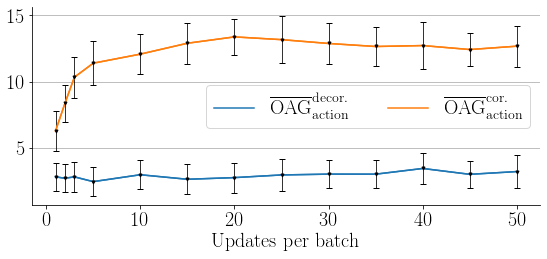

In [16]:
import datetime
import numpy as np
import seaborn as sns
# sns.set_theme(style="whitegrid")


# Append mean/SE afterwards
plot_df = orig_df
GROUPS_TO_PLOT={ # Map to y-label
#     'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/adhoc_AG':r"$\overline{\text{OAG}}_{\text{action}}$",
#     'adhoc_users_aggregate/test_action_batch/balanced_top1_acc/adhoc_hindsight_AG':r"$\overline{\text{HAG}}_{\text{action}}$",
    'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/decorrelated/adhoc_AG':r"$\overline{\text{OAG}}^\text{decor.}_{\text{action}}$",
    'adhoc_users_aggregate/train_action_batch/balanced_top1_acc/correlated/adhoc_AG':r"$\overline{\text{OAG}}^\text{cor.}_{\text{action}}$",
}

# Apply the default theme
# sns.set_context("paper")
# sns.set_theme(rc={
#     'font.family':'DeJavu Serif',
#     'font.serif': 'Times New Roman',
#     'font.size':30,
# })
# sns.set(font_scale=1.6)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Use latex in mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command

# Set latex font in mpl
# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'


# Save config
title = "MULTI_ITER_ANALYSIS_NEW"
main_outdir = f"../imgs/{title}"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)

# Plot configs
plot_config = {
    "color": 'royalblue',
    "dpi": 600,
    "figsize": (8,4),
    "xlabel": "re-exposure iterations",
    "ylabel": "",
    "title": None
}

colors =sns.color_palette()

# [
#     sns.color_palette("rocket")[1],
#     sns.color_palette("rocket")[3],
#     sns.color_palette("rocket")[5],
#         sns.color_palette("rocket")[5],
# #     sns.color_palette("Spectral",10)[0],
# #         sns.color_palette("Spectral",10)[9],
# #         sns.color_palette("Paired")[2],
# ]
# # colors = None



# Use DF pandas plot
# See: https://stackoverflow.com/questions/23144784/plotting-error-bars-on-grouped-bars-in-pandas

fig, ax = plt.subplots(figsize=plot_config['figsize'])

# plot multiple lines
x_vals = plot_df.index.tolist()
legend_names = []
# convert the std columns to an array
for idx, (col_name, label_name) in enumerate(GROUPS_TO_PLOT.items()):
    yerr_name = f"{col_name}/SE"
    y_name = f"{col_name}/mean"
    legend_names.append(label_name)

    y_vals = plot_df[y_name].tolist()
    yerr = plot_df[yerr_name].tolist()
    color = colors[idx]
    plt.errorbar(x_vals, y_vals, yerr=yerr,color=color,
                capsize=3, elinewidth=0.8, 
                 markersize=3, marker='v',mfc='black',mec='black',
    #                      markeredgewidth=1,
                 ecolor='black',
                 label=label_name,
                )


    plt.plot(x_vals, y_vals, 
             label=label_name,
            )
    
    y_low = [y- y_err for y,y_err in zip(y_vals,yerr)]
    y_high = [y+ y_err for y,y_err in zip(y_vals,yerr)]
#     plt.fill_between(x_vals,y_low,y_high ,alpha=0.2, color=color, linewidth=0.0)


# FINAL PLOT SETTINGS
# ax.set(xlabel='re-exposure iterations (bins)', ylabel=plot_config['ylabel'])
# plt.xticks(x_vals, x_bin_vals, rotation='horizontal')
#     ax.set_xticklabels()

#         plt.ylim(0, None)
#     plt.xlim(-3, None)

ax.grid(axis='y')
# ax.grid(True)

    
    

# plot_df[y_names].plot(kind='bar', yerr=yerr, alpha=1, error_kw=dict(ecolor='k'),ax=ax,capsize=2,rot=0, color=colors)

# ax.legend([r"$F \circ H$",r"$F$",r"$H$"]);
ax.set(
    xlabel=r'Updates per batch', 
#        ylabel=r'$\cos_\angle (g_t, \  g_{t-k})$'
      )

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.legend(legend_names,
         loc='best',ncol=4
         );

plt.tight_layout()
filename = f'{title}.pdf'
filepath = os.path.join(parent_dirpath,filename)
print(f"Saving at: {filepath}")
os.makedirs(parent_dirpath, exist_ok=True)
fig.savefig(filepath)

plt.show()
plt.close('all')
